# <div class="alert alert-danger"><center><font color=black>The Capstone Project of Data Analytics Module</font></center></div>
# <div class="alert alert-danger"><center><font color=black>Car Price Prediction EDA</font></center></div> 
# <div class="alert alert-danger"><center><font color=black>PART- 03 (Handling Outliers)</font></center></div>

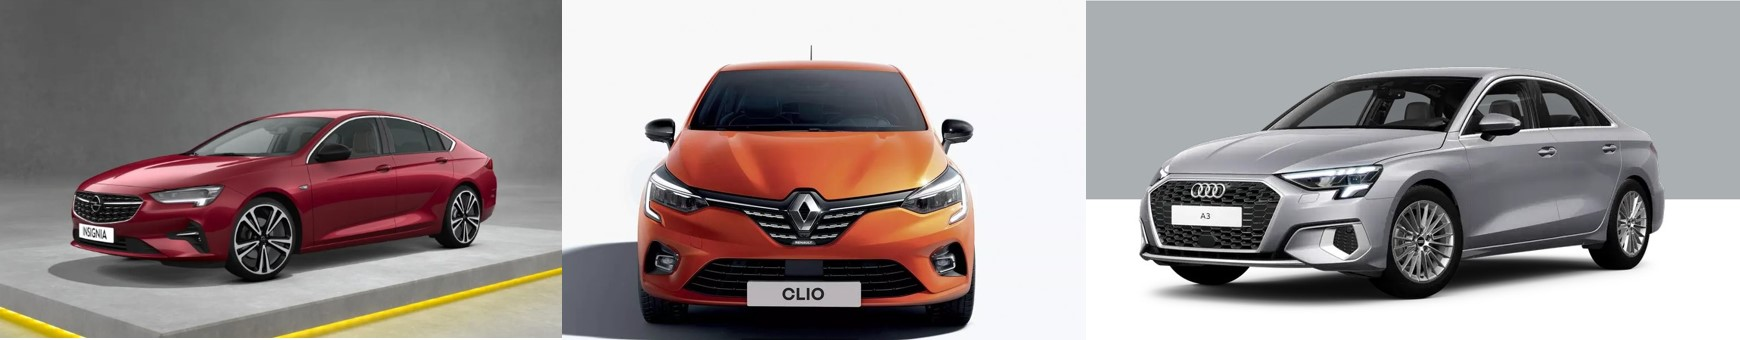

## <div class="alert alert-danger"><font color=black>1. <u>Introduction :</u></font></div>

This is my capstone project of Data Analytics Module. Auto Scout data used for this project, were scraped from the on-line car trading company, Auto Scout, in 2019, contains many features of 9 different car models. In this project, I applied many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy.

The project consists of **3 parts:**
* **``First part``** is related to **``'data cleaning'``**. It deals with Incorrect Headers (Column names), Incorrect Format, Anomalies, Dropping useless columns.
* **``Second part``** is related to **``'filling data'``**. It deals with Missing Values. Categorical to numeric transformation is done.
* **``Third part``** is related to **``'handling outliers of data'``** via Visualisation libraries. Some insights are extracted.

## <div class="alert alert-danger"><font color=black>2. <u>Importing Libraries Needed in This Notebook :</u></font></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from scipy.stats.mstats import winsorize

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

%matplotlib inline
# %matplotlib notebook

plt.rcParams["figure.figsize"] = (10, 6)
# plt.rcParams['figure.dpi'] = 100

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 150

## <div class="alert alert-danger"><font color=black>3. <u>User Defined Functions for Analysis :</u></font></div>

### <div class="alert alert-info"><font color=black>Function for first looking to the columns :</font></div>

In [2]:
def first_looking(col):
    
    '''Gives summary information about the missing values in the columns.'''
    
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()*100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print("--------------------------------")
    print(df[col].value_counts(dropna = False).head(15))

### <div class="alert alert-info"><font color=black>Functions to fill the missing values :</font></div>

In [3]:
def fill_most(df, group_col, col_name):
    
    '''Fills the missing values with the most existing value (mode) in the 
    relevant column according to single-stage grouping'''
    
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        mode = list(df[cond][col_name].mode())
        if mode != []:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[cond][col_name].mode()[0])
        else:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[col_name].mode()[0])
    print("Number of NaN : ", df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [4]:
def fill_prop(df, group_col, col_name):
    
    '''Fills the missing values with "ffill and bfill method" according to single-stage grouping'''
    
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        df.loc[cond, col_name] = df.loc[cond, col_name].fillna(method="ffill").fillna(method="bfill")
    df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    print("Number of NaN : ", df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [5]:
def fill(df, group_col1, group_col2, col_name, method): # method can be either "mode" or "mean" or "median" or "ffill"
    
    '''Fills the missing values with "mode/mean/median/ffill/bfill method" according to double-stage grouping'''
    
    if method == "mode":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                mode1 = list(df[cond1][col_name].mode())
                mode2 = list(df[cond2][col_name].mode())
                if mode2 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].mode()[0])
                elif mode1 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond1][col_name].mode()[0])
                else:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[col_name].mode()[0])

    elif method == "mean":
        df[col_name].fillna(df.groupby([group_col1, group_col2])[col_name].transform("mean"), inplace = True)
        df[col_name].fillna(df.groupby(group_col1)[col_name].transform("mean"), inplace = True)
        df[col_name].fillna(df[col_name].mean(), inplace = True)
        
    elif method == "median":
        df[col_name].fillna(df.groupby([group_col1, group_col2])[col_name].transform("median"), inplace = True)
        df[col_name].fillna(df.groupby(group_col1)[col_name].transform("median"), inplace = True)
        df[col_name].fillna(df[col_name].median(), inplace = True)
        
    elif method == "ffill":           
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(method="ffill").fillna(method="bfill")
                
        for group1 in list(df[group_col1].unique()):
            cond1 = df[group_col1]==group1
            df.loc[cond1, col_name] = df.loc[cond1, col_name].fillna(method="ffill").fillna(method="bfill")            
           
        df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False).head(15))

## <div class="alert alert-danger"><font color=black>4. <u>Reading the Data from File :</u></font></div>

In [6]:
df0 = pd.read_csv("filled_auto_scout.csv")
df = df0.copy()

## <div class="alert alert-danger"><font color=black>5. <u>Recognizing and Understanding Data :</u></font></div>

In [7]:
df.head(3).T

0  \
make_model                                                        Audi A1   
body_type                                                          Sedans   
price                                                               15770   
km                                                              56013.000   
hp_kW                                                              66.000   
type                                                                 Used   
previous_owners                                                     2.000   
inspection_new                                                          1   
paint_type                                                       Metallic   
nr_of_doors                                                         5.000   
nr_of_seats                                                         5.000   
gearing_type                                                    Automatic   
drive_chain                                                         front   
fuel                                                               Diesel   
CO2_emission                                                       99.000   
comfort_and_convenience                                           Premium   
entertainment_and_media                                           Premium   
extras                   Alloy wheels, Catalytic Converter, Voice Control   
safety_and_security                                Safety Premium Package   
gears                                                               7.000   
age                                                                 3.000   
upholstery_type                                                     Cloth   
displacement_cc                                                  1422.000   
weight_kg                                                        1220.000   
cons_comb                                                           3.800   

                                                                         1  \
make_model                                                         Audi A1   
body_type                                                           Sedans   
price                                                                14500   
km                                                               80000.000   
hp_kW                                                              141.000   
type                                                                  Used   
previous_owners                                                      1.000   
inspection_new                                                           0   
paint_type                                                        Metallic   
nr_of_doors                                                          3.000   
nr_of_seats                                                          4.000   
gearing_type                                                     Automatic   
drive_chain                                                          front   
fuel                                                               Benzine   
CO2_emission                                                       129.000   
comfort_and_convenience                                           Standard   
entertainment_and_media                                            Premium   
extras                   Alloy wheels, Sport seats, Sport suspension, V...   
safety_and_security                                 Safety Premium Package   
gears                                                                7.000   
age                                                                  2.000   
upholstery_type                                                      Cloth   
displacement_cc                                                   1798.000   
weight_kg                                                         1255.000   
cons_comb                                                            5.600   

                                        

In [8]:
# df.sample(3).T

In [9]:
# df.tail(3).T

In [10]:
df.shape

(15919, 25)

<div class="alert alert-success"><font color=black><b>There are <mark>15919 samples</mark> in the dataset. There are <mark>25 columns</mark> (features) in the dataset including both categorical and numerical ones.</b></font></div>

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   make_model               15919 non-null  object 
 1   body_type                15919 non-null  object 
 2   price                    15919 non-null  int64  
 3   km                       15919 non-null  float64
 4   hp_kW                    15919 non-null  float64
 5   type                     15919 non-null  object 
 6   previous_owners          15919 non-null  float64
 7   inspection_new           15919 non-null  int64  
 8   paint_type               15919 non-null  object 
 9   nr_of_doors              15919 non-null  float64
 10  nr_of_seats              15919 non-null  float64
 11  gearing_type             15919 non-null  object 
 12  drive_chain              15919 non-null  object 
 13  fuel                     15919 non-null  object 
 14  CO2_emission          

In [12]:
df.describe().T

count      mean       std    min       25%       50%  \
price           15919.000 18019.897  7386.169 13.000 12850.000 16900.000   
km              15919.000 32082.291 36975.782  0.000  1906.500 20407.000   
hp_kW           15919.000    88.374    26.844  1.000    66.000    85.000   
previous_owners 15919.000     1.043     0.339  0.000     1.000     1.000   
inspection_new  15919.000     0.247     0.431  0.000     0.000     0.000   
nr_of_doors     15919.000     4.661     0.642  1.000     4.000     5.000   
nr_of_seats     15919.000     4.952     0.477  2.000     5.000     5.000   
CO2_emission    15919.000   122.619   248.534  0.000   104.000   117.000   
gears           15919.000     5.940     0.792  1.000     5.000     6.000   
age             15919.000     1.389     1.121  0.000     0.000     1.000   
displacement_cc 15919.000  1425.609   329.720  1.000  1229.000  1461.000   
weight_kg       15919.000  1337.432   200.466  1.000  1165.000  1295.000   
cons_comb       15919.000     4.823     0.890  1.600     4.000     4.800   

                      75%        max  
price           21900.000  74600.000  
km              46898.500 317000.000  
hp_kW             101.000    294.000  
previous_owners     1.000      4.000  
inspection_new      0.000      1.000  
nr_of_doors         5.000      7.000  
nr_of_seats         5.000      7.000  
CO2_emission      129.000  14457.000  
gears               6.000     50.000  
age                 2.000      3.000  
displacement_cc  1598.000  16000.000  
weight_kg        1472.000   2471.000  
cons_comb           5.400      9.100

In [13]:
df.describe(include=[object]).T

count unique                     top   freq
make_model               15919      9                 Audi A3   3097
body_type                15919      8                  Sedans   8005
type                     15919      5                    Used  11097
paint_type               15919      3                Metallic  15250
gearing_type             15919      3                  Manual   8153
drive_chain              15919      3                   front  15711
fuel                     15919      4                 Benzine   8551
comfort_and_convenience  15919      3                Standard  10786
entertainment_and_media  15919      2                 Premium  10811
extras                   15919    659            Alloy wheels   5786
safety_and_security      15919      3  Safety Premium Package  14621
upholstery_type          15919      2                   Cloth  12238

## <div class="alert alert-danger"><font color=black>6. <u>Examination of the Outliers in the Columns :</u></font></div>

### <div class="alert alert-info"><font color=black>km :</font></div>

In [14]:
first_looking("km")

column name    :  km
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  6692
--------------------------------
10.000       1045
1647.363      985
1.000         367
5.000         170
50.000        148
100.000       139
15.000        109
5000.000      104
20.000         61
3000.000       58
12.000         56
8000.000       49
45000.000      48
10000.000      47
30000.000      47
Name: km, dtype: int64


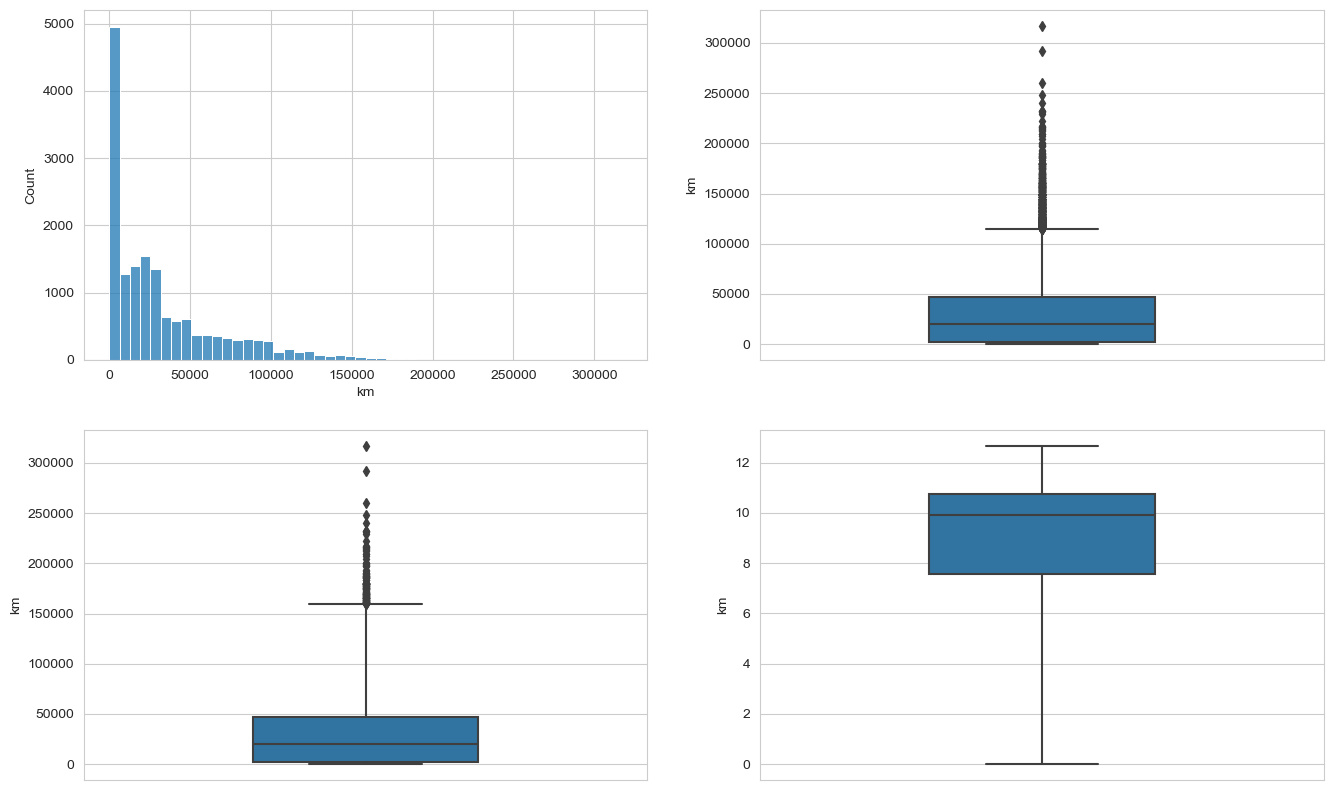

In [15]:
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.histplot(x="km", data=df, bins=50)

plt.subplot(2, 2, 2)
sns.boxplot(y=df.km, width=0.4)

plt.subplot(2, 2, 3)
sns.boxplot(y=df.km, width=0.4, whis=2.5)

plt.subplot(2, 2, 4)
sns.boxplot(y=np.log(df.km), width=0.4, whis=2.5);

<div class="alert alert-success"><font color=black><b><mark>km</mark> is a variable with a wide range of values. We <b><mark>CAN NOT</mark> consider the extreme values above as  genuine <b><mark>outliers.</mark> So let's keep these extreme values as they are.</mark></b></font></div>

### <div class="alert alert-info"><font color=black>gears :</font></div>

In [16]:
first_looking("gears")

column name    :  gears
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  10
--------------------------------
6.000     8615
5.000     4255
7.000     2810
8.000      225
9.000        6
1.000        2
3.000        2
4.000        2
2.000        1
50.000       1
Name: gears, dtype: int64


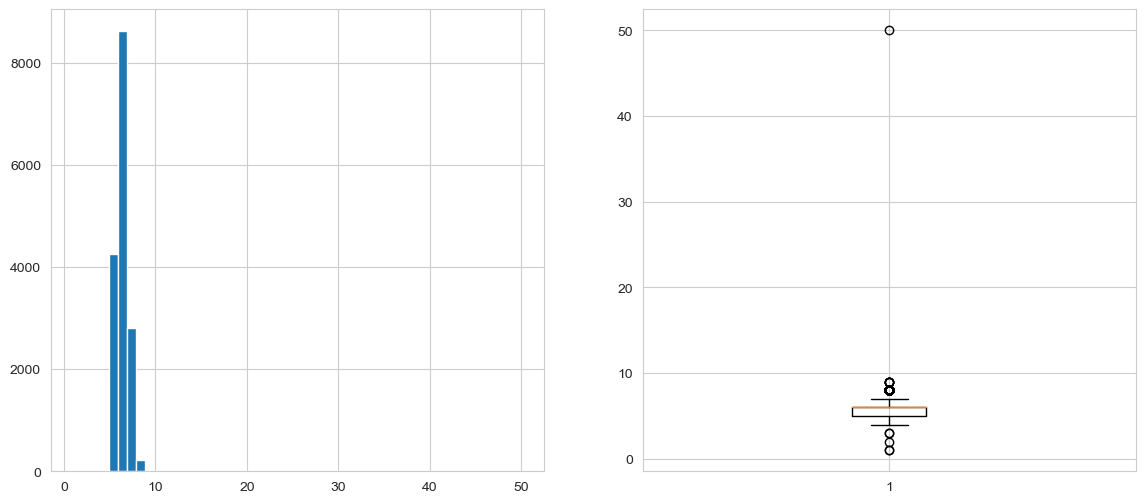

In [17]:
plt.figure(figsize=(14, 6))

plt.subplot(121)
plt.hist(df.gears, bins=50)

plt.subplot(122)
plt.boxplot(df.gears, whis=1.5)

plt.show()

In [18]:
df["gears"].describe()

count   15919.000
mean        5.940
std         0.792
min         1.000
25%         5.000
50%         6.000
75%         6.000
max        50.000
Name: gears, dtype: float64

In [19]:
df.sort_values(by=["gears"], ascending=False)["gears"].head(10)

14495   50.000
15827    9.000
15824    9.000
15814    9.000
15869    9.000
15812    9.000
15876    9.000
12463    8.000
12470    8.000
12469    8.000
Name: gears, dtype: float64

In [20]:
df.sort_values(by=["gears"], ascending=True)["gears"].head(10)

8921    1.000
14375   1.000
9812    2.000
15817   3.000
15845   3.000
15823   4.000
15822   4.000
10427   5.000
10428   5.000
10429   5.000
Name: gears, dtype: float64

In [21]:
# Let's check the observations having extreme "gear" value.

df[(df.gears < 5) | (df.gears > 8)][["make_model", "body_type", "gearing_type", "gears"]]

make_model body_type    gearing_type  gears
8921       Opel Corsa   Compact  Semi-automatic  1.000
9812       Opel Corsa    Sedans          Manual  2.000
14375    Renault Clio   Compact       Automatic  1.000
14495    Renault Clio    Sedans          Manual 50.000
15812  Renault Espace       Van       Automatic  9.000
15814  Renault Espace       Van       Automatic  9.000
15817  Renault Espace       Van       Automatic  3.000
15822  Renault Espace       Van       Automatic  4.000
15823  Renault Espace       Van       Automatic  4.000
15824  Renault Espace       Van       Automatic  9.000
15827  Renault Espace       Van       Automatic  9.000
15845  Renault Espace       Van       Automatic  3.000
15869  Renault Espace       Van       Automatic  9.000
15876  Renault Espace       Van       Automatic  9.000

In [22]:
# Let's check the observations belongs to "Renault Espace" model to see distribution of "gear" values. 

df[(df.make_model == "Renault Espace")][["make_model", "body_type", "gearing_type", "gears"]].head(15)

make_model      body_type gearing_type  gears
14928  Renault Espace            Van    Automatic  6.000
14929  Renault Espace  Station wagon    Automatic  6.000
14930  Renault Espace    Transporter    Automatic  6.000
14931  Renault Espace            Van    Automatic  6.000
14932  Renault Espace            Van    Automatic  6.000
14933  Renault Espace    Transporter    Automatic  6.000
14934  Renault Espace            Van    Automatic  6.000
14935  Renault Espace            Van    Automatic  6.000
14936  Renault Espace       Off-Road    Automatic  6.000
14937  Renault Espace            Van    Automatic  6.000
14938  Renault Espace            Van    Automatic  6.000
14939  Renault Espace    Transporter    Automatic  6.000
14940  Renault Espace            Van    Automatic  6.000
14941  Renault Espace            Van    Automatic  6.000
14942  Renault Espace            Van    Automatic  6.000

<div class="alert alert-success"><font color=black><b><mark>Is it possible that there have been modern cars with manual/automatic transmissions with 1, 2, 3, 4, 9, 50 gears?</mark></b></font></div>

<div class="alert alert-success"><font color=black><b>Most modern cars with manual transmissions have <mark>5 or 6 forward gears.</mark> Most modern cars with automatic transmissions have <mark>5 - 8 forward gears.</mark> A few have as many as <mark>10.</mark> Contemporary manual transmissions for cars typically use <mark>5 or 6 forward gears</mark> ratios and <mark>one reverse gear,</mark> however, transmissions with <mark>between 2 and 7 gears</mark> have been produced at times.</mark></b></font></div>

In [23]:
df["gears"].replace([1, 2, 3, 4, 9, 50], np.nan, inplace=True)

In [24]:
df.gears.isnull().sum()

14

<div class="alert alert-success"><font color=black><b>The number of gears of cars changes by theirs <mark>"make_models", "body_types" and "gear_types"</mark> most of the time. So, I have decided to <mark>fill NaN values with mode value of related group.</mark></b></font></div>

In [25]:
for group_1 in df["make_model"].unique():
    for group_2 in df["body_type"].unique():
        for group_3 in df["gearing_type"].unique():
            condition_1 = df["make_model"]==group_1
            condition_2 = (df["make_model"]==group_1) & (df["body_type"]==group_2)
            condition_3 = (df["make_model"]==group_1) & (df["body_type"]==group_2) & (df["gearing_type"]==group_3)
            mode_1 = list(df[condition_1]["gears"].mode())
            mode_2 = list(df[condition_2]["gears"].mode())
            mode_3 = list(df[condition_3]["gears"].mode())
            if mode_3 != []:
                df.loc[condition_3, "gears"] = df.loc[condition_3, "gears"].fillna(df[condition_3]["gears"].mode()[0])
            elif mode_2 != []:
                df.loc[condition_3, "gears"] = df.loc[condition_3, "gears"].fillna(df[condition_2]["gears"].mode()[0])
            elif mode_1 != []:
                df.loc[condition_3, "gears"] = df.loc[condition_3, "gears"].fillna(df[condition_1]["gears"].mode()[0])
            else:
                df.loc[condition_3, "gears"] = df.loc[condition_3, "gears"].fillna(df["gears"].mode()[0])

In [26]:
df["gears"].value_counts(dropna=False)

6.000    8626
5.000    4258
7.000    2810
8.000     225
Name: gears, dtype: int64

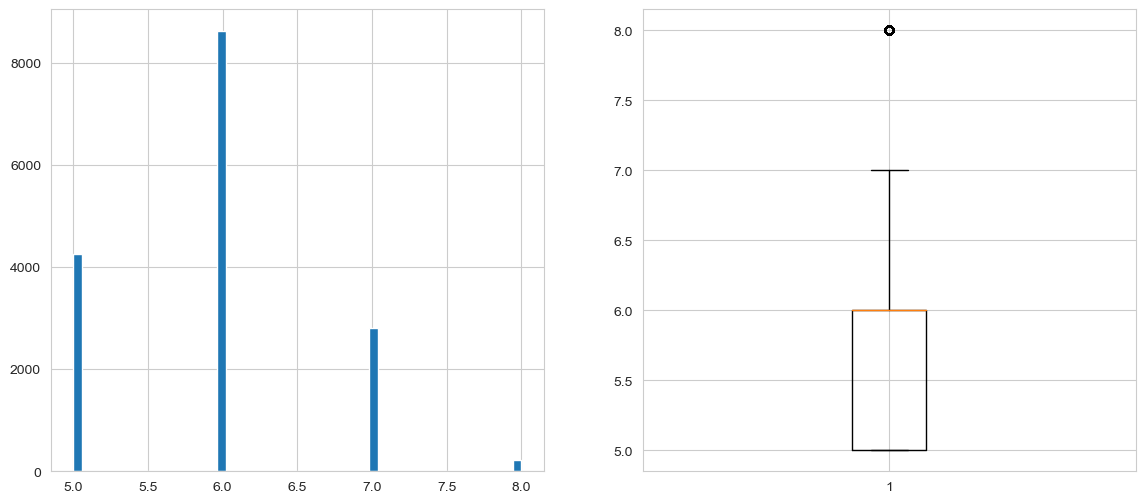

In [27]:
plt.figure(figsize=(14, 6))

plt.subplot(121)
plt.hist(df.gears, bins=50)

plt.subplot(122)
plt.boxplot(df.gears, whis=1.5)

plt.show()

### <div class="alert alert-info"><font color=black>displacement_cc :</font></div>

In [28]:
first_looking("displacement_cc")

column name    :  displacement_cc
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  77
--------------------------------
1598.000    5044
999.000     2467
1398.000    1387
1399.000     768
1229.000     678
1956.000     670
1461.000     667
1490.000     559
1422.000     467
1197.000     372
898.000      351
1395.000     320
1968.000     301
1149.000     288
1618.000     212
Name: displacement_cc, dtype: int64


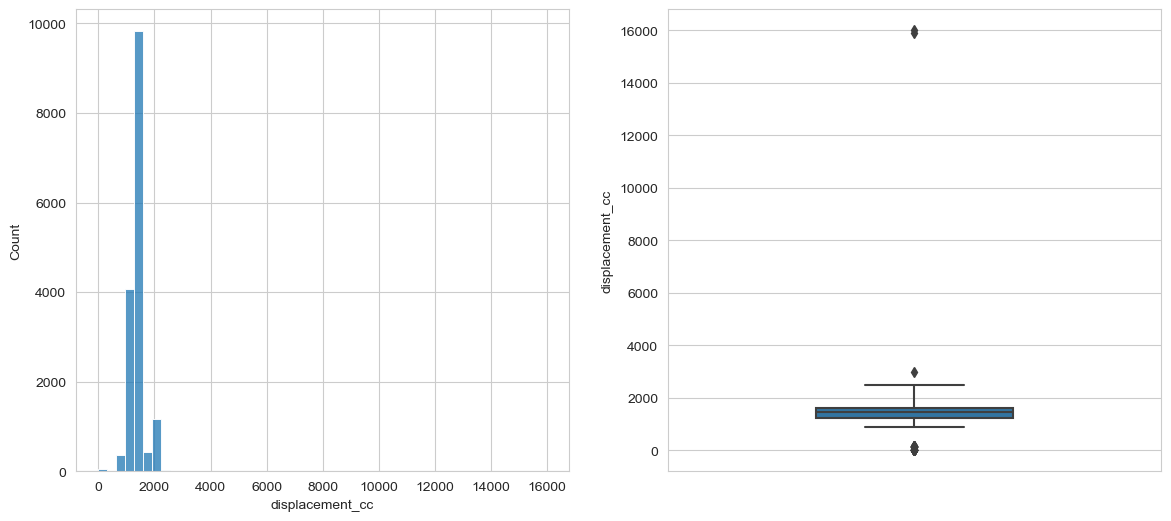

In [29]:
plt.figure(figsize=(14,6))

plt.subplot(121)
sns.histplot(x="displacement_cc", data=df, bins=50)

plt.subplot(122)
sns.boxplot(y=df.displacement_cc, width=0.4, whis=2.5);

In [30]:
df.displacement_cc.describe()

count   15919.000
mean     1425.609
std       329.720
min         1.000
25%      1229.000
50%      1461.000
75%      1598.000
max     16000.000
Name: displacement_cc, dtype: float64

In [31]:
df.sort_values(by=["displacement_cc"], ascending=False)["displacement_cc"].head(5)

10932   16000.000
7169    15898.000
10771    2967.000
3595     2480.000
3587     2480.000
Name: displacement_cc, dtype: float64

In [32]:
df.sort_values(by=["displacement_cc"], ascending=True)["displacement_cc"].head(55)

12790     1.000
14319     1.000
14315     1.000
12849     1.000
12848     1.000
12835     1.000
12823     1.000
12815     1.000
12800     1.000
12798     1.000
12796     1.000
12786     1.000
12783     1.000
12781     1.000
12769     1.000
12768     1.000
12750     1.000
12670     1.000
12604     1.000
12554     1.000
12501     1.000
12499     1.000
12484     1.000
12473     1.000
12467     1.000
14284     1.000
14320     1.000
14321     1.000
14314     1.000
14322     1.000
14328     1.000
14327     1.000
13904     1.000
14325     1.000
14326     1.000
14324     1.000
10559     2.000
14198     2.000
13912    54.000
10194   122.000
7810    139.000
7812    139.000
7811    139.000
7809    139.000
8128    140.000
15578   160.000
15576   160.000
15574   160.000
15575   160.000
15577   160.000
15579   160.000
13653   890.000
14694   898.000
14342   898.000
14695   898.000
Name: displacement_cc, dtype: float64

In [33]:
outlier_bool_list = df.displacement_cc.isin([1, 2, 54, 122, 139, 140, 160, 16000, 15898])

In [34]:
outlier_bool_list

0        False
1        False
2        False
3        False
4        False
         ...  
15914    False
15915    False
15916    False
15917    False
15918    False
Name: displacement_cc, Length: 15919, dtype: bool

In [35]:
df.loc[outlier_bool_list, "displacement_cc"] = np.nan

In [36]:
df.displacement_cc.isnull().sum()

53

<div class="alert alert-success"><font color=black><b> The displacement of cars changes by theirs <mark>"make_models" and "body_types"</mark> most of the time. So, I have decided to fill NaN values with <mark>"mode" value of related group.</mark></b></font></div>

In [37]:
fill(df, "make_model", "body_type", "displacement_cc", "mode")

Number of NaN :  0
------------------
1598.000    5077
999.000     2467
1398.000    1388
1399.000     772
1461.000     682
1229.000     678
1956.000     670
1490.000     559
1422.000     467
1197.000     372
898.000      351
1395.000     320
1968.000     301
1149.000     288
1618.000     212
Name: displacement_cc, dtype: int64


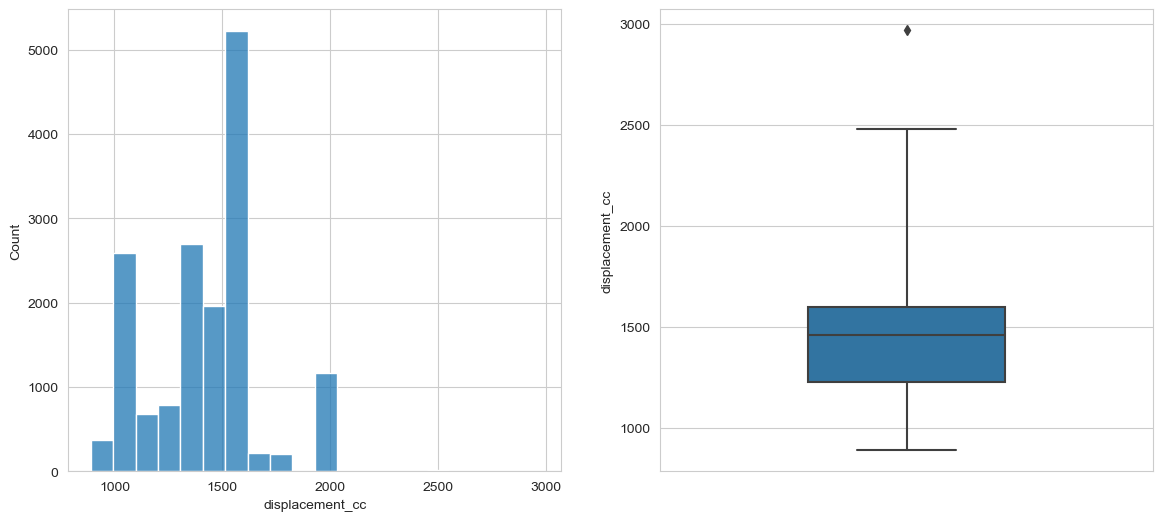

In [38]:
plt.figure(figsize=(14,6))

plt.subplot(121)
sns.histplot(x="displacement_cc", data=df, bins=20)

plt.subplot(122)
sns.boxplot(y=df.displacement_cc, width=0.4, whis=2.5);

### <div class="alert alert-info"><font color=black>weight_kg :</font></div>

In [39]:
first_looking("weight_kg")

column name    :  weight_kg
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  434
--------------------------------
1163.000    1582
1360.000    1419
1487.000     966
1135.000     837
1425.000     744
1180.000     694
1273.000     656
1165.000     603
1503.000     561
1734.000     556
1087.000     291
1335.000     242
1365.000     211
1199.000     205
1350.000     156
Name: weight_kg, dtype: int64


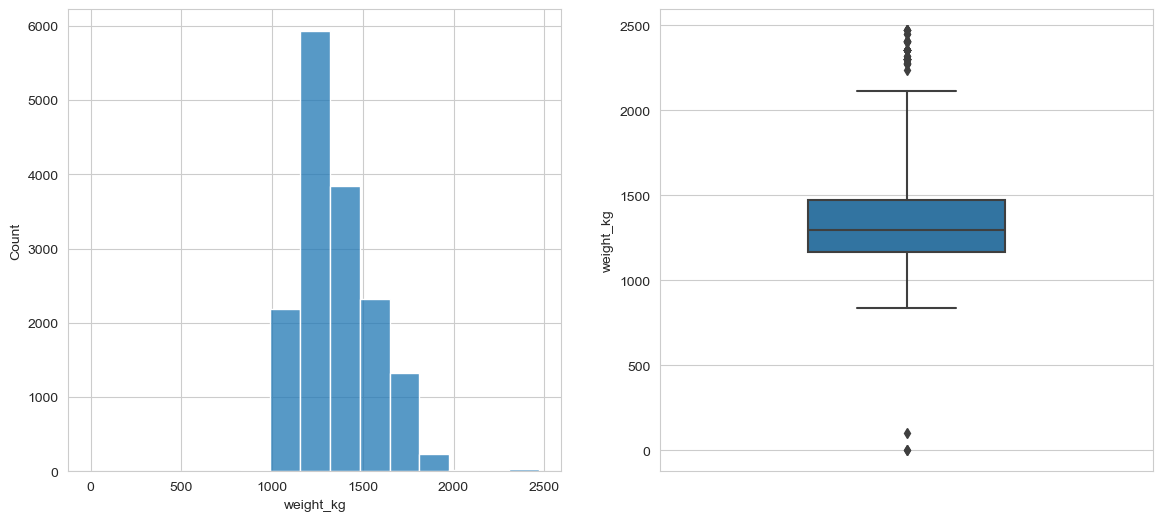

In [40]:
plt.figure(figsize=(14,6))

plt.subplot(121)
sns.histplot(x="weight_kg", data=df, bins=15)

plt.subplot(122)
sns.boxplot(y=df.weight_kg, width=0.4, whis=2.5);

In [41]:
df.weight_kg.describe()

count   15919.000
mean     1337.432
std       200.466
min         1.000
25%      1165.000
50%      1295.000
75%      1472.000
max      2471.000
Name: weight_kg, dtype: float64

In [42]:
df["weight_kg"].sort_values().head(10)

8355      1.000
12779     1.000
1143    102.000
8857    840.000
14313   900.000
13513   977.000
13555   977.000
14654   980.000
14105   980.000
13999   980.000
Name: weight_kg, dtype: float64

In [43]:
df["weight_kg"].replace([1, 102], np.nan, inplace = True)

In [44]:
df["weight_kg"].isnull().sum()

3

<div class="alert alert-success"><font color=black><b> The weights of cars changes by theirs <mark>"make_models" and "body_types"</mark> most of the time. So, I have decided to fill NaN values with <mark>"mode" value of related group.</mark></b></font></div>

In [45]:
fill(df, "make_model", "body_type", "weight_kg", "mode")

Number of NaN :  0
------------------
1163.000    1583
1360.000    1419
1487.000     967
1135.000     837
1425.000     744
1180.000     695
1273.000     656
1165.000     603
1503.000     561
1734.000     556
1087.000     291
1335.000     242
1365.000     211
1199.000     205
1350.000     156
Name: weight_kg, dtype: int64


In [46]:
df["weight_kg"].isnull().sum()

0

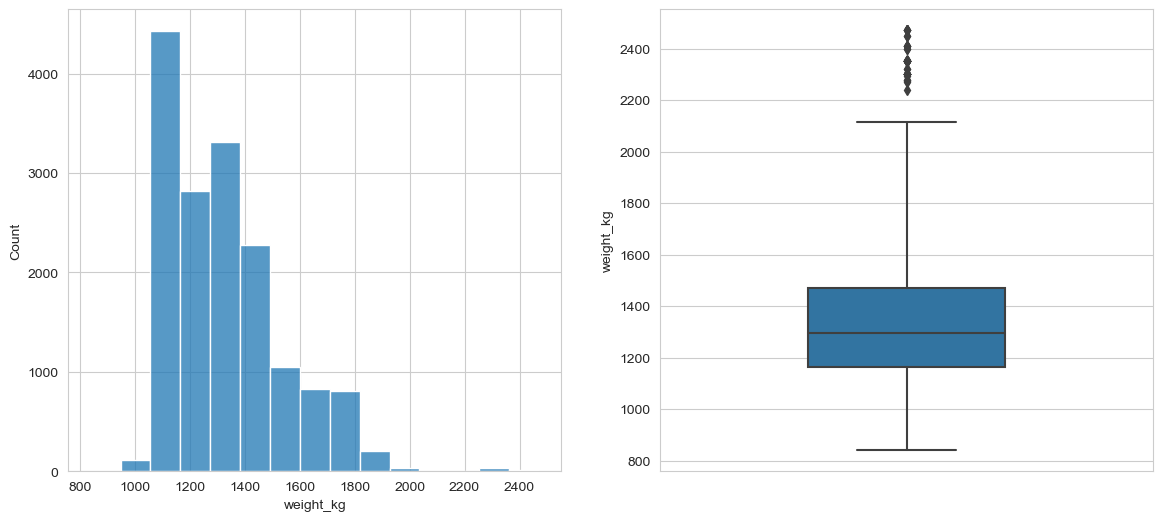

In [47]:
plt.figure(figsize=(14,6))

plt.subplot(121)
sns.histplot(x="weight_kg", data=df, bins=15)

plt.subplot(122)
sns.boxplot(y=df.weight_kg, width=0.4, whis=2.5);

### <div class="alert alert-info"><font color=black>hp_kW :</font></div>

In [48]:
first_looking("hp_kW")

column name    :  hp_kW
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  80
--------------------------------
85.000     2543
66.000     2124
81.000     1403
100.000    1314
110.000    1113
70.000      890
125.000     711
51.000      696
55.000      589
118.000     550
92.000      466
121.000     392
147.000     380
77.000      353
56.000      294
Name: hp_kW, dtype: int64


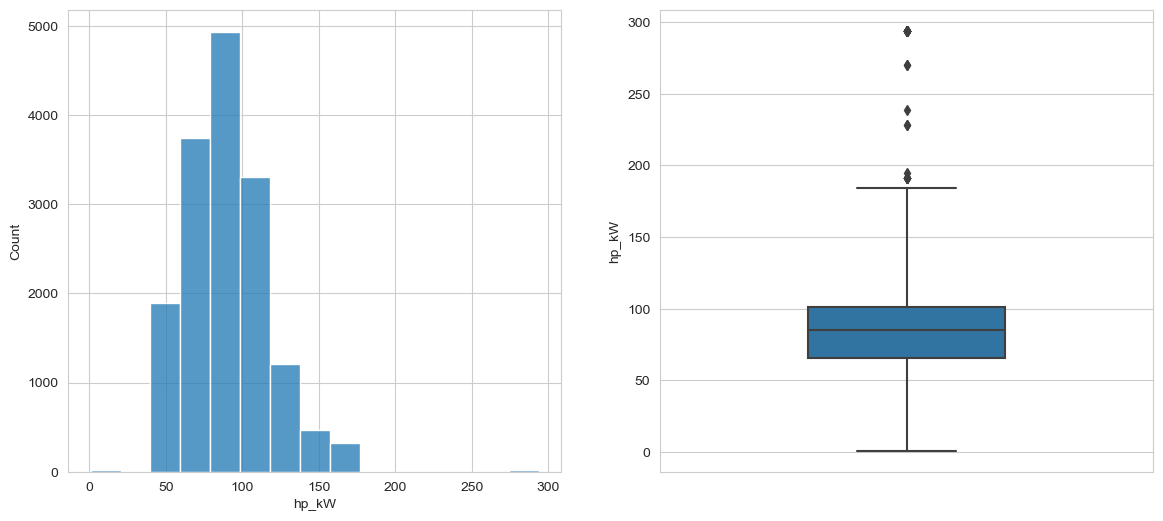

In [49]:
plt.figure(figsize=(14,6))

plt.subplot(121)
sns.histplot(x="hp_kW", data=df, bins=15)

plt.subplot(122)
sns.boxplot(y=df.hp_kW, width=0.4, whis=2.5);

In [50]:
df.hp_kW.describe()

count   15919.000
mean       88.374
std        26.844
min         1.000
25%        66.000
50%        85.000
75%       101.000
max       294.000
Name: hp_kW, dtype: float64

In [51]:
df.hp_kW.sort_values().head(50)

6034     1.000
6946     1.000
7014     1.000
9285     1.000
9287     1.000
6005     1.000
9288     1.000
7018     1.000
9289     1.000
9290     1.000
9292     1.000
9299     1.000
10610    1.000
10580    1.000
10579    1.000
10468    1.000
15155    1.000
15156    1.000
7019     1.000
7016     1.000
13885    4.000
3913     9.000
8857    40.000
13759   40.000
8408    44.000
10282   51.000
10283   51.000
10284   51.000
10285   51.000
10286   51.000
10287   51.000
9145    51.000
10288   51.000
10346   51.000
10281   51.000
10330   51.000
9026    51.000
9025    51.000
10342   51.000
10289   51.000
9159    51.000
9384    51.000
9158    51.000
10290   51.000
10291   51.000
10345   51.000
10280   51.000
10279   51.000
10278   51.000
10264   51.000
Name: hp_kW, dtype: float64

In [52]:
np.sort(df.hp_kW.unique())

array([  1.,   4.,   9.,  40.,  44.,  51.,  52.,  53.,  54.,  55.,  56.,
        57.,  60.,  63.,  65.,  66.,  67.,  70.,  71.,  74.,  75.,  76.,
        77.,  78.,  80.,  81.,  82.,  84.,  85.,  86.,  87.,  88.,  89.,
        90.,  92.,  93.,  96.,  98., 100., 101., 103., 104., 110., 112.,
       115., 117., 118., 119., 120., 121., 122., 123., 125., 127., 132.,
       133., 135., 137., 140., 141., 143., 146., 147., 149., 150., 154.,
       155., 162., 163., 164., 165., 167., 168., 184., 191., 195., 228.,
       239., 270., 294.])

In [53]:
df.hp_kW.loc[df.hp_kW < 40] = np.nan

In [54]:
df.hp_kW.isnull().sum()

22

<div class="alert alert-success"><font color=black><b>The <mark>"hp" of cars changes</mark> by theirs <mark>"make_models" and "body_types"</mark> most of the time. So, I have decided to <mark>fill NaN values with mode value of related group.</mark></b></font></div>

In [55]:
fill(df, "make_model", "body_type", "hp_kW", "mode")

Number of NaN :  0
------------------
85.000     2544
66.000     2124
81.000     1403
100.000    1317
110.000    1117
70.000      890
125.000     715
51.000      703
55.000      589
118.000     552
92.000      466
121.000     392
147.000     380
77.000      353
56.000      295
Name: hp_kW, dtype: int64


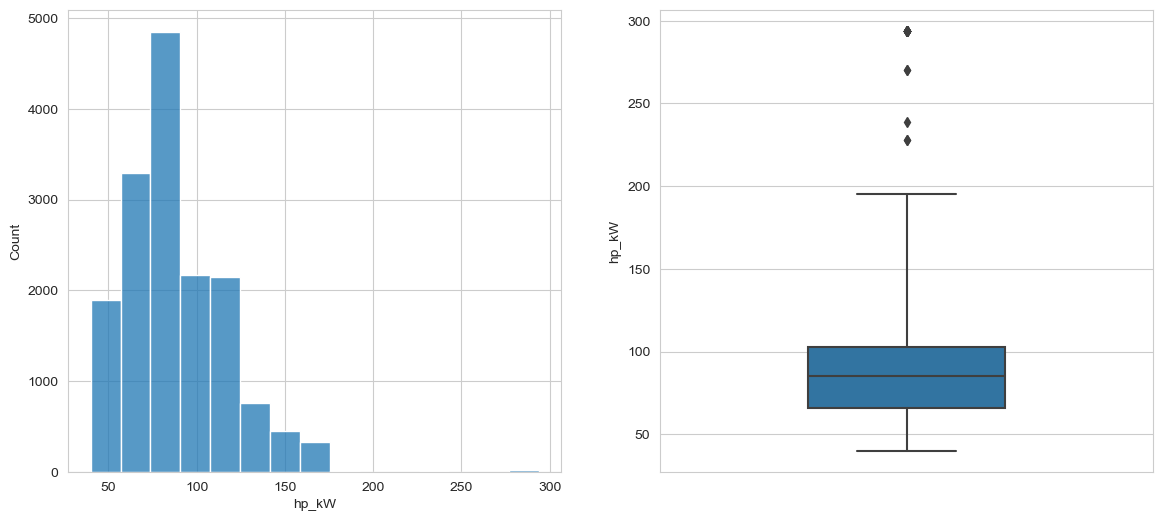

In [56]:
plt.figure(figsize=(14,6))

plt.subplot(121)
sns.histplot(x="hp_kW", data=df, bins=15)

plt.subplot(122)
sns.boxplot(y=df.hp_kW, width=0.4, whis=2.5);

### <div class="alert alert-info"><font color=black>CO2_emission :</font></div>

In [57]:
first_looking("CO2_emission")

column name    :  CO2_emission
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  124
--------------------------------
120.000    1000
104.000     782
97.000      631
99.000      593
124.000     574
102.000     501
85.000      456
103.000     445
128.000     425
106.000     418
105.000     401
117.000     394
114.000     390
119.000     381
107.000     379
Name: CO2_emission, dtype: int64


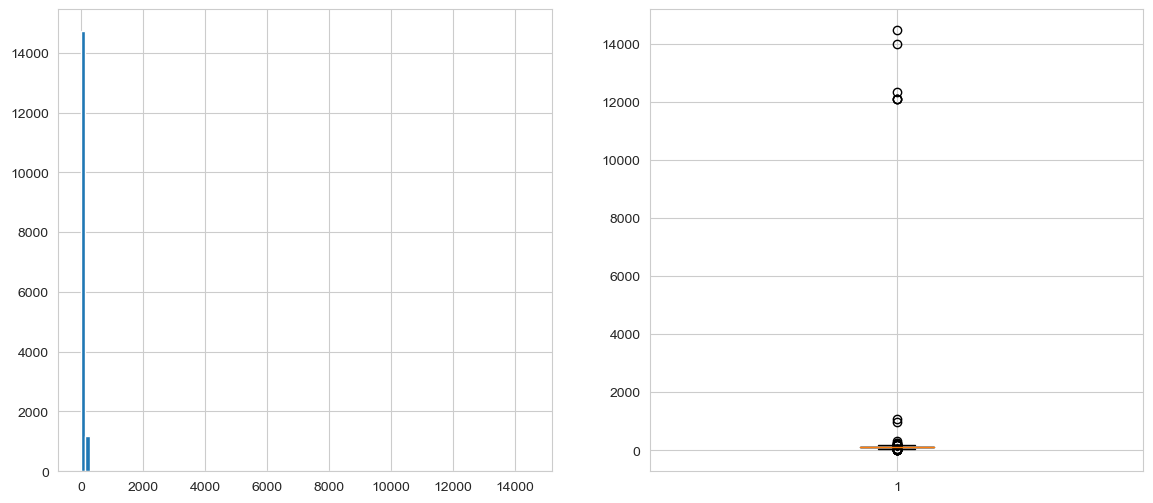

In [58]:
plt.figure(figsize=(14, 6))

plt.subplot(121)
plt.hist(df.CO2_emission, bins=100)

plt.subplot(122)
plt.boxplot(df.CO2_emission, whis=2.5)

plt.show()

In [59]:
df.CO2_emission.describe()

count   15919.000
mean      122.619
std       248.534
min         0.000
25%       104.000
50%       117.000
75%       129.000
max     14457.000
Name: CO2_emission, dtype: float64

In [60]:
df.CO2_emission.value_counts().sort_index().head(15)

0.000       2
1.000       1
5.000       3
14.000      1
36.000      5
45.000      1
51.000      1
80.000      1
82.000     25
84.000      2
85.000    456
87.000      6
88.000     15
89.000     19
90.000     35
Name: CO2_emission, dtype: int64

In [61]:
df.groupby(["make_model", "body_type", "CO2_emission"]).price.describe().head(15)

count      mean      std       min  \
make_model body_type CO2_emission                                        
Audi A1    Compact   90.000         1.000 12880.000      NaN 12880.000   
                     91.000         5.000 13038.000 1108.927 11800.000   
                     92.000         1.000 12479.000      NaN 12479.000   
                     94.000         5.000 13960.000 1232.071 12900.000   
                     97.000       113.000 15449.593 2445.755 10900.000   
                     98.000        33.000 16574.364 2637.087 13999.000   
                     99.000        19.000 16043.947 2257.403 10900.000   
                     100.000        4.000 16127.500 1583.401 14220.000   
                     102.000      170.000 16551.159 2943.687  9950.000   
                     103.000       30.000 21233.033 1794.551 18350.000   
                     104.000      126.000 17411.413 3149.373 11445.000   
                     105.000       14.000 22234.857  812.264 20840.000   
                     106.000      112.000 19622.223 3864.432 12780.000   
                     107.000       13.000 16527.692 1620.412 14470.000   
                     108.000       42.000 23587.095 3375.693 15970.000   

                                        25%       50%       75%       max  
make_model body_type CO2_emission                                          
Audi A1    Compact   90.000       12880.000 12880.000 12880.000 12880.000  
                     91.000       11850.000 13800.000 13800.000 13940.000  
                     92.000       12479.000 12479.000 12479.000 12479.000  
                     94.000       12900.000 13900.000 14200.000 15900.000  
                     97.000       13770.000 15400.000 16700.000 23500.000  
                     98.000       15290.000 15900.000 16800.000 25256.000  
                     99.000       14585.000 16900.000 17925.000 18880.000  
                     100.000      15247.500 16195.000 17075.000 17900.000  
                     102.000      14914.000 16445.000 17950.000 29150.000  
                     103.000      19225.000 22189.500 22448.500 23550.000  
                     104.000      14990.000 16480.000 20977.250 23700.000  
                     105.000      21746.750 22490.000 22861.750 22990.000  
                     106.000      16220.000 19970.000 22400.000 31990.000  
                     107.000      15830.000 16430.000 16430.000 19890.000  
                     108.000      20990.000 23565.000 25942.500 29190.000

In [62]:
cond = ((df.CO2_emission < 36) | (df.CO2_emission > 330))

In [63]:
df.loc[cond, "CO2_emission"] = np.nan

In [64]:
df.CO2_emission.isnull().sum()

16

<div class="alert alert-success"><font color=black><b>The CO2_emission of cars changes by theirs <mark>"make_models", "body_types" and "fuel"</mark> most of the time. So, I have decided to <mark>fill NaN values with median value of related group.</mark></b></font></div>

<div class="alert alert-success"><font color=black><b>The following function <mark>fills the missing values with the "median method"</mark> in the relevant column according to <mark>"make_model", "body_type" and "fuel" group.</mark></b></font></div>

In [65]:
def fill_median(df, group_column_1, group_column_2, group_column_3, column_name):
    
    df[column_name].fillna(df.groupby([group_column_1, group_column_2, group_column_3])[column_name].transform("median"), inplace = True)
    df[column_name].fillna(df.groupby([group_column_1, group_column_2])[column_name].transform("median"), inplace = True)
    df[column_name].fillna(df.groupby(group_column_1)[column_name].transform("median"), inplace = True)
    df[column_name].fillna(df[column_name].median(), inplace = True)

    print("Number of NaN : ", df[column_name].isnull().sum())
    print("------------------")
    print(df[column_name].value_counts(dropna=False).head(15))  

In [66]:
fill_median(df, "make_model", "body_type", "fuel", "CO2_emission")

Number of NaN :  0
------------------
120.000    1000
104.000     782
97.000      632
99.000      593
124.000     576
102.000     501
85.000      456
103.000     445
128.000     428
106.000     419
105.000     403
117.000     394
114.000     390
119.000     381
107.000     379
Name: CO2_emission, dtype: int64


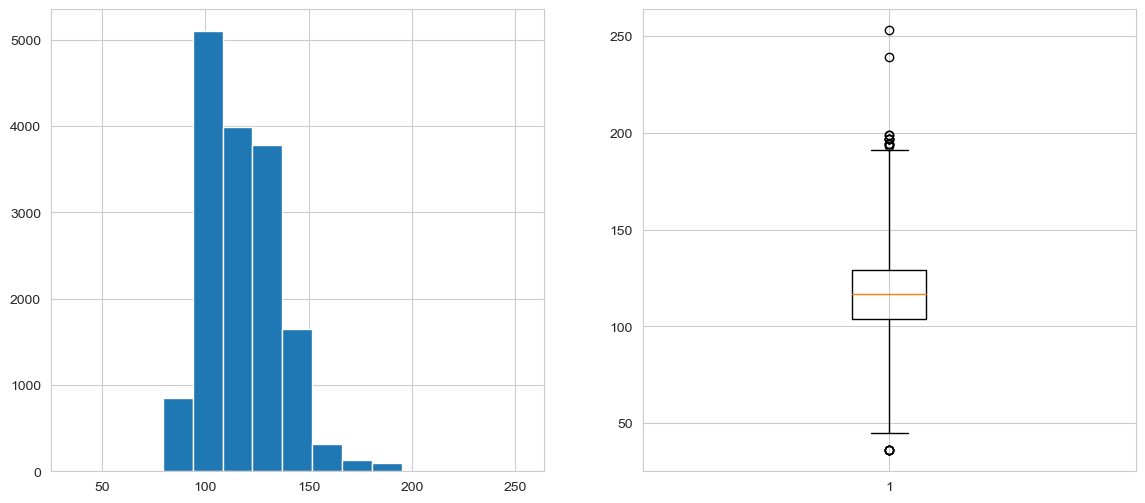

In [67]:
plt.figure(figsize=(14, 6))

plt.subplot(121)
plt.hist(df.CO2_emission, bins=15)

plt.subplot(122)
plt.boxplot(df.CO2_emission, whis=2.5)

plt.show()

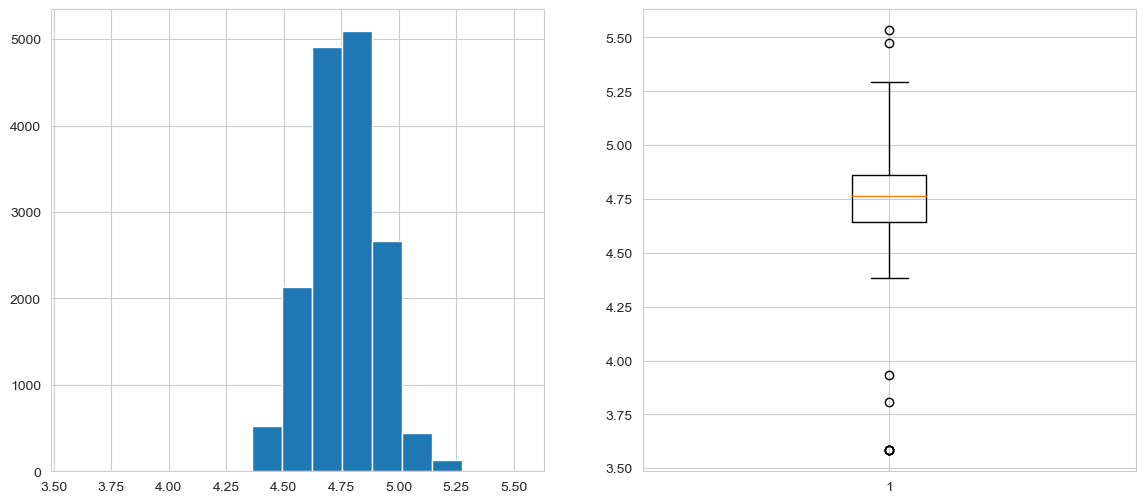

In [68]:
plt.figure(figsize = (14, 6))

plt.subplot(121)
plt.hist(np.log(df.CO2_emission), bins=15)

plt.subplot(122)
plt.boxplot(np.log(df.CO2_emission), whis=2.5)

plt.show()

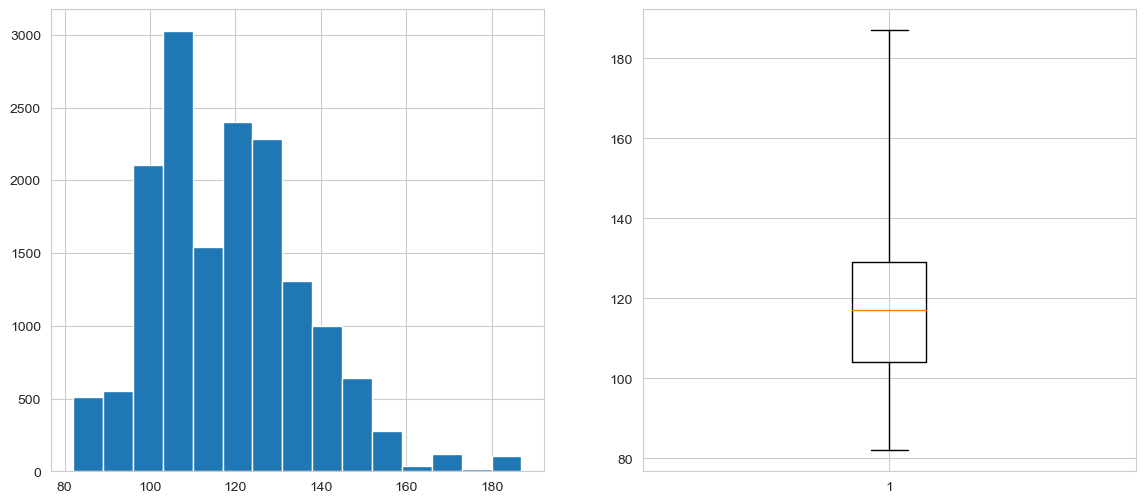

In [69]:
plt.figure(figsize = (14, 6))

plt.subplot(121)
plt.hist(winsorize(df.CO2_emission, (0.001, 0.003)), bins = 15)

plt.subplot(122)
plt.boxplot(winsorize(df.CO2_emission, (0.001, 0.003)), whis=2.5)

plt.show()

### <div class="alert alert-info"><font color=black>cons_comb :</font></div>

In [70]:
first_looking("cons_comb")

column name    :  cons_comb
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  63
--------------------------------
5.400    990
4.000    905
3.900    846
4.700    785
5.600    781
5.100    769
3.800    678
5.200    666
4.400    624
4.800    580
5.000    553
4.600    539
4.500    524
4.900    495
3.300    446
Name: cons_comb, dtype: int64


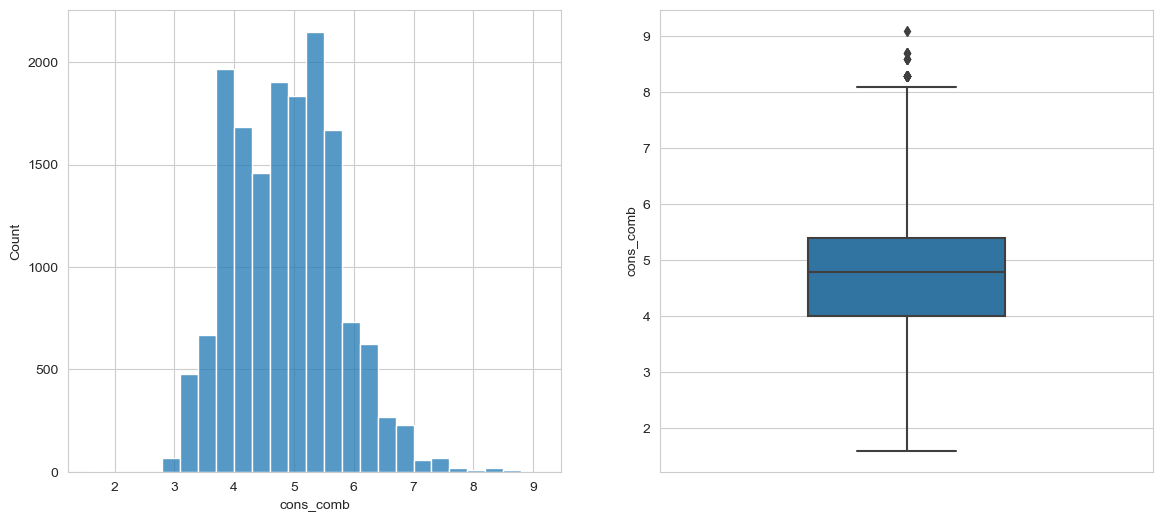

In [71]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.histplot(df.cons_comb, bins=25)

plt.subplot(1,2,2)
sns.boxplot(y=df.cons_comb, width=0.4, whis=2);

In [72]:
df.cons_comb.describe()

count   15919.000
mean        4.823
std         0.890
min         1.600
25%         4.000
50%         4.800
75%         5.400
max         9.100
Name: cons_comb, dtype: float64

In [73]:
df.cons_comb.sort_values().head(10)

3615    1.600
13397   1.600
3612    1.600
3356    1.600
3617    1.600
8805    3.000
13493   3.000
6240    3.000
6241    3.000
13494   3.000
Name: cons_comb, dtype: float64

In [74]:
df.cons_comb.sort_values().tail(10)

10515   8.300
3601    8.300
10789   8.600
12553   8.600
12422   8.600
12530   8.600
12054   8.700
10817   8.700
12529   8.700
10771   9.100
Name: cons_comb, dtype: float64

<div class="alert alert-success"><font color=black><b>Considering our <mark>domain knowledge,</mark> we can conclude that <mark>min value of 3 and max value of 9.10 are normal.</mark></b></font></div>

In [75]:
cond = (df.cons_comb < 3)

In [76]:
df.loc[cond, "cons_comb"] = np.nan

In [77]:
df.cons_comb.isnull().sum()

5

<div class="alert alert-success"><font color=black><b>The cons_comb of cars changes by theirs <mark>"make_models", "body_types" and "fuel"</mark> most of the time. So, I have decided to <mark>fill NaN values with median value of related group.</mark></b></font></div>

<div class="alert alert-success"><font color=black><b>I used <mark>"fill_median" function</mark> which used and described in <mark>"CO2_emission" column</mark> for filling missing values at <mark>"cons_comb" column.</mark></b></font></div>

In [78]:
fill_median(df, "make_model", "body_type", "fuel", "cons_comb")

Number of NaN :  0
------------------
5.400    990
4.000    909
3.900    846
4.700    785
5.600    781
5.100    769
3.800    678
5.200    666
4.400    624
4.800    580
5.000    554
4.600    539
4.500    524
4.900    495
3.300    446
Name: cons_comb, dtype: int64


In [79]:
df.cons_comb.isnull().sum()

0

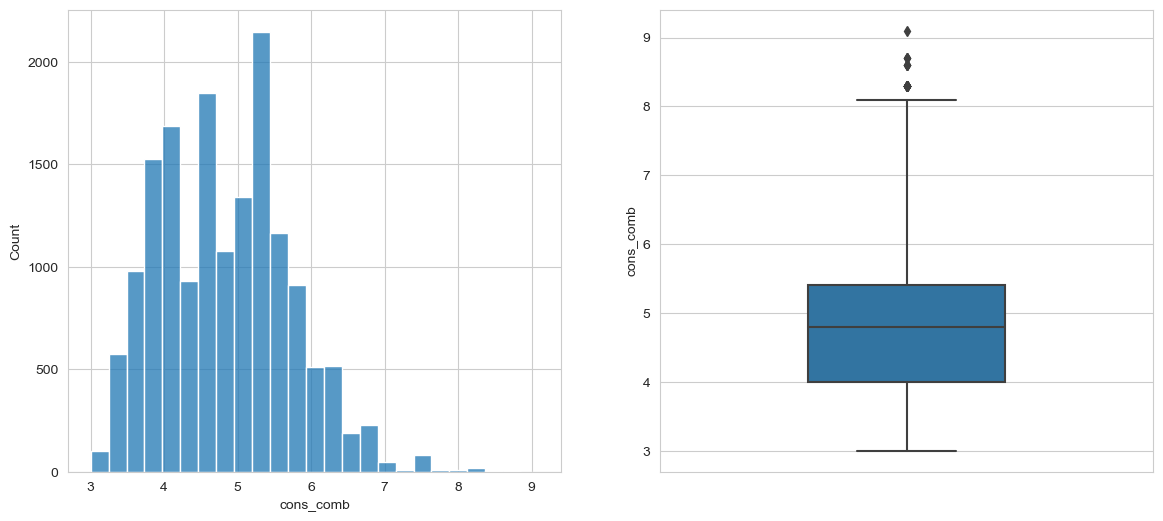

In [80]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.histplot(df.cons_comb, bins=25)

plt.subplot(1,2,2)
sns.boxplot(y=df.cons_comb, width=0.4, whis=2);

### <div class="alert alert-info"><font color=black>nr_of_doors :</font></div>

In [81]:
first_looking("nr_of_doors")

column name    :  nr_of_doors
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  6
--------------------------------
5.000    11787
4.000     3079
3.000      832
2.000      219
1.000        1
7.000        1
Name: nr_of_doors, dtype: int64


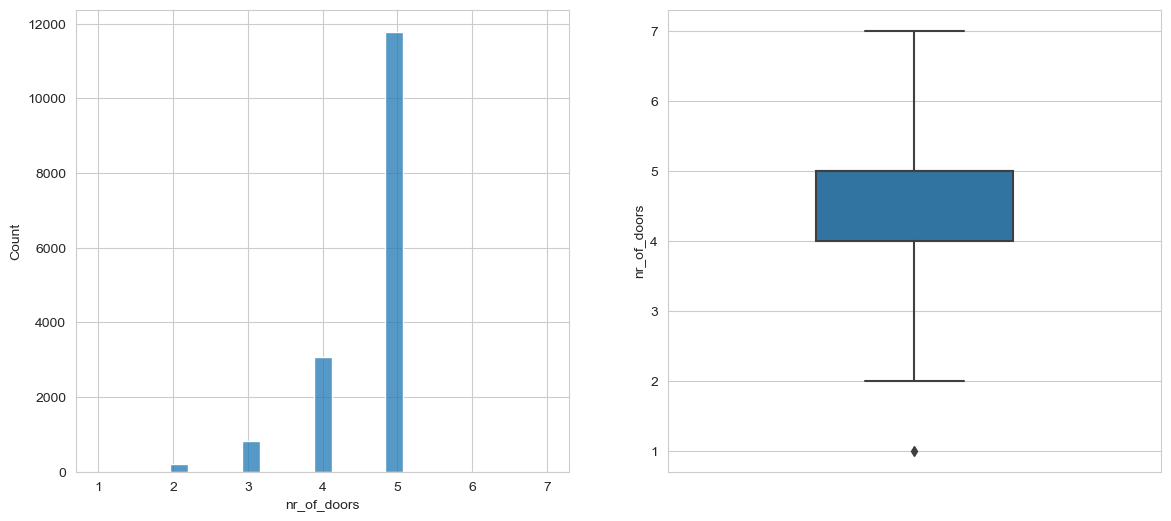

In [82]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.histplot(df.nr_of_doors, bins=25)

plt.subplot(1,2,2)
sns.boxplot(y=df.nr_of_doors, width=0.4, whis=2);

In [83]:
df.nr_of_doors.replace([1, 7], np.nan, inplace=True)

In [84]:
df.nr_of_doors.isnull().sum()

2

<div class="alert alert-success"><font color=black><b>The number of doors of cars changes by theirs <mark>"make_models" and "body_types".</mark> So, I have decided to <mark>fill NaN values with mode value of related group.</mark></b></font></div>

In [85]:
fill(df, "make_model", "body_type", "nr_of_doors", "mode")

Number of NaN :  0
------------------
5.000    11789
4.000     3079
3.000      832
2.000      219
Name: nr_of_doors, dtype: int64


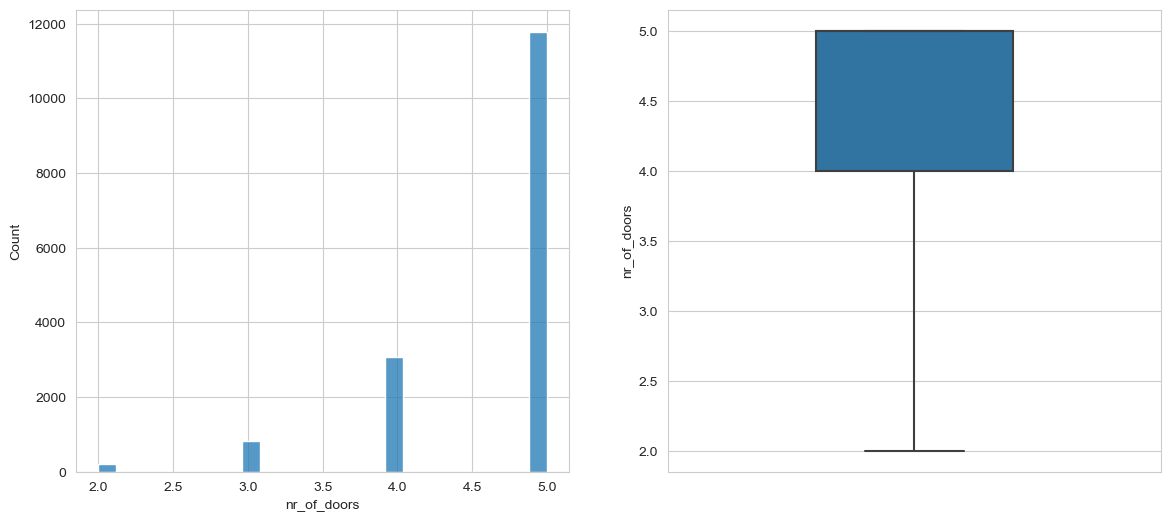

In [86]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.histplot(df.nr_of_doors, bins=25)

plt.subplot(1,2,2)
sns.boxplot(y=df.nr_of_doors, width=0.4, whis=2);

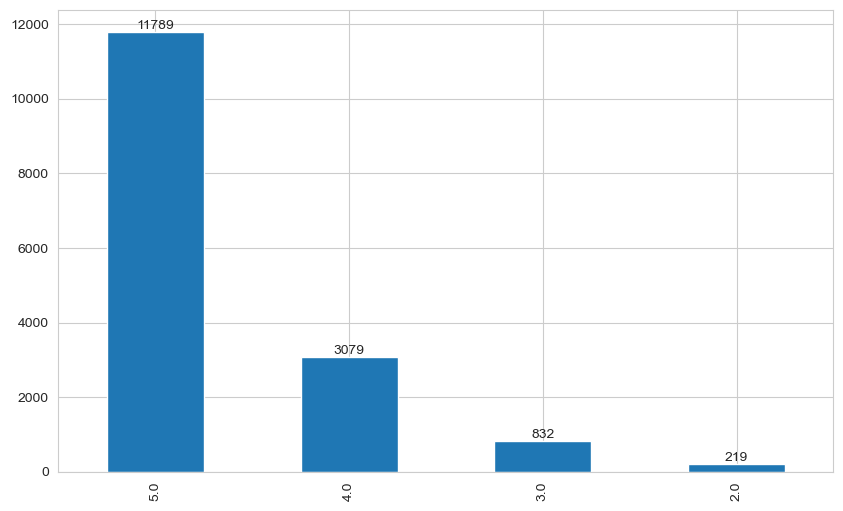

In [87]:
fig, ax = plt.subplots()

df.nr_of_doors.value_counts(dropna = False).plot.bar()

for container in ax.containers:
    ax.bar_label(container);

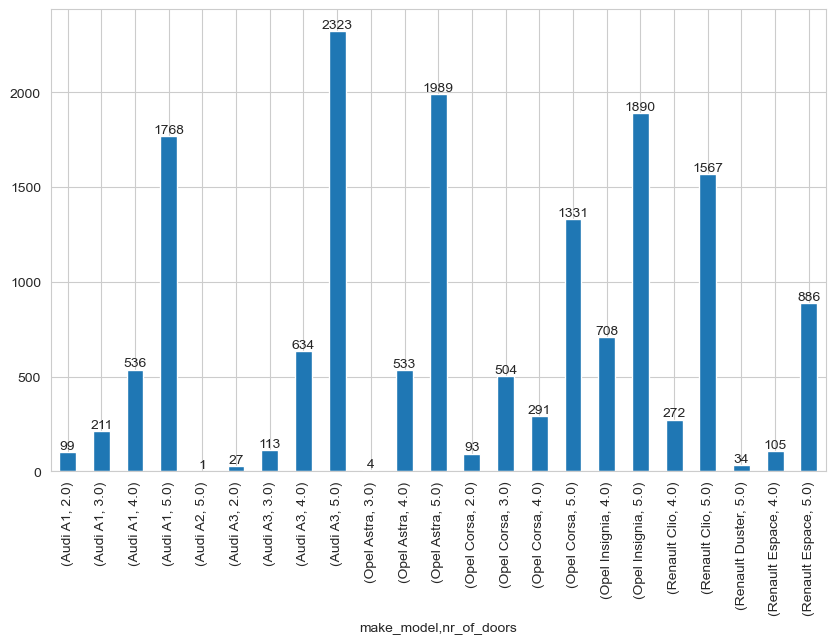

In [88]:
fig, ax = plt.subplots()

df.groupby(["make_model", "nr_of_doors"]).nr_of_doors.count().plot.bar()

for container in ax.containers:
    ax.bar_label(container);

<div class="alert alert-success"><font color=black><b>From the above results, it can be seen that most cars have <b><mark>5 doors.</b></mark> Additionally, there is no significant difference between 5-door and 4-door vehicles in terms of both <b><mark>price and physicality.</b></mark> For this reason and to avoid increasing the complexity of the analysis, I have decided to drop <b><mark>"nr_of_doors"</b></mark> column.</font></div>

In [89]:
df.drop("nr_of_doors", axis=1, inplace=True)

In [90]:
df.shape

(15919, 24)

### <div class="alert alert-info"><font color=black>nr_of_seats :</font></div>

In [91]:
first_looking("nr_of_seats")

column name    :  nr_of_seats
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  6
--------------------------------
5.000    14308
4.000     1127
7.000      362
2.000      119
6.000        2
3.000        1
Name: nr_of_seats, dtype: int64


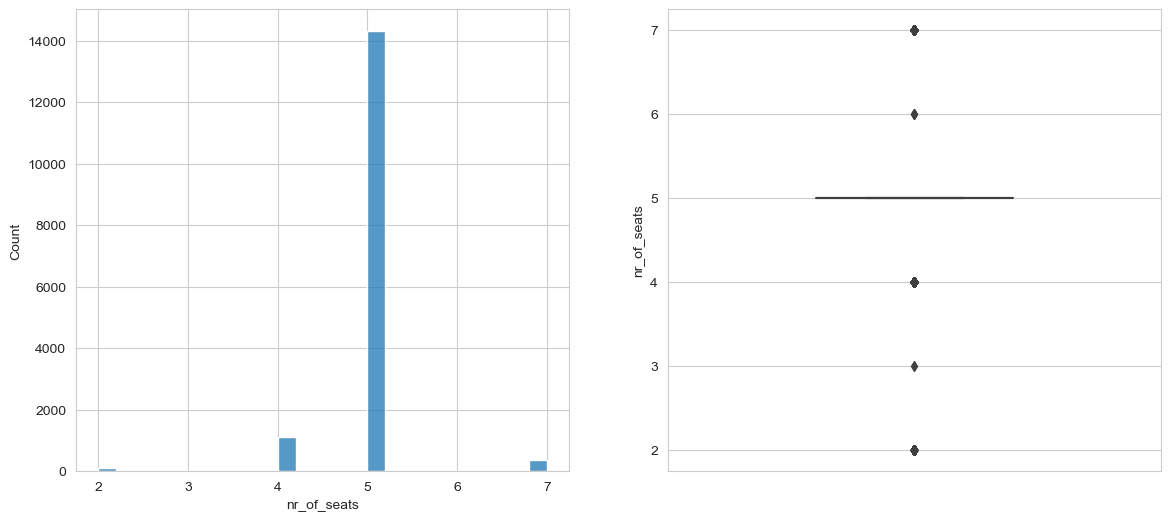

In [92]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.histplot(df.nr_of_seats, bins=25)

plt.subplot(1,2,2)
sns.boxplot(y=df.nr_of_seats, width=0.4, whis=2.5);

In [93]:
df.nr_of_seats.replace([3, 6], np.nan, inplace=True)

In [94]:
df.nr_of_seats.isnull().sum()

3

<div class="alert alert-success"><font color=black><b>The number of seats of cars changes by theirs <mark>"make_models" and "body_types".</mark> So, I have decided to <mark>fill NaN values with mode value of related group.</mark></b></font></div>

In [95]:
fill(df, "make_model", "body_type", "nr_of_seats", "mode")

Number of NaN :  0
------------------
5.000    14311
4.000     1127
7.000      362
2.000      119
Name: nr_of_seats, dtype: int64


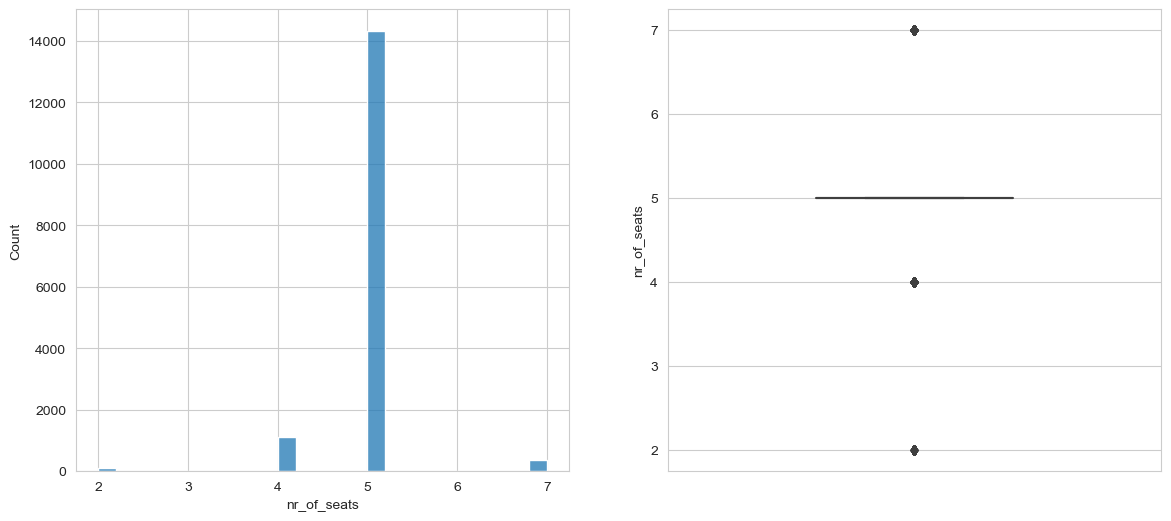

In [96]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.histplot(df.nr_of_seats, bins=25)

plt.subplot(1,2,2)
sns.boxplot(y=df.nr_of_seats, width=0.4, whis=2.5);

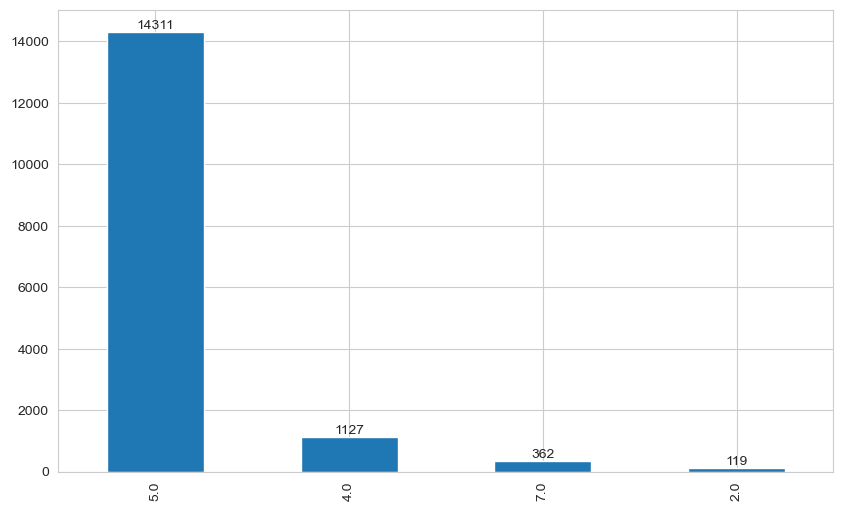

In [97]:
fig, ax = plt.subplots()

df.nr_of_seats.value_counts(dropna=False).plot.bar()

for container in ax.containers:
    ax.bar_label(container);

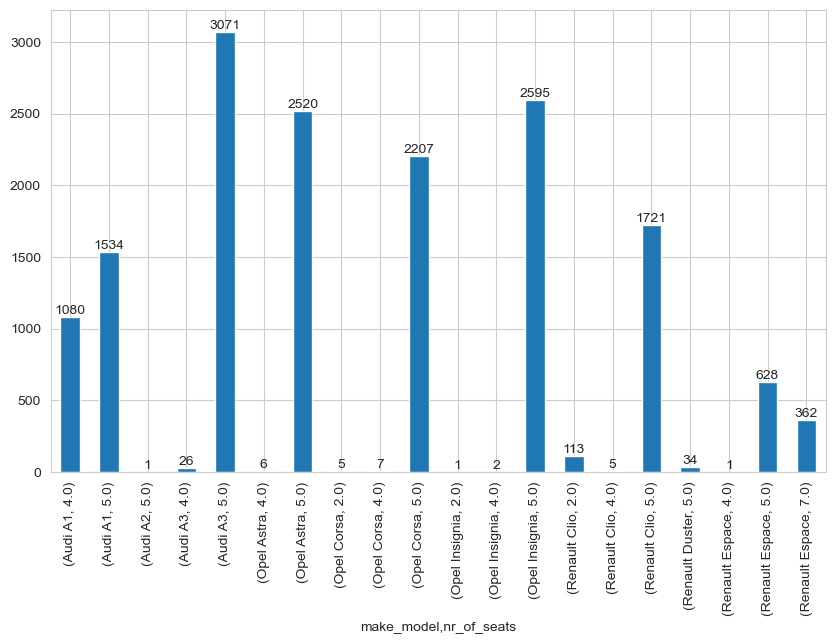

In [98]:
fig, ax = plt.subplots()

df.groupby(["make_model", "nr_of_seats"]).nr_of_seats.count().plot.bar()

for container in ax.containers:
    ax.bar_label(container);

<div class="alert alert-success"><font color=black><b>From the above results, it can be seen that most cars have <b><mark>5 seats.</b></mark> To avoid increasing the complexity of the analysis and since I do not think this column will not have a significant effect the <b><mark>"price"</b></mark> column, I have decided to drop <b><mark>"nr_of_seats"</b></mark> column.</font></div>

In [99]:
df.drop("nr_of_seats", axis=1, inplace=True)

In [100]:
df.shape

(15919, 23)

### <div class="alert alert-info"><font color=black>price :</font></div>

In [101]:
first_looking("price")

column name    :  price
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2956
--------------------------------
14990    154
15990    151
10990    139
15900    106
17990    102
9900      98
20900     93
22900     92
13990     92
21900     91
19900     89
14900     88
17900     86
18900     86
16990     86
Name: price, dtype: int64


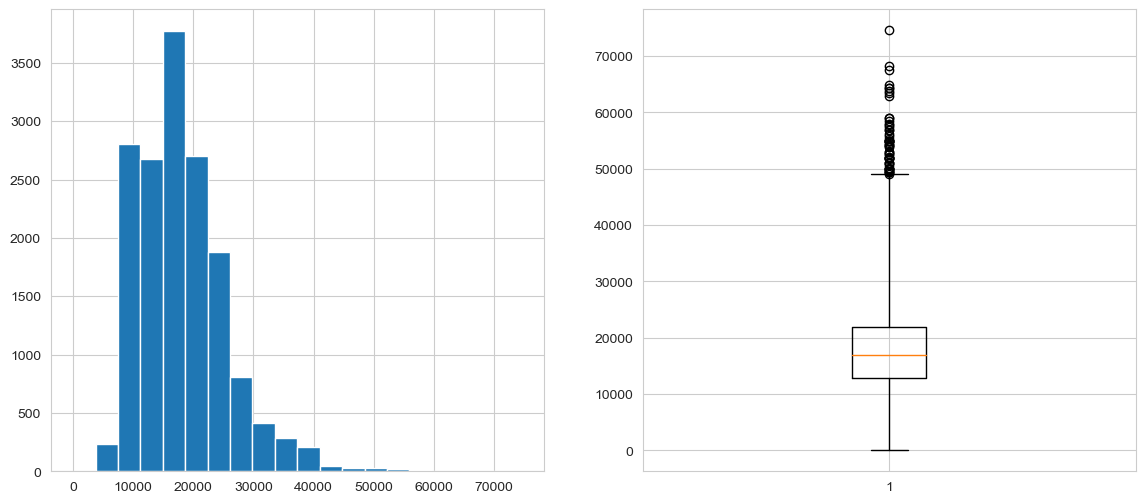

In [102]:
plt.figure(figsize=(14, 6))

plt.subplot(121)
plt.hist(df.price, bins=20)

plt.subplot(122)
plt.boxplot(df.price, whis=3)

plt.show()

In [103]:
df.price.describe()

count   15919.000
mean    18019.897
std      7386.169
min        13.000
25%     12850.000
50%     16900.000
75%     21900.000
max     74600.000
Name: price, dtype: float64

In [104]:
df.price.sort_values().head(5)

8594      13
8828     120
6066     255
8829     331
8827    4950
Name: price, dtype: int64

In [105]:
drop_index = df.price.sort_values().index[:4]
drop_index

Int64Index([8594, 8828, 6066, 8829], dtype='int64')

In [106]:
df.drop(drop_index, axis=0, inplace=True)

In [107]:
df.shape

(15915, 23)

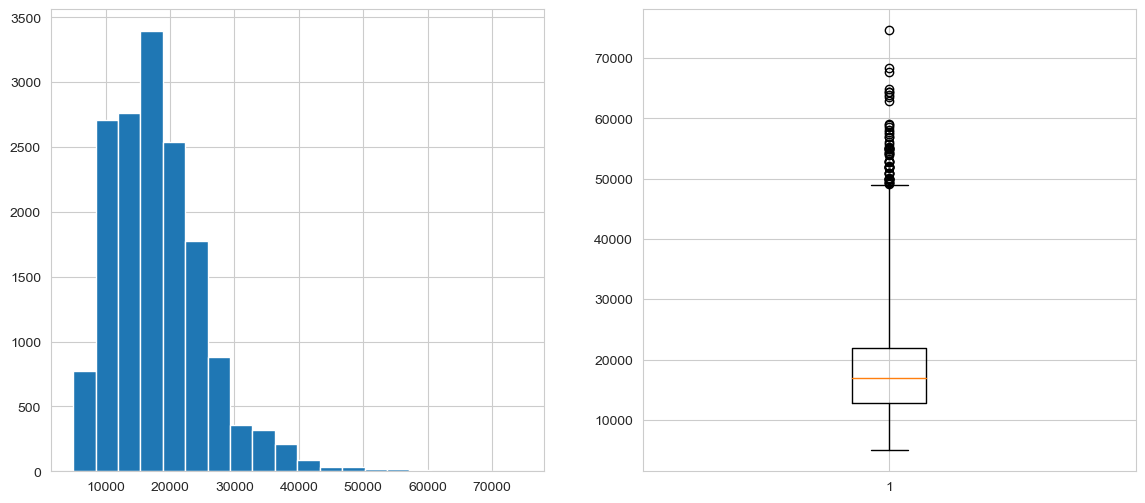

In [108]:
plt.figure(figsize=(14, 6))

plt.subplot(121)
plt.hist(df.price, bins=20)

plt.subplot(122)
plt.boxplot(df.price, whis=3)

plt.show()

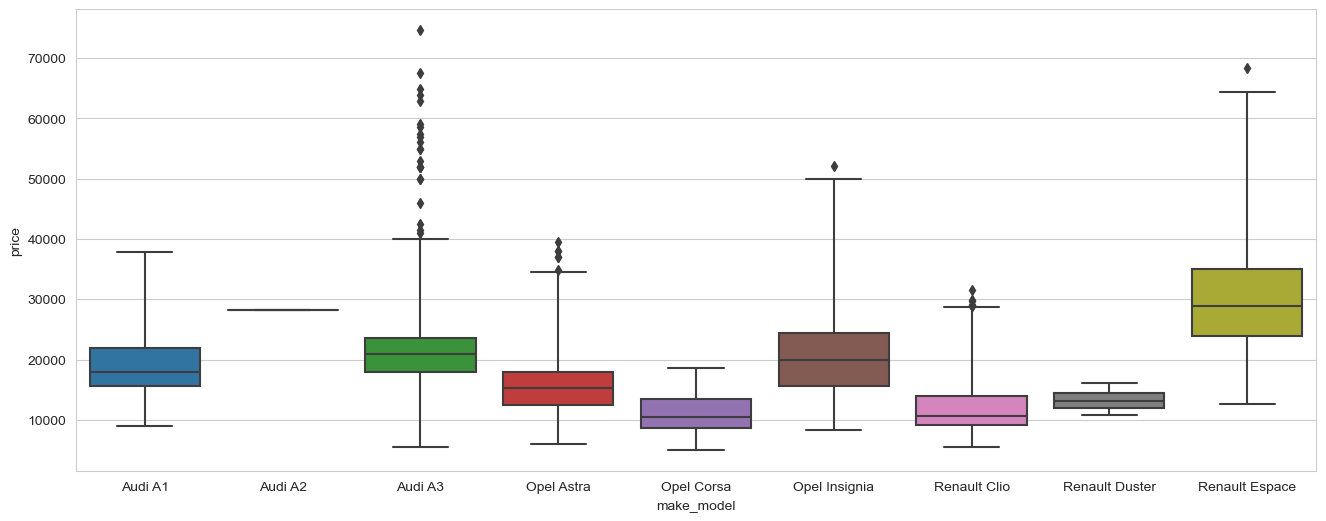

In [109]:
plt.figure(figsize=(16, 6))
sns.boxplot(x="make_model", y="price", data=df, whis=3);

### <div class="alert alert-info"><font color=black>make_model :</font></div>

In [110]:
first_looking("make_model")

column name    :  make_model
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  9
--------------------------------
Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64


In [111]:
df[df.make_model=="Audi A2"]

make_model body_type  price        km  hp_kW            type  \
2614    Audi A2  Off-Road  28200 26166.000 85.000  Employee's car   

      previous_owners  inspection_new paint_type gearing_type drive_chain  \
2614            1.000               0   Metallic       Manual       front   

        fuel  CO2_emission comfort_and_convenience entertainment_and_media  \
2614  Diesel       117.000                Standard                 Premium   

            extras     safety_and_security  gears   age upholstery_type  \
2614  Alloy wheels  Safety Premium Package  6.000 1.000           Cloth   

      displacement_cc  weight_kg  cons_comb  
2614         1598.000   1135.000      4.900

The **``Audi A2``** (internally designated Typ 8Z) is a compact MPV-styled supermini car, with a five-door hatchback body style and four or five seats, produced by the German manufacturer Audi **from November 1999 (for the 2000 model year) to August 2005** [Source](https://en.wikipedia.org/wiki/Audi_A2). **So it is impossible to be a 1-year old Audi A2**.

In [112]:
drop_index = df[df.make_model == "Audi A2"].index
drop_index

Int64Index([2614], dtype='int64')

In [113]:
df.drop(drop_index, axis=0, inplace=True)

In [114]:
df.shape

(15914, 23)

### <div class="alert alert-info"><font color=black>fuel :</font></div>

In [115]:
first_looking("fuel")

column name    :  fuel
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  4
--------------------------------
Benzine     8548
Diesel      7297
LPG/CNG       64
Electric       5
Name: fuel, dtype: int64


In [116]:
df[df.fuel == "Electric"][["make_model", "body_type", "CO2_emission", "gears", "hp_kW", "cons_comb", "price"]]

make_model body_type  CO2_emission  gears   hp_kW  cons_comb  price
3356        Audi A3   Compact        36.000  6.000 150.000      4.000  24950
3612        Audi A3    Sedans        36.000  6.000 110.000      4.000  38450
3615        Audi A3    Sedans        36.000  6.000 110.000      4.000  35899
3617        Audi A3    Sedans        36.000  6.000 110.000      4.000  38000
13397  Renault Clio    Sedans        36.000  6.000  55.000      5.000   8490

There are only 5 cars with Electric. Since I think that these cars

<div class="alert alert-success"><font color=black><b>There are only <mark>5 cars with Electric.</mark> We can not get any conclusions from this insufficient information. So I have decided to <b><mark>drop these 5 rows.</b></mark> </font></div>

In [117]:
drop_index = df[df.fuel == "Electric"].index
drop_index

Int64Index([3356, 3612, 3615, 3617, 13397], dtype='int64')

In [118]:
df.drop(drop_index, axis=0, inplace=True)

In [119]:
df.reset_index(drop=True, inplace=True)

In [120]:
df.shape

(15909, 23)

## <div class="alert alert-danger"><font color=black>7. <u>Final Step :</u></font></div>

In [121]:
df.head(3).T

0  \
make_model                                                        Audi A1   
body_type                                                          Sedans   
price                                                               15770   
km                                                              56013.000   
hp_kW                                                              66.000   
type                                                                 Used   
previous_owners                                                     2.000   
inspection_new                                                          1   
paint_type                                                       Metallic   
gearing_type                                                    Automatic   
drive_chain                                                         front   
fuel                                                               Diesel   
CO2_emission                                                       99.000   
comfort_and_convenience                                           Premium   
entertainment_and_media                                           Premium   
extras                   Alloy wheels, Catalytic Converter, Voice Control   
safety_and_security                                Safety Premium Package   
gears                                                               7.000   
age                                                                 3.000   
upholstery_type                                                     Cloth   
displacement_cc                                                  1422.000   
weight_kg                                                        1220.000   
cons_comb                                                           3.800   

                                                                         1  \
make_model                                                         Audi A1   
body_type                                                           Sedans   
price                                                                14500   
km                                                               80000.000   
hp_kW                                                              141.000   
type                                                                  Used   
previous_owners                                                      1.000   
inspection_new                                                           0   
paint_type                                                        Metallic   
gearing_type                                                     Automatic   
drive_chain                                                          front   
fuel                                                               Benzine   
CO2_emission                                                       129.000   
comfort_and_convenience                                           Standard   
entertainment_and_media                                            Premium   
extras                   Alloy wheels, Sport seats, Sport suspension, V...   
safety_and_security                                 Safety Premium Package   
gears                                                                7.000   
age                                                                  2.000   
upholstery_type                                                      Cloth   
displacement_cc                                                   1798.000   
weight_kg                                                         1255.000   
cons_comb                                                            5.600   

                                                   2  
make_model                                   Audi A1  
body_type                                     Sedans  
price                                          14640  
km                                         83450.000  
hp_kW                                         85.000  
type                

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15909 entries, 0 to 15908
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   make_model               15909 non-null  object 
 1   body_type                15909 non-null  object 
 2   price                    15909 non-null  int64  
 3   km                       15909 non-null  float64
 4   hp_kW                    15909 non-null  float64
 5   type                     15909 non-null  object 
 6   previous_owners          15909 non-null  float64
 7   inspection_new           15909 non-null  int64  
 8   paint_type               15909 non-null  object 
 9   gearing_type             15909 non-null  object 
 10  drive_chain              15909 non-null  object 
 11  fuel                     15909 non-null  object 
 12  CO2_emission             15909 non-null  float64
 13  comfort_and_convenience  15909 non-null  object 
 14  entertainment_and_medi

In [123]:
df_num = df.select_dtypes("number")
df_num

price        km   hp_kW  previous_owners  inspection_new  CO2_emission  \
0      15770 56013.000  66.000            2.000               1        99.000   
1      14500 80000.000 141.000            1.000               0       129.000   
2      14640 83450.000  85.000            1.000               0        99.000   
3      14500 73000.000  66.000            1.000               0        99.000   
4      16790 16200.000  66.000            1.000               1       109.000   
...      ...       ...     ...              ...             ...           ...   
15904  39950  1647.363 147.000            1.000               0       139.000   
15905  39885  9900.000 165.000            1.000               0       168.000   
15906  39875    15.000 146.000            1.000               1       139.000   
15907  39700    10.000 147.000            1.000               0       139.000   
15908  40999  1647.363 165.000            1.000               1       153.000   

       gears   age  displacement_cc  weight_kg  cons_comb  
0      7.000 3.000         1422.000   1220.000      3.800  
1      7.000 2.000         1798.000   1255.000      5.600  
2      7.000 3.000         1598.000   1135.000      3.800  
3      6.000 3.000         1422.000   1195.000      3.800  
4      7.000 3.000         1422.000   1135.000      4.100  
...      ...   ...              ...        ...        ...  
15904  6.000 0.000         1997.000   1758.000      5.300  
15905  7.000 0.000         1798.000   1708.000      7.400  
15906  6.000 0.000         1997.000   1734.000      5.300  
15907  6.000 0.000         1997.000   1758.000      5.300  
15908  6.000 0.000         1798.000   1685.000      6.800  

[15909 rows x 11 columns]

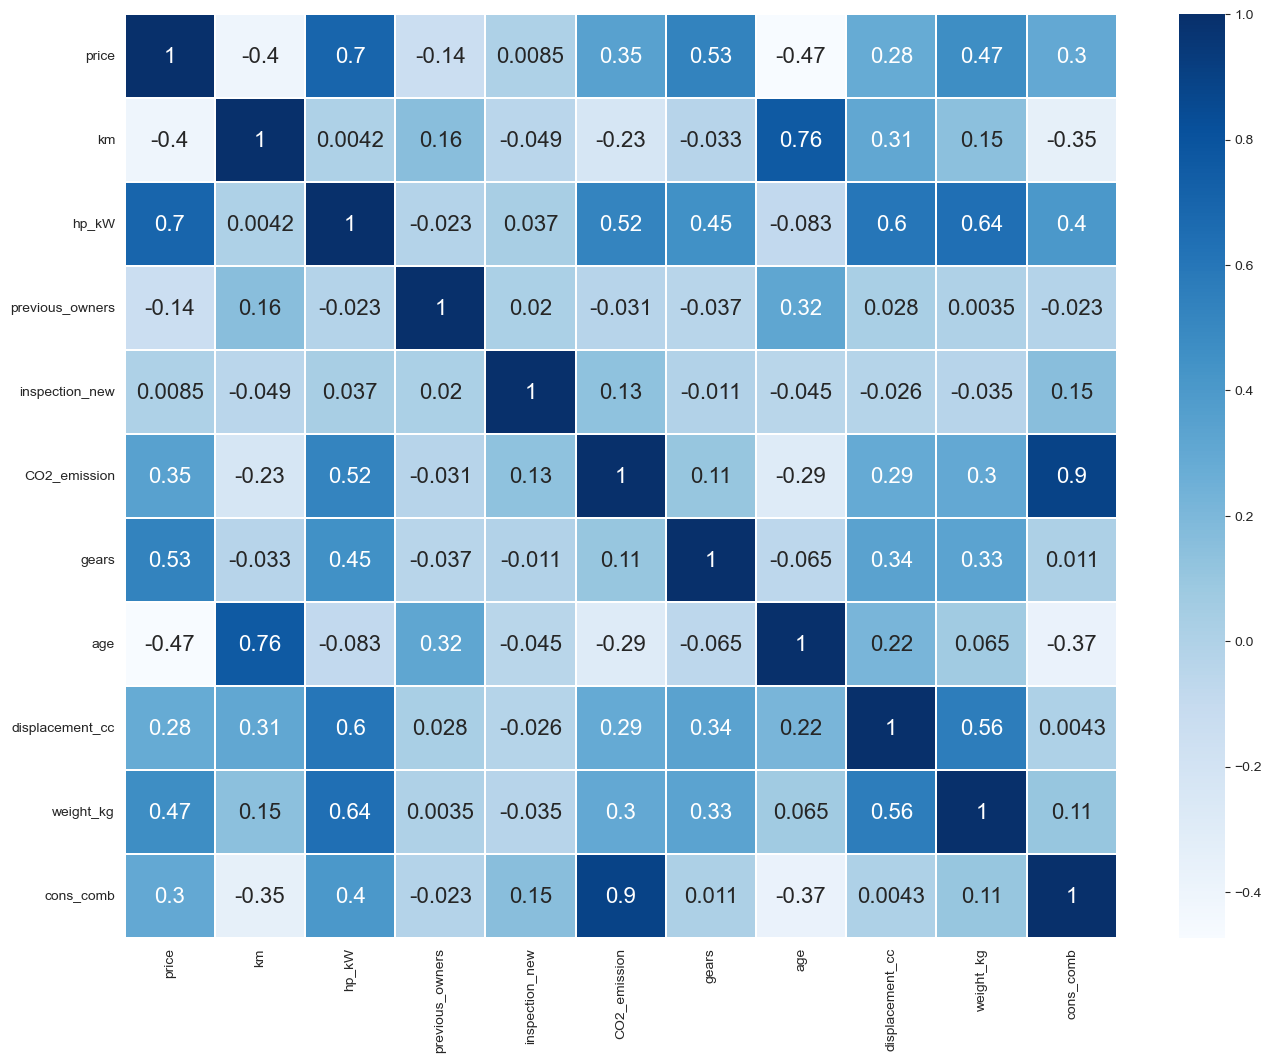

In [124]:
plt.figure(figsize=(16, 12))

sns.heatmap(df_num.corr(), annot=True, cmap="Blues", linewidths=0.2, annot_kws={"size": 16});

In [125]:
# function for set text color of correlation values in Dataframes

def color_correlation(val):
    """
    Takes a scalar and returns a string with
    the css property in a variety of color scales 
    for different correlations.
    """
    if val >= 0.6 and val < 0.99999 or val <= -0.6 and val > -0.99999:
        color = 'red'
    elif val < 0.6 and val >= 0.3 or val > -0.6 and val <= -0.3:
        color = 'blue'
    elif val == 1:
        color = 'cyan'    
    else:
        color = 'black'
    return 'color: %s' % color

In [126]:
df_num.corr().style.applymap(color_correlation)

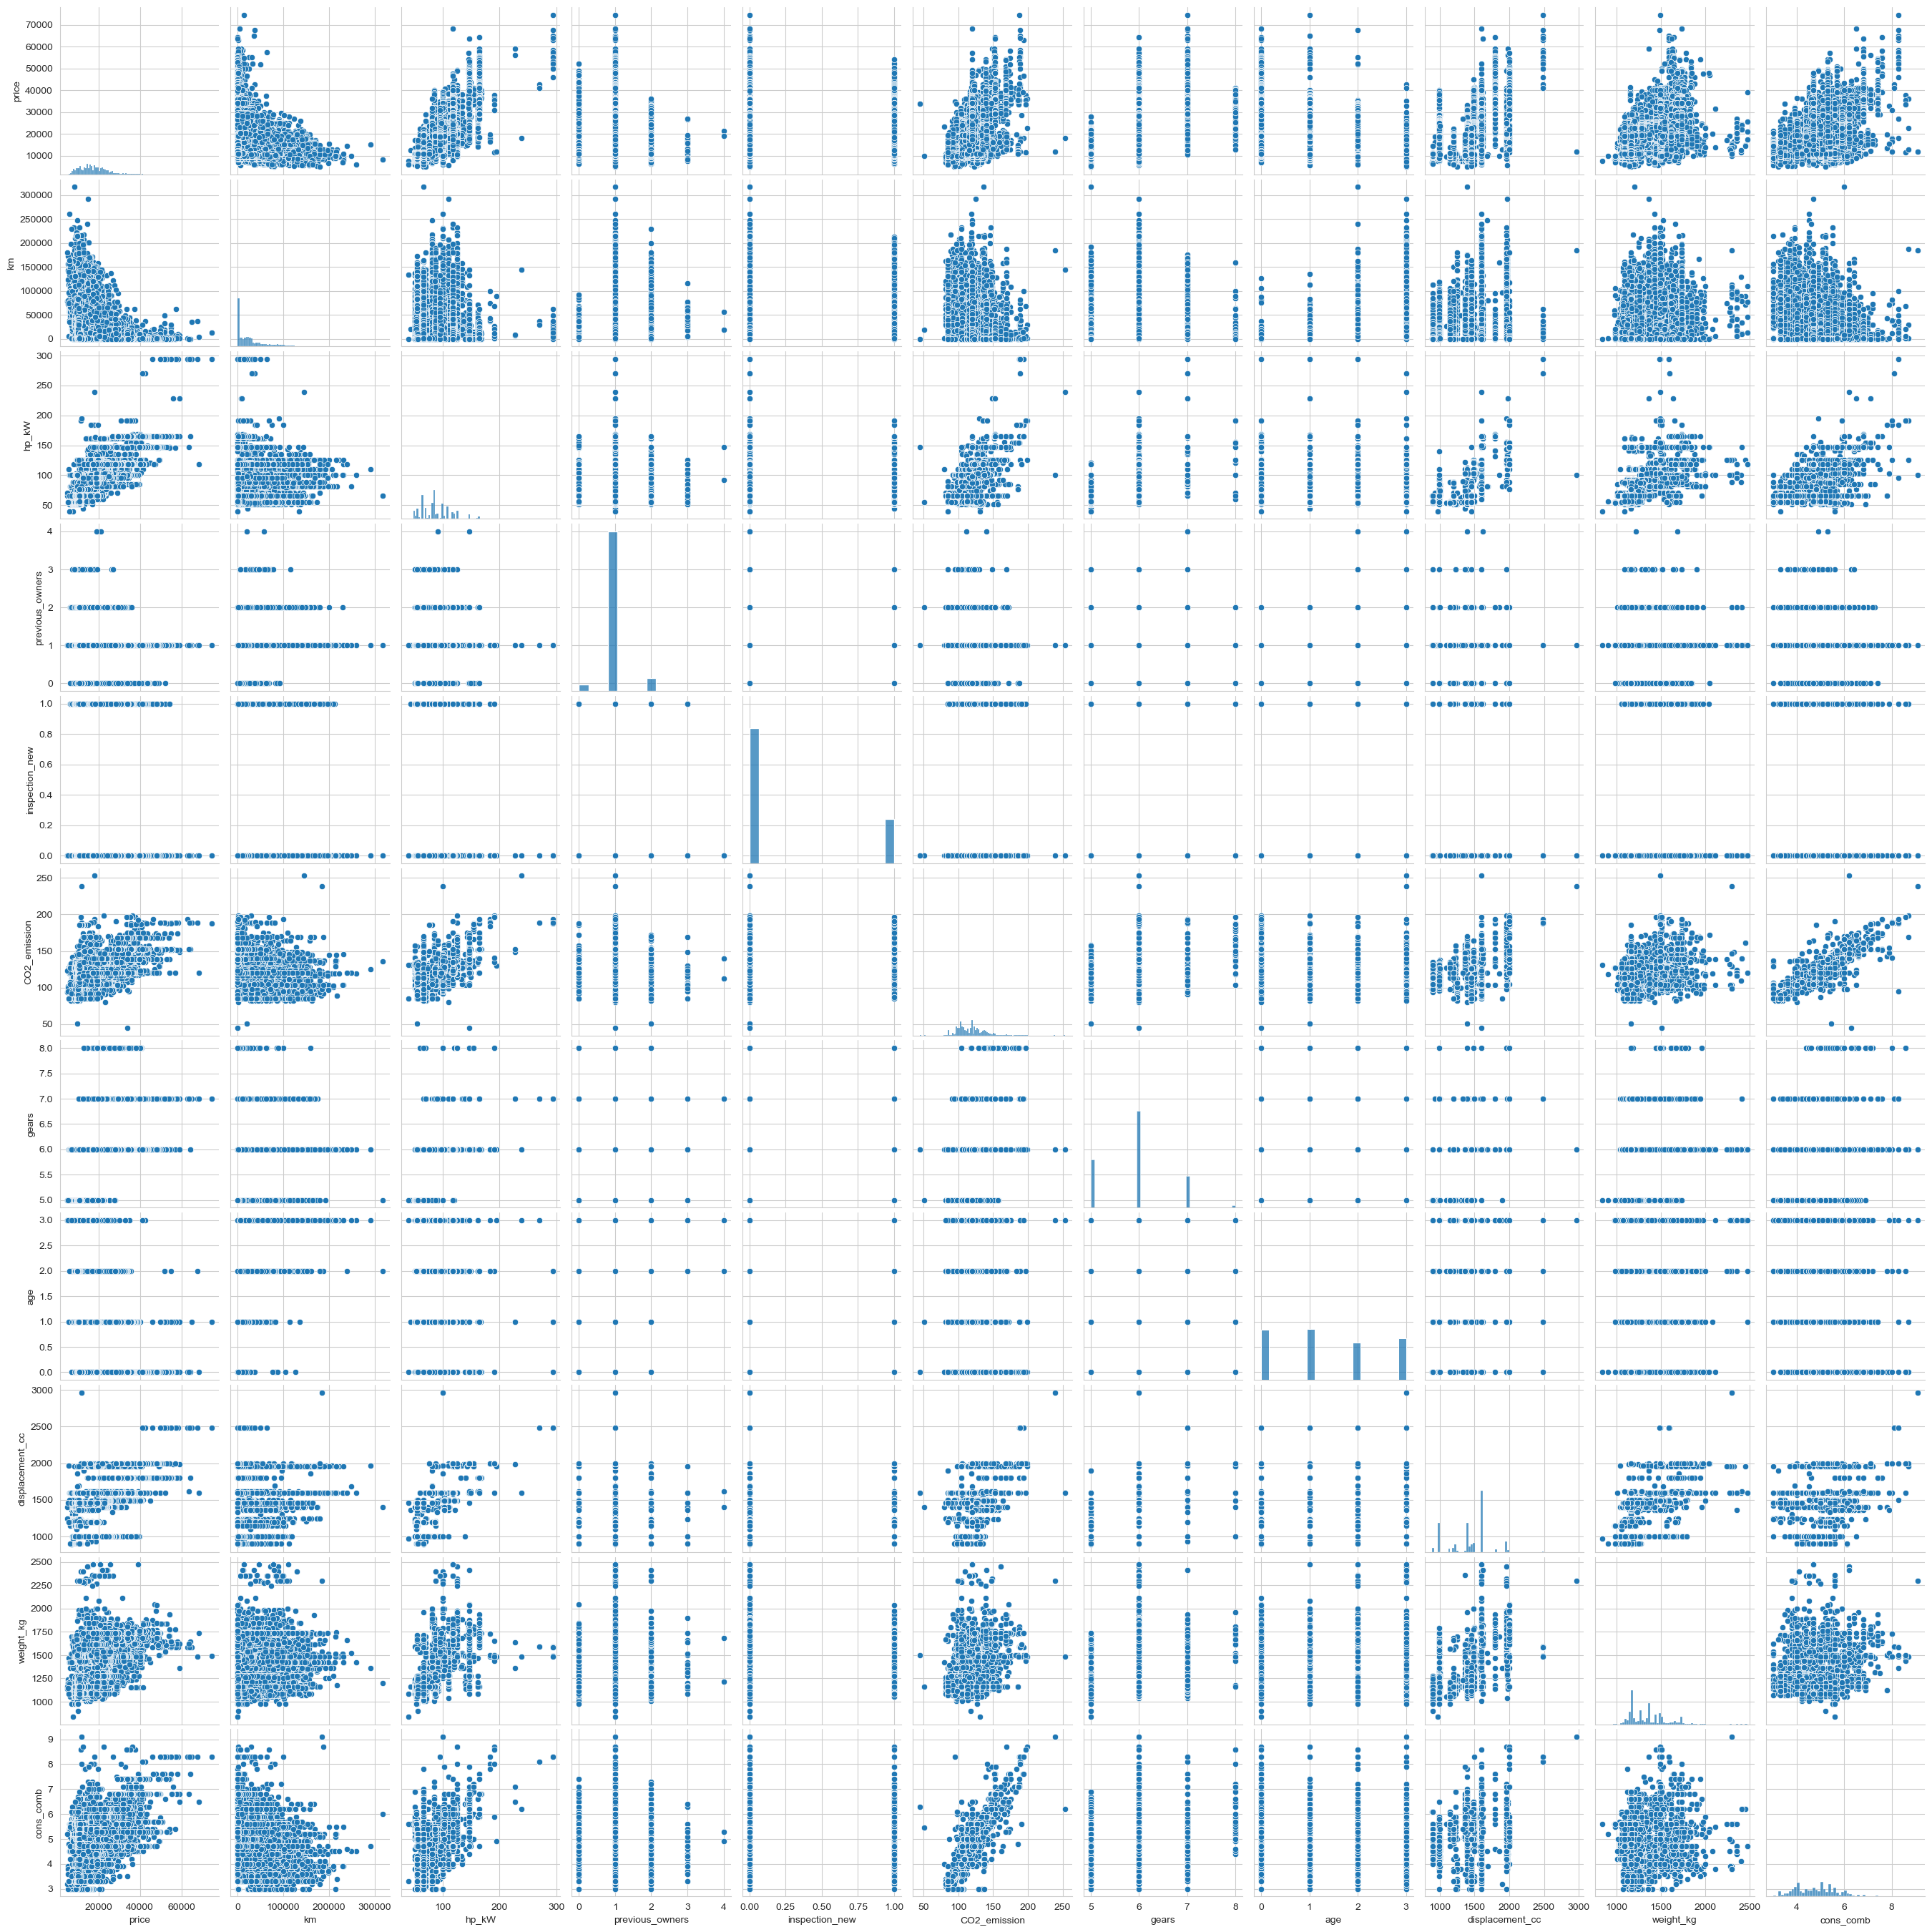

In [127]:
sns.pairplot(df_num, size=2.5);

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; ">Some Specific Questions on Analysis</p>

### <div class="alert alert-info"><font color=black>1. What is the average kilometer of the vehicles according to their body types?</font></div>

In [128]:
avg_km = df.groupby(["make_model", "body_type"]).km.mean()
avg_km

make_model      body_type    
Audi A1         Compact         20668.668
                Coupe           38650.000
                Sedans          22706.169
                Station wagon   22421.048
                Van              3000.000
Audi A3         Compact         62481.837
                Convertible     20532.875
                Coupe           26876.500
                Sedans          37194.306
                Station wagon   34814.260
Opel Astra      Compact         28041.784
                Coupe           11293.681
                Off-Road        12607.000
                Sedans          26394.506
                Station wagon   46588.099
Opel Corsa      Compact         19848.416
                Coupe           33260.105
                Off-Road        50729.000
                Sedans          31992.909
                Transporter     52018.623
                Van             33633.000
Opel Insignia   Compact         21232.828
                Coupe           28142.000
    

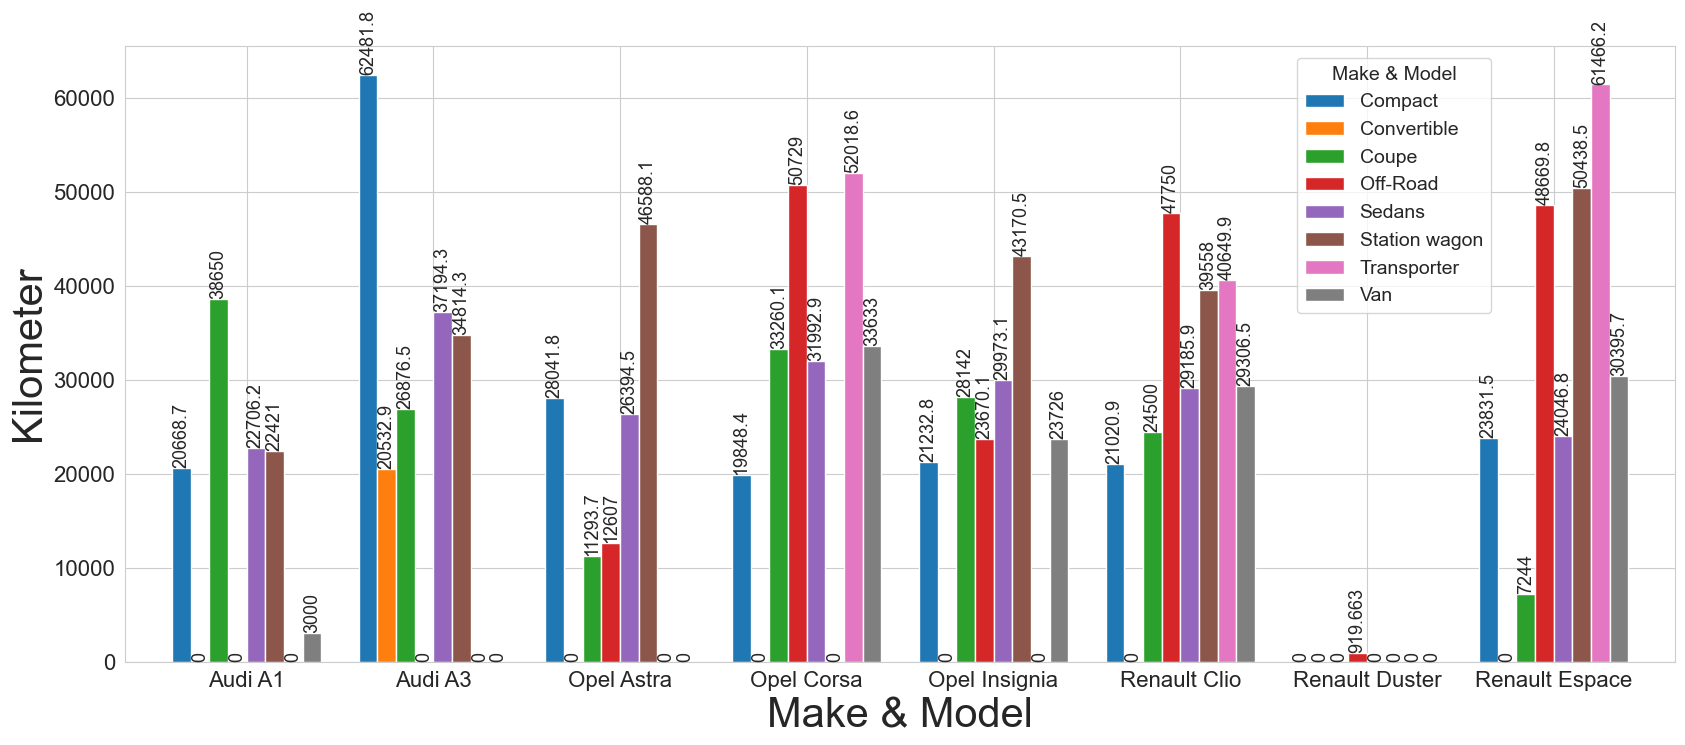

In [129]:
ax = avg_km.unstack(level=1).plot.bar(figsize=(20, 8), fontsize=16, width=0.8, rot=0)

for container in ax.containers:
    ax.bar_label(container, fontsize=13, rotation=90)
    
ax.set_xlabel('Make & Model', fontsize=30)
ax.set_ylabel('Kilometer', fontsize=30)
plt.legend(title="Make & Model", title_fontsize=14, prop={'size': 14}, bbox_to_anchor=(0.75, 0.55));

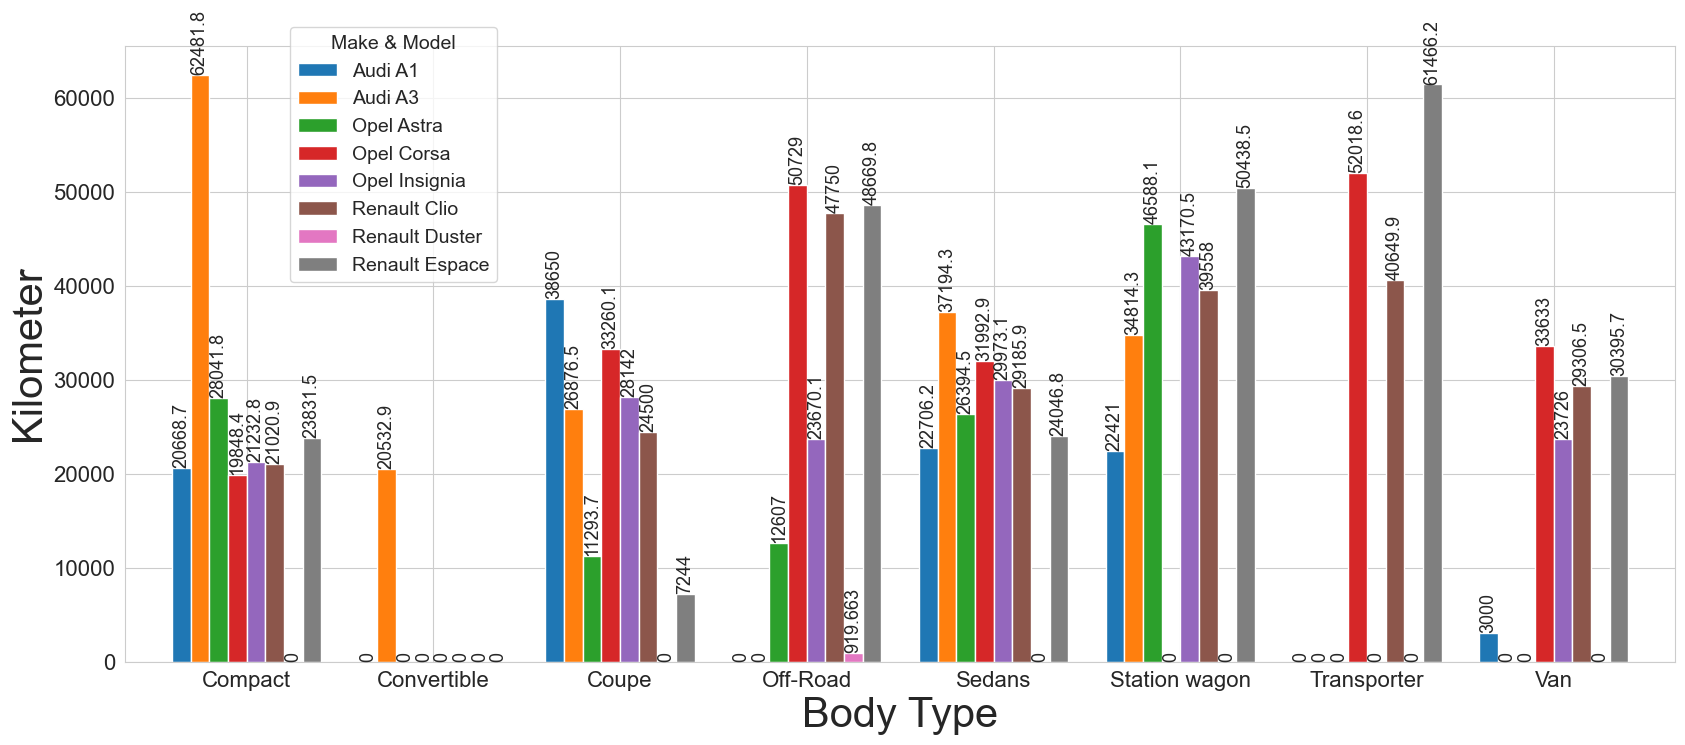

In [130]:
ax = avg_km.unstack(level=0).plot.bar(figsize=(20, 8), fontsize=16, width=0.8, rot=0)

for container in ax.containers:
    ax.bar_label(container, fontsize=13, rotation=90)
    
ax.set_xlabel('Body Type', fontsize=30)
ax.set_ylabel('Kilometer', fontsize=30)
plt.legend(title="Make & Model", title_fontsize=14, prop={'size': 14}, bbox_to_anchor=(0.1, 0.6));

### <div class="alert alert-info"><font color=black>2. What is the average price of the vehicles according to the gear types they use?</font></div>

In [131]:
avg_price1 = df.groupby(["make_model", "gearing_type"]).price.mean()
avg_price1

make_model      gearing_type  
Audi A1         Automatic        21451.658
                Manual           16659.505
                Semi-automatic   20936.526
Audi A3         Automatic        21490.719
                Manual           19433.989
                Semi-automatic   27180.000
Opel Astra      Automatic        18843.303
                Manual           13516.257
                Semi-automatic   16132.722
Opel Corsa      Automatic        14051.363
                Manual            9021.493
                Semi-automatic   11930.000
Opel Insignia   Automatic        23114.156
                Manual           19747.963
Renault Clio    Automatic        16238.258
                Manual            9502.069
                Semi-automatic   16507.756
Renault Duster  Automatic        14641.500
                Manual           12795.923
Renault Espace  Automatic        30904.995
                Manual           23691.402
                Semi-automatic   25114.077
Name: price, dtype: flo

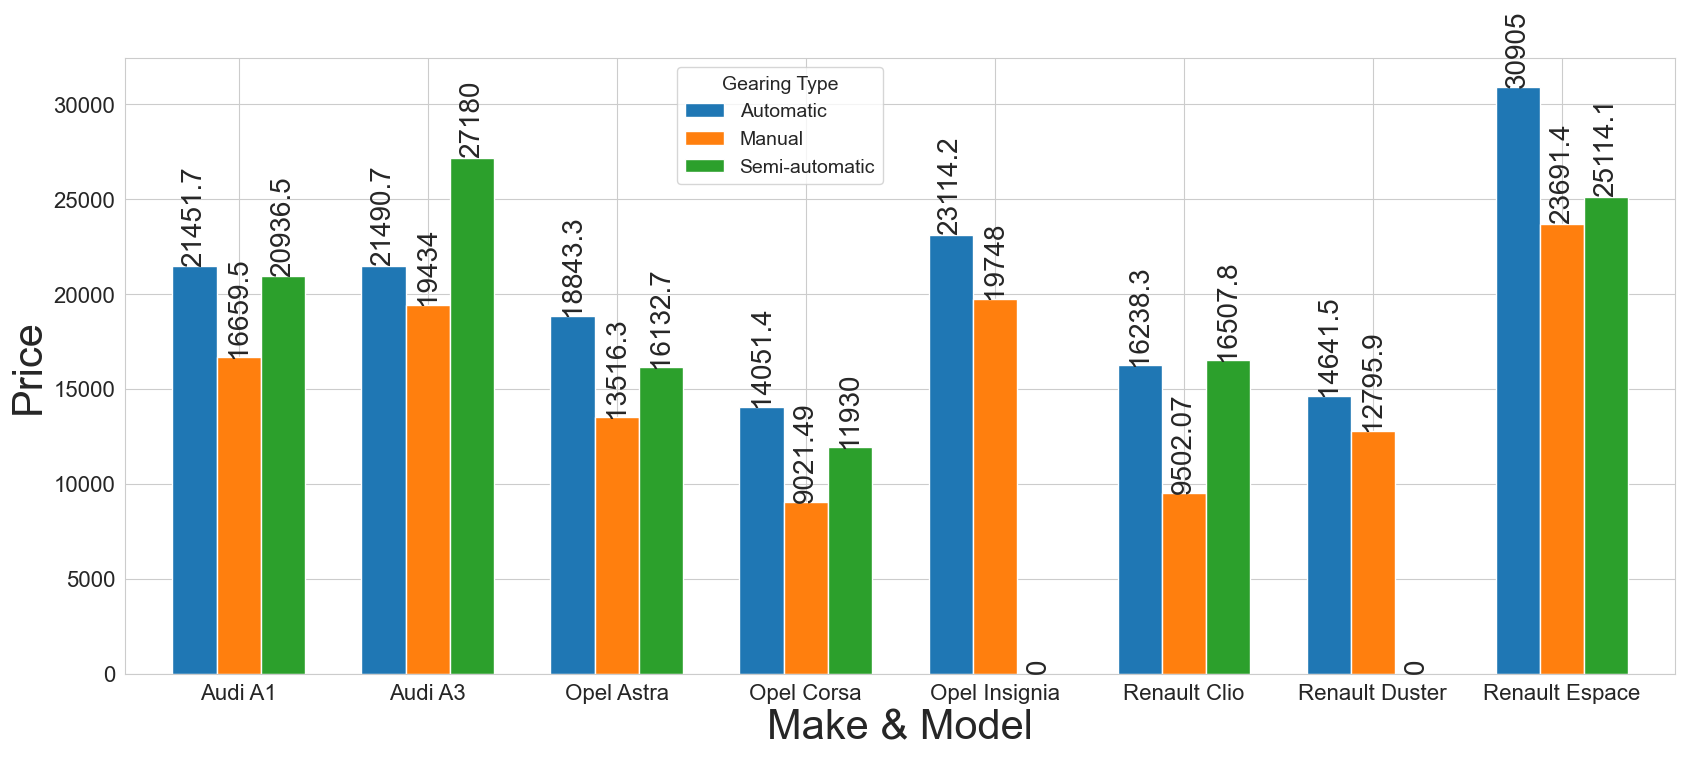

In [132]:
ax = avg_price1.unstack(level=1).plot.bar(figsize=(20, 8), fontsize=16, width=0.7, rot=0)

for container in ax.containers:
    ax.bar_label(container, fontsize=20, rotation=90)
    
ax.set_xlabel('Make & Model', fontsize=30)
ax.set_ylabel('Price', fontsize=30)
plt.legend(title="Gearing Type", title_fontsize=14, prop={'size': 14}, bbox_to_anchor=(0.35, 1));

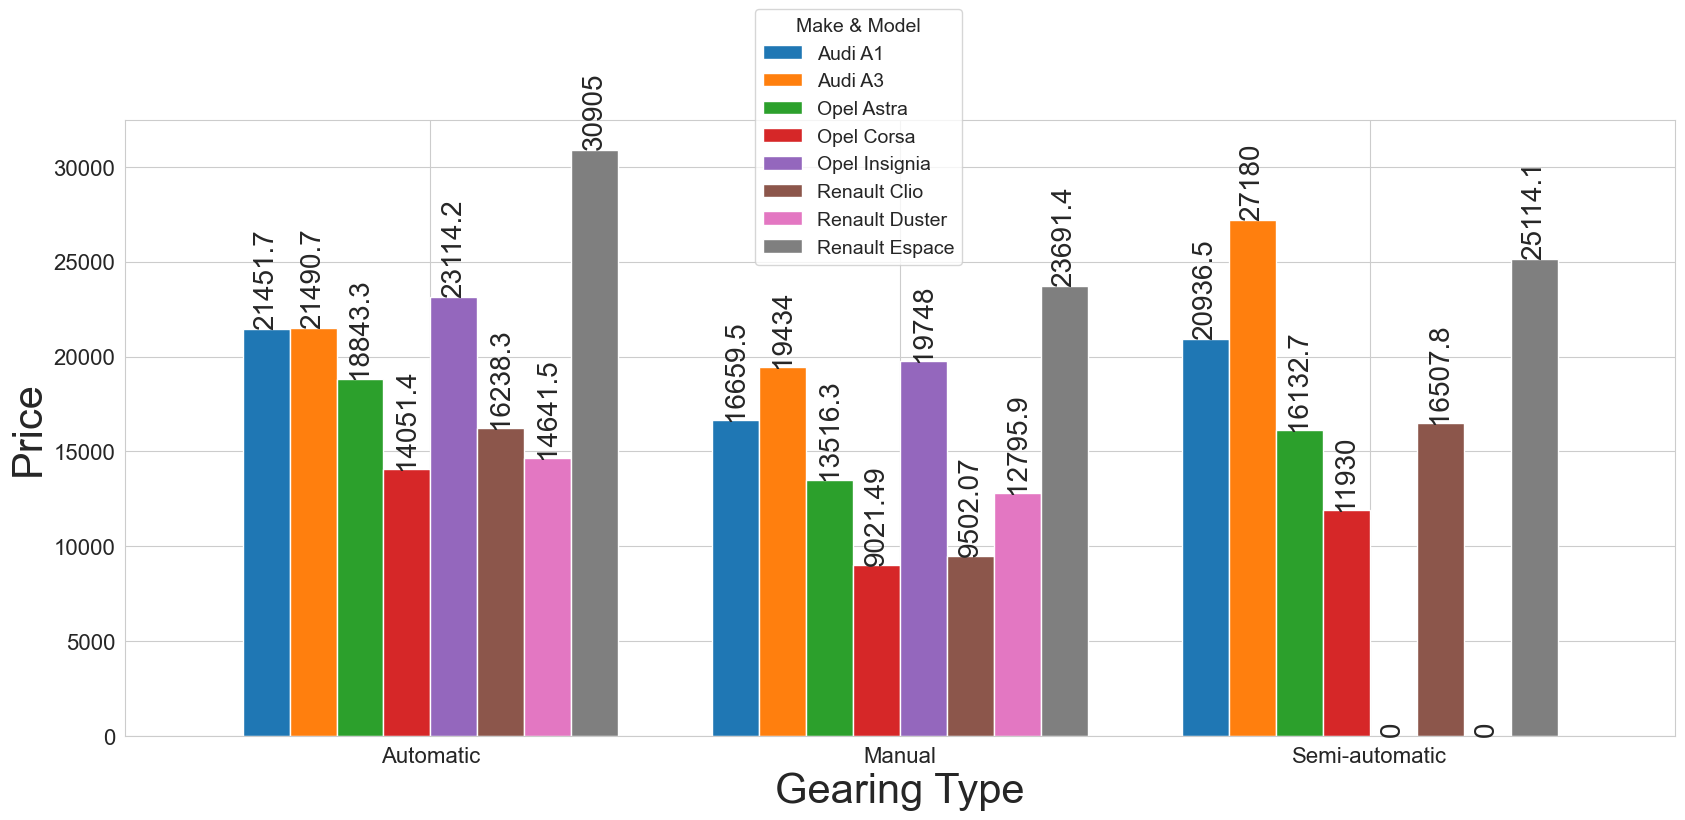

In [133]:
ax = avg_price1.unstack(level=0).plot.bar(figsize=(20, 8), fontsize=16, width=0.8, rot=0)

for container in ax.containers:
    ax.bar_label(container, fontsize=20, rotation=90)
    
ax.set_xlabel('Gearing Type', fontsize=30)
ax.set_ylabel('Price', fontsize=30)
plt.legend(title="Make & Model", title_fontsize=14, prop={'size': 14}, bbox_to_anchor=(0.4, 0.75));

### <div class="alert alert-info"><font color=black>3. What is the average price of the vehicles according to the fuel types they use?</font></div>

In [134]:
avg_price2 = df.groupby(["make_model", "fuel"]).price.mean()
avg_price2

make_model      fuel   
Audi A1         Benzine   20037.974
                Diesel    16135.981
Audi A3         Benzine   22916.431
                Diesel    20110.062
                LPG/CNG   21684.083
Opel Astra      Benzine   17816.946
                Diesel    13435.740
                LPG/CNG   15882.000
Opel Corsa      Benzine   11313.743
                Diesel     7796.086
                LPG/CNG    9503.769
Opel Insignia   Benzine   24890.695
                Diesel    19698.871
Renault Clio    Benzine   13034.561
                Diesel    10120.655
                LPG/CNG    8545.385
Renault Duster  Benzine   13230.176
Renault Espace  Benzine   34814.026
                Diesel    28280.308
Name: price, dtype: float64

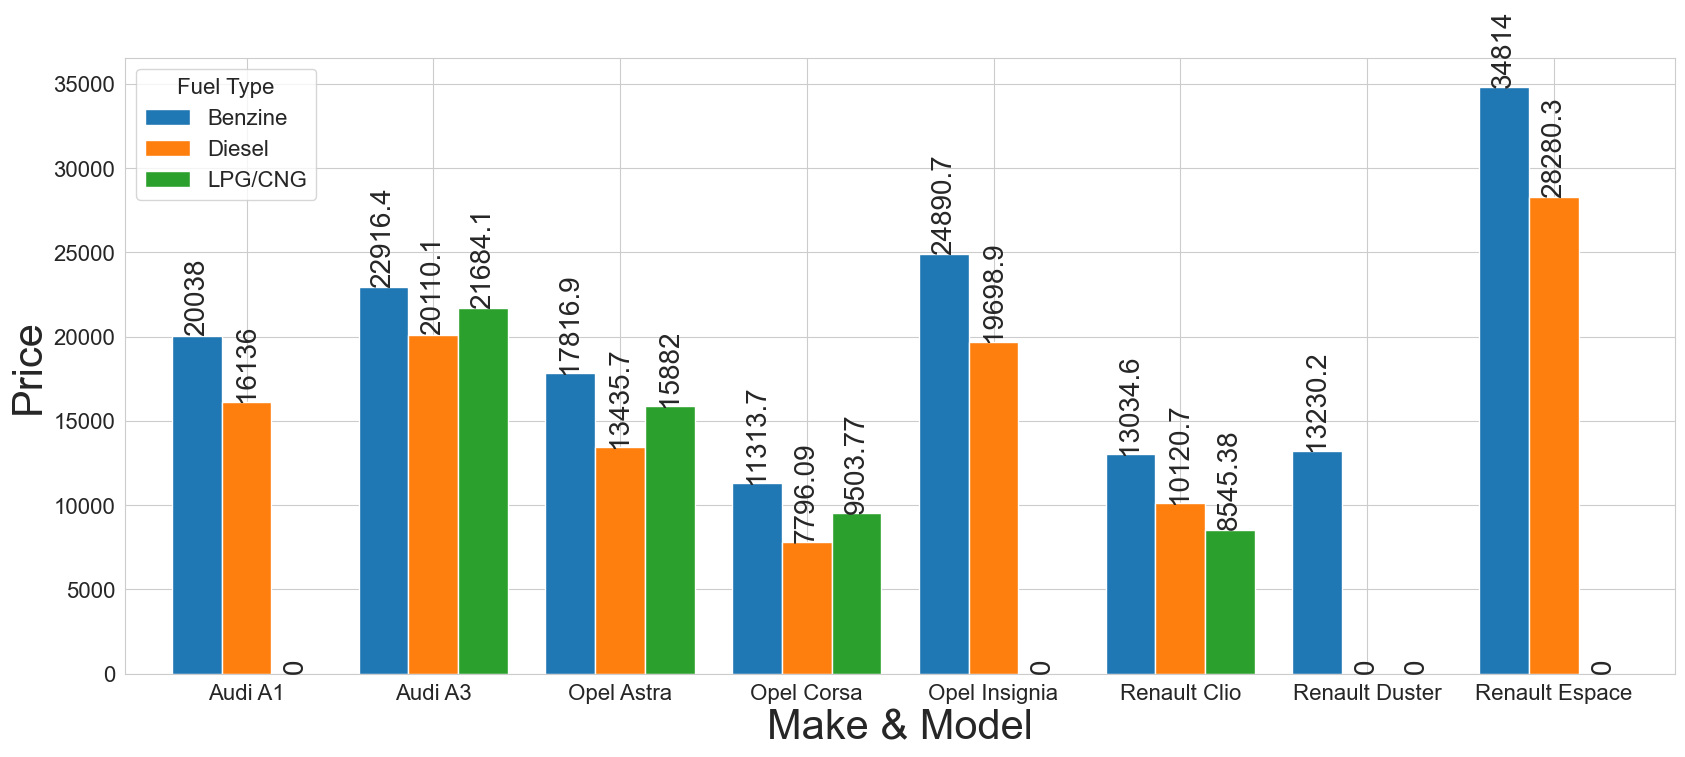

In [135]:
ax = avg_price2.unstack(level=1).plot.bar(figsize=(20, 8), fontsize=16, width=0.8, rot=0)

for container in ax.containers:
    ax.bar_label(container, fontsize=20, rotation=90)
    
ax.set_xlabel('Make & Model', fontsize=30)
ax.set_ylabel('Price', fontsize=30)
plt.legend(title="Fuel Type", title_fontsize=16, prop={'size': 16}, loc='best');

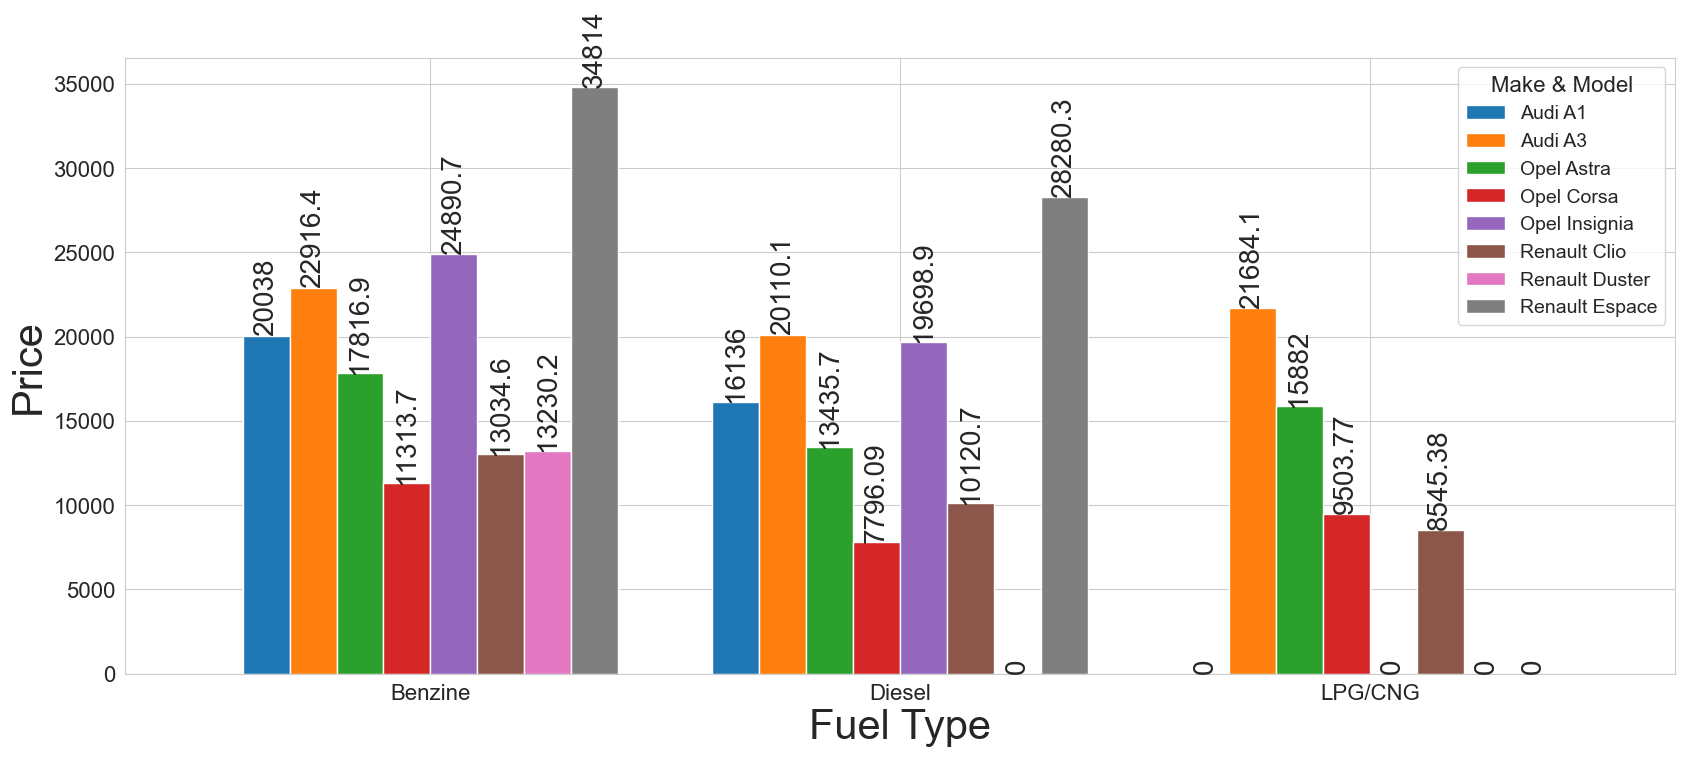

In [136]:
ax = avg_price2.unstack(level=0).plot.bar(figsize=(20, 8), fontsize=16, width=0.8, rot=0)

for container in ax.containers:
    ax.bar_label(container, fontsize=20, rotation=90)
    
ax.set_xlabel('Fuel Type', fontsize=30)
ax.set_ylabel('Price', fontsize=30)
plt.legend(title="Make & Model", title_fontsize=16, prop={'size': 14}, loc='best');

### <div class="alert alert-info"><font color=black>4. Which make & model has the highest number of vehicles for sale?</font></div>

In [137]:
df["make_model"].value_counts().nlargest(1)

Audi A3    3093
Name: make_model, dtype: int64

In [138]:
num_sale = df["make_model"].value_counts()
num_sale

Audi A3           3093
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1838
Renault Espace     991
Renault Duster      34
Name: make_model, dtype: int64

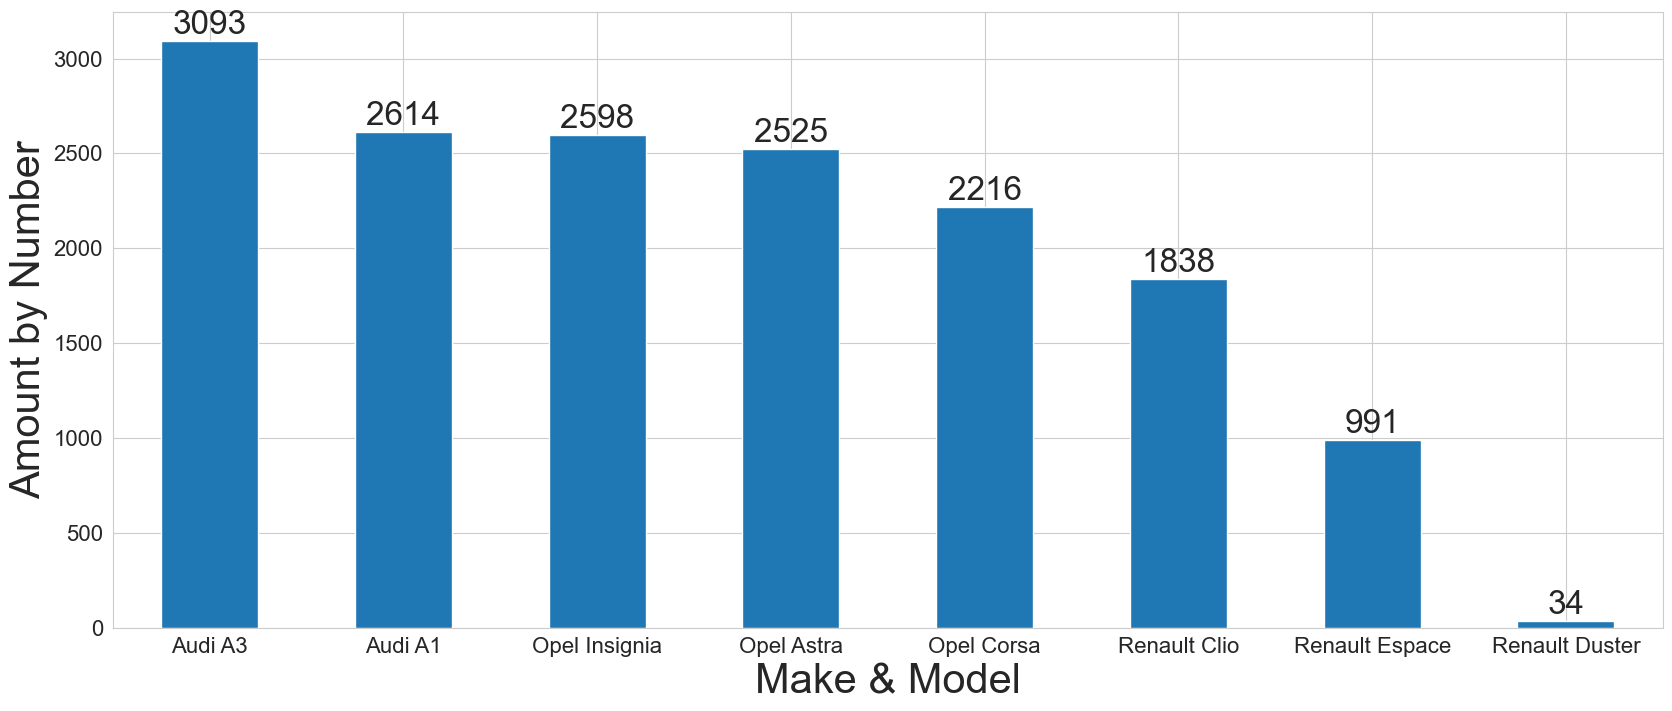

In [139]:
ax = num_sale.plot.bar(figsize=(20, 8), fontsize=16, rot=0)

for container in ax.containers:
    ax.bar_label(container, fontsize=24)
    
ax.set_xlabel('Make & Model', fontsize=30)
ax.set_ylabel('Amount by Number', fontsize=30);

### <div class="alert alert-info"><font color=black>5. Which vehicle make & models has the lowest fuel consumption by body type and what are their fuel types?</font></div>

In [140]:
cons = df.groupby(["make_model", "body_type", "fuel"]).cons_comb.min()
cons

make_model      body_type      fuel   
Audi A1         Compact        Benzine   4.000
                               Diesel    3.000
                Coupe          Benzine   4.200
                               Diesel    4.200
                Sedans         Benzine   3.900
                               Diesel    3.000
                Station wagon  Benzine   4.200
                               Diesel    3.400
                Van            Benzine   4.400
Audi A3         Compact        Benzine   4.500
                               Diesel    3.000
                Convertible    Benzine   4.900
                               Diesel    3.800
                Coupe          Benzine   4.600
                               Diesel    3.800
                Sedans         Benzine   3.500
                               Diesel    3.000
                               LPG/CNG   3.300
                Station wagon  Benzine   4.400
                               Diesel    3.300
                     

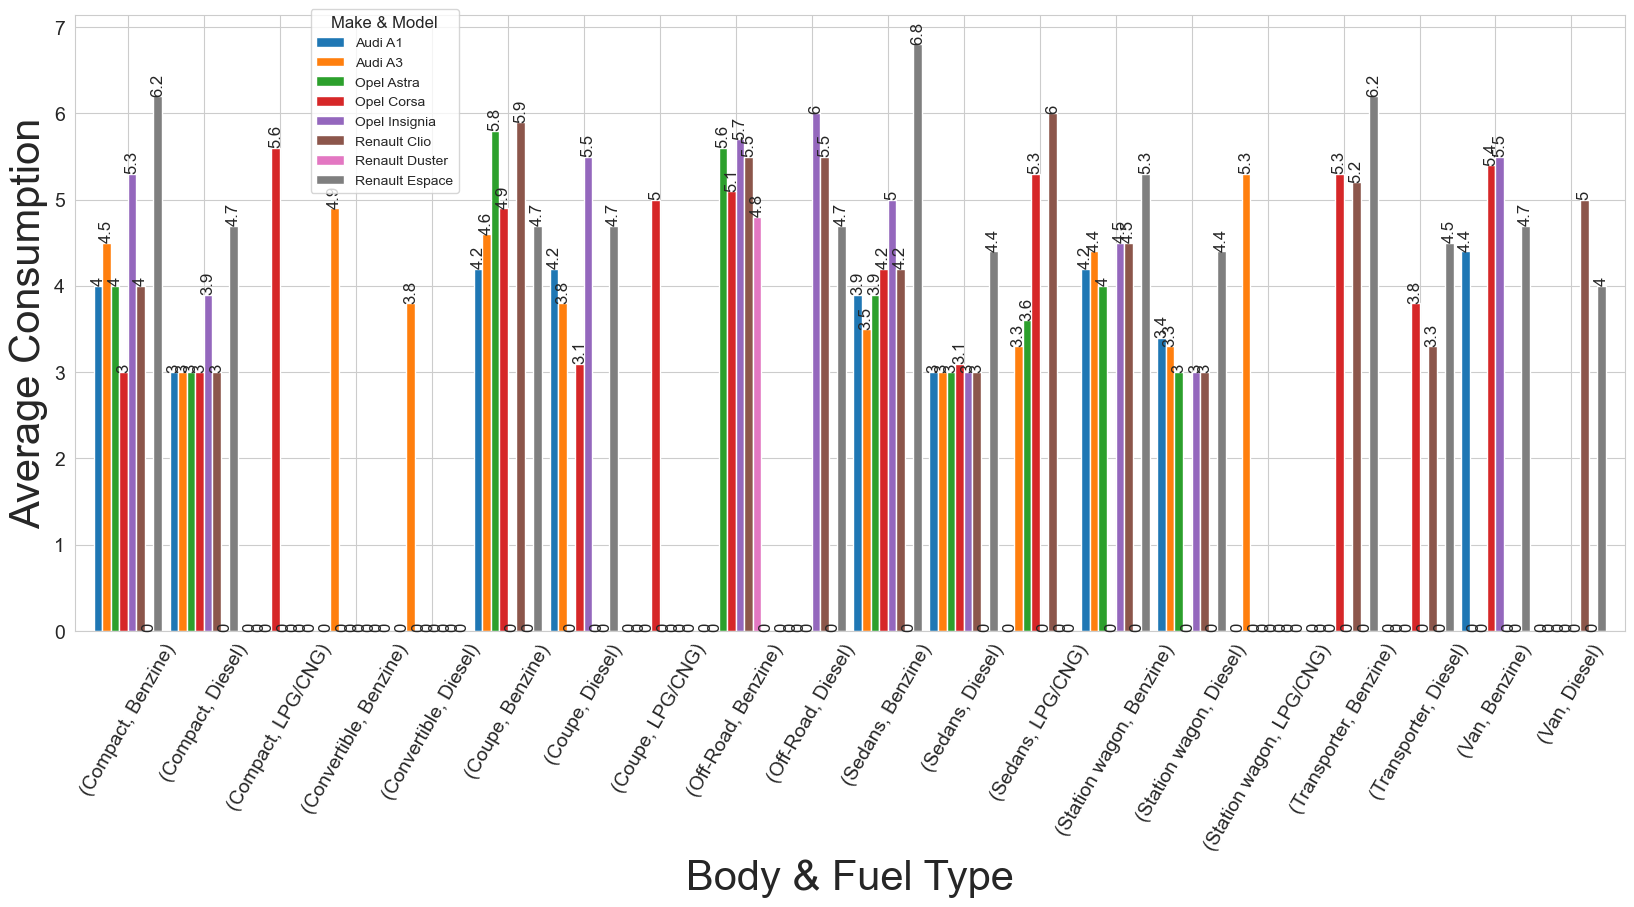

In [141]:
ax = cons.unstack(level=0).plot.bar(figsize=(20, 8), fontsize=14, width=0.9, rot=60)

for container in ax.containers:
    ax.bar_label(container, fontsize=12, rotation=90)
    
ax.set_xlabel('Body & Fuel Type', fontsize=30)
ax.set_ylabel('Average Consumption', fontsize=30)
plt.legend(title="Make & Model", title_fontsize=12, prop={'size': 10}, bbox_to_anchor=(0.2, 0.7));

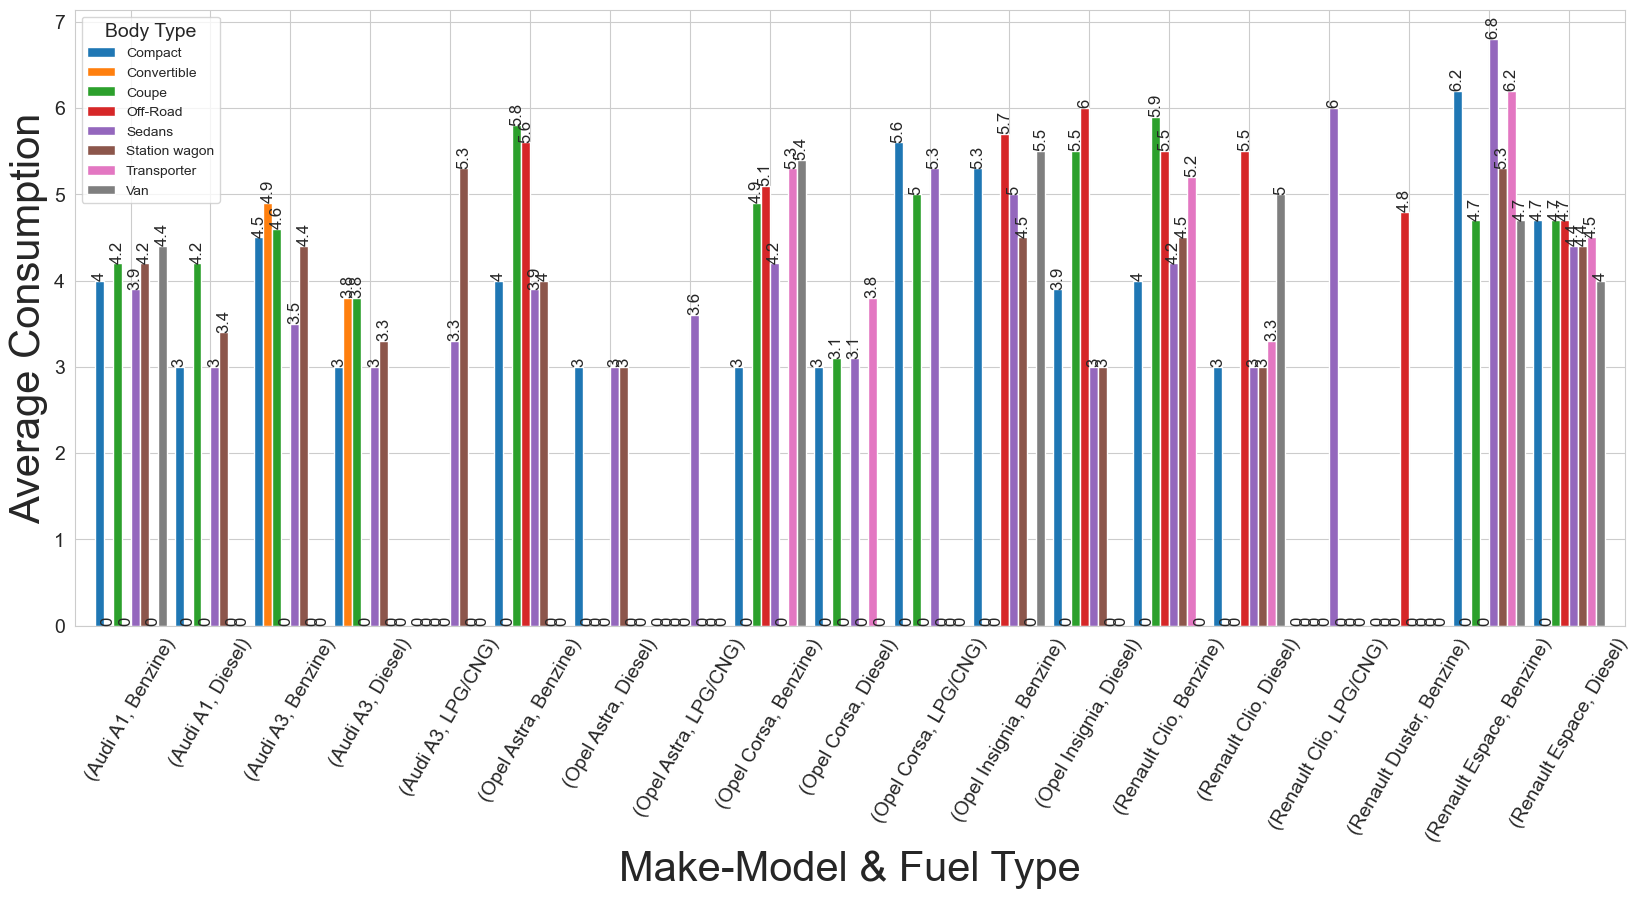

In [142]:
ax = cons.unstack(level=1).plot.bar(figsize=(20, 8), fontsize=14, width=0.9, rot=60)

for container in ax.containers:
    ax.bar_label(container, fontsize=12, rotation=90)
    
ax.set_xlabel('Make-Model & Fuel Type', fontsize=30)
ax.set_ylabel('Average Consumption', fontsize=30)
plt.legend(title="Body Type", title_fontsize=14, prop={'size': 10});

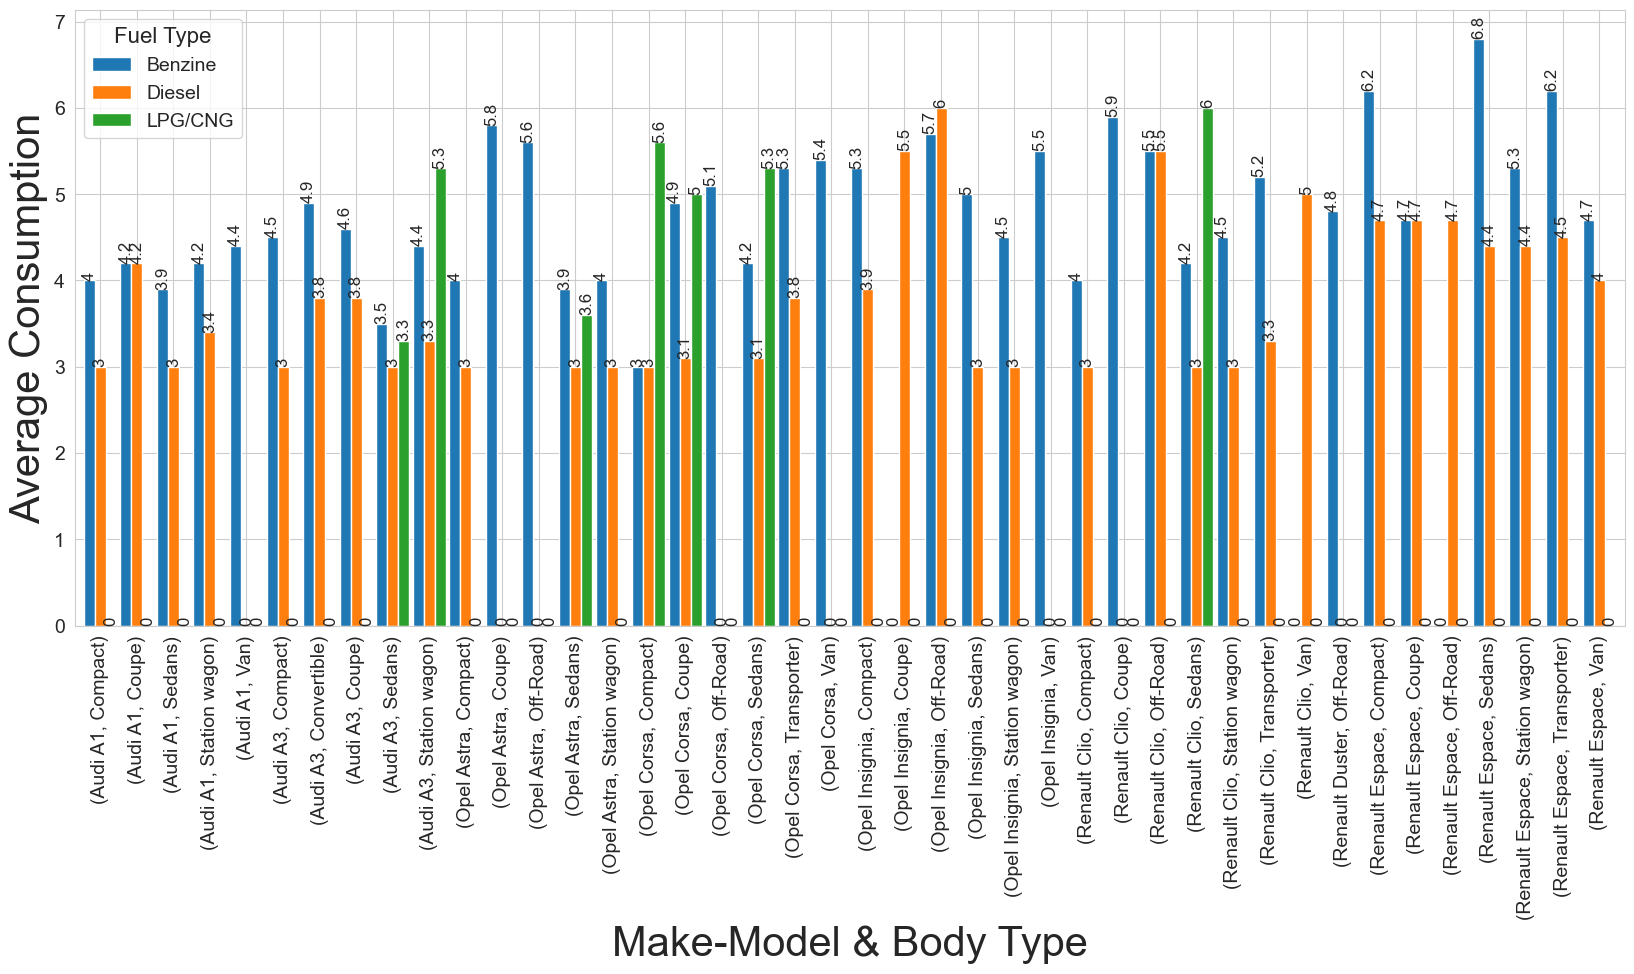

In [143]:
ax = cons.unstack(level=2).plot.bar(figsize=(20, 8), fontsize=14, width=0.9, rot=90)

for container in ax.containers:
    ax.bar_label(container, fontsize=12, rotation=90)
    
ax.set_xlabel('Make-Model & Body Type', fontsize=30)
ax.set_ylabel('Average Consumption', fontsize=30)
plt.legend(title="Fuel Type", title_fontsize=16, prop={'size': 14});

### <div class="alert alert-info"><font color=black>6. What are the lowest and highest sales prices of the vehicles according to the make & model? And find the selling price difference for each make & model group. Which vehicle group has the biggest price difference?</font></div>

In [144]:
df.groupby(["make_model"]).price.min()

make_model
Audi A1            8999
Audi A3            5555
Opel Astra         6000
Opel Corsa         4950
Opel Insignia      8290
Renault Clio       5445
Renault Duster    10850
Renault Espace    12614
Name: price, dtype: int64

In [145]:
df.groupby(["make_model"]).price.max()

make_model
Audi A1           37900
Audi A3           74600
Opel Astra        39433
Opel Corsa        18622
Opel Insignia     52120
Renault Clio      31500
Renault Duster    16033
Renault Espace    68320
Name: price, dtype: int64

In [146]:
min_max_price = df.groupby(["make_model"]).agg({'price': ['max', 'min']}).reset_index()
min_max_price

make_model  price       
                     max    min
0         Audi A1  37900   8999
1         Audi A3  74600   5555
2      Opel Astra  39433   6000
3      Opel Corsa  18622   4950
4   Opel Insignia  52120   8290
5    Renault Clio  31500   5445
6  Renault Duster  16033  10850
7  Renault Espace  68320  12614

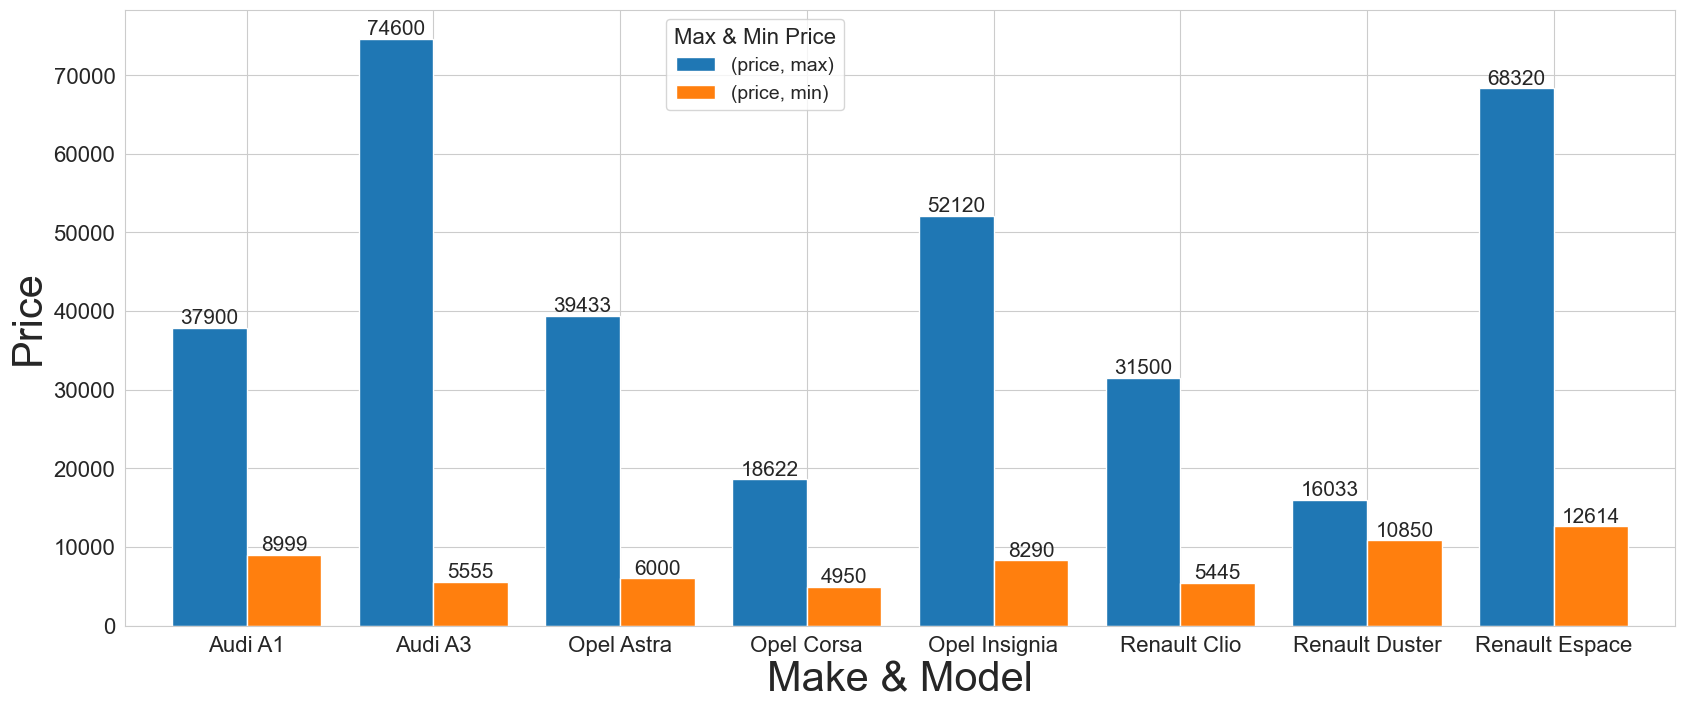

In [147]:
ax = min_max_price.plot.bar(figsize=(20, 8), fontsize=16, width=0.8, rot=0)

for container in ax.containers:
    ax.bar_label(container, fontsize=15)
    
ax.set_xticklabels(min_max_price.make_model)
ax.set_xlabel('Make & Model', fontsize=30)
ax.set_ylabel('Price', fontsize=30)
plt.legend(title="Max & Min Price", title_fontsize=16, prop={'size': 14}, bbox_to_anchor=(0.47, 1));

<div class="alert alert-success"><font color=black><b><mark>Let us also see the Price differences for each Make & Model in the plot.</b></mark> </font></div>

In [148]:
min_max_price.columns

MultiIndex([('make_model',    ''),
            (     'price', 'max'),
            (     'price', 'min')],
           )

In [149]:
min_max_price['price', 'difference'] = min_max_price['price', 'max'] - min_max_price['price', 'min']
min_max_price.sort_values(by=('price', 'difference'), ascending=False)

make_model  price                  
                     max    min difference
1         Audi A3  74600   5555      69045
7  Renault Espace  68320  12614      55706
4   Opel Insignia  52120   8290      43830
2      Opel Astra  39433   6000      33433
0         Audi A1  37900   8999      28901
5    Renault Clio  31500   5445      26055
3      Opel Corsa  18622   4950      13672
6  Renault Duster  16033  10850       5183

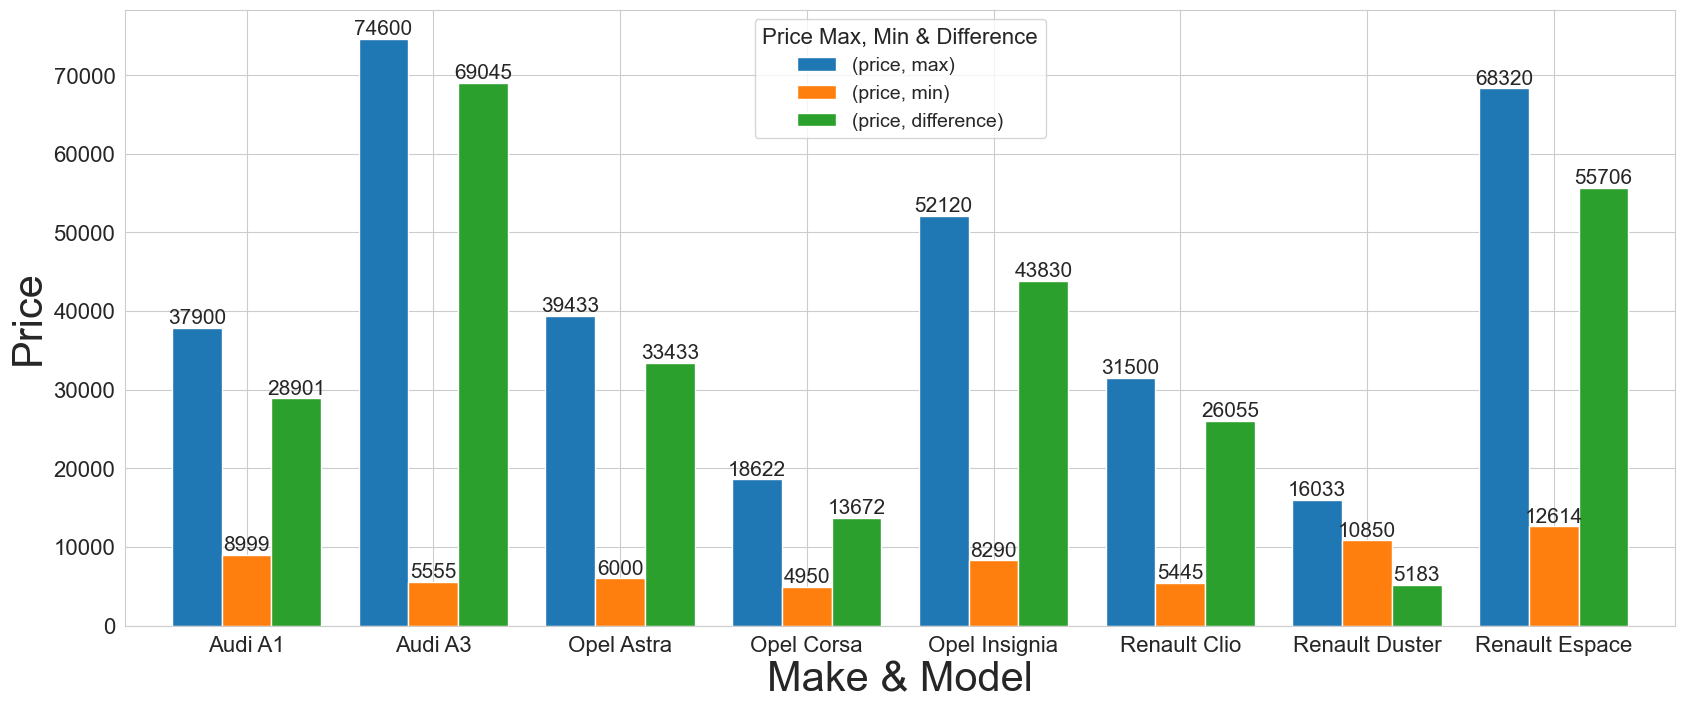

In [150]:
ax = min_max_price.plot.bar(figsize=(20, 8), fontsize=16, width=0.8, rot=0)

for container in ax.containers:
    ax.bar_label(container, fontsize=15)
    
ax.set_xticklabels(min_max_price.make_model)
ax.set_xlabel('Make & Model', fontsize=30)
ax.set_ylabel('Price', fontsize=30)
plt.legend(title="Price Max, Min & Difference", title_fontsize=16, prop={'size': 14});

### <div class="alert alert-info"><font color=black>7. What is the average selling price of vehicles whose make & model is Opel Corsa and body is sedan?</font></div>

In [151]:
df[(df["make_model"] == "Opel Corsa") & (df["body_type"] == "Sedans")].price.mean()

10217.443935926773

### <div class="alert alert-info"><font color=black>8. What are the average, minimum and maximum selling prices of vehicles by body type?</font></div>

In [152]:
df.groupby(['make_model', 'body_type']).agg({'price': ['mean', 'min', 'max']})

price              
                                  mean    min    max
make_model     body_type                            
Audi A1        Compact       19189.373   9950  31990
               Coupe         14925.000  13950  15900
               Sedans        18659.993   8999  37900
               Station wagon 17811.381  12950  28999
               Van           29000.000  29000  29000
Audi A3        Compact       18991.735  12900  67600
               Convertible   27905.375  10893  56100
               Coupe         17745.000  16990  19000
               Sedans        21132.447  10550  74600
               Station wagon 20684.355   5555  63900
Opel Astra     Compact       16199.762   8450  39433
               Coupe         22240.000  14490  29990
               Off-Road      18590.000  18590  18590
               Sedans        15963.179   6500  32950
               Station wagon 15676.677   6000  34900
Opel Corsa     Compact       11674.339   4990  18622
               Coupe          8772.308   6900  11100
               Off-Road       8166.667   7900   8700
               Sedans        10217.444   4950  18490
               Transporter    7650.000   5250  10500
               Van            7900.000   7900   7900
Opel Insignia  Compact       28590.074  10350  49884
               Coupe         17094.000  17094  17094
               Off-Road      29451.286  12750  34776
               Sedans        21263.470   8600  49350
               Station wagon 21425.247   8290  52120
               Van           20980.000  20980  20980
Renault Clio   Compact       12649.634   5800  29740
               Coupe         17990.000  17990  17990
               Off-Road      12845.000   7700  17990
               Sedans        11971.913   5445  31500
               Station wagon 11126.861   5900  20800
               Transporter    8490.172   5900  10798
               Van            9650.000   9400   9900
Renault Duster Off-Road      13230.176  10850  16033
Renault Espace Compact       30046.667  17900  43000
               Coupe         30567.000  26994  34140
               Off-Road      25762.500  14900  32900
               Sedans        30052.429  18999  48498
               Station wagon 27314.659  16900  52990
               Transporter   22606.481  14999  32700
               Van           30912.089  12614  68320

### <div class="alert alert-info"><font color=black>9. What is the brand of the vehicles whose sales price is between 5000 and 10000 Euros (inclusive)?</font></div>

In [153]:
df[(df.price >= 5000) & (df.price <= 10000)]["make_model"].unique()

array(['Audi A1', 'Audi A3', 'Opel Astra', 'Opel Corsa', 'Opel Insignia',
       'Renault Clio'], dtype=object)

### <div class="alert alert-info"><font color=black>10. What is the most common paint type among the vehicles for sale whose make & model is Audi A3 and body is Sedan?</font></div>

In [154]:
df[(df["make_model"] == "Audi A3") & (df["body_type"] == "Sedans")].paint_type.mode()

0    Metallic
Name: paint_type, dtype: object

## <div class="alert alert-danger"><font color=black>8. <u>Saving the Final Data as "not_dummy.csv" Format :</u></font></div>

In [155]:
df.to_csv("final_auto_scout_not_dummy.csv", index=False)

In [156]:
df = pd.read_csv("final_auto_scout_not_dummy.csv")

In [157]:
df.head().T

0  \
make_model                                                        Audi A1   
body_type                                                          Sedans   
price                                                               15770   
km                                                              56013.000   
hp_kW                                                              66.000   
type                                                                 Used   
previous_owners                                                     2.000   
inspection_new                                                          1   
paint_type                                                       Metallic   
gearing_type                                                    Automatic   
drive_chain                                                         front   
fuel                                                               Diesel   
CO2_emission                                                       99.000   
comfort_and_convenience                                           Premium   
entertainment_and_media                                           Premium   
extras                   Alloy wheels, Catalytic Converter, Voice Control   
safety_and_security                                Safety Premium Package   
gears                                                               7.000   
age                                                                 3.000   
upholstery_type                                                     Cloth   
displacement_cc                                                  1422.000   
weight_kg                                                        1220.000   
cons_comb                                                           3.800   

                                                                         1  \
make_model                                                         Audi A1   
body_type                                                           Sedans   
price                                                                14500   
km                                                               80000.000   
hp_kW                                                              141.000   
type                                                                  Used   
previous_owners                                                      1.000   
inspection_new                                                           0   
paint_type                                                        Metallic   
gearing_type                                                     Automatic   
drive_chain                                                          front   
fuel                                                               Benzine   
CO2_emission                                                       129.000   
comfort_and_convenience                                           Standard   
entertainment_and_media                                            Premium   
extras                   Alloy wheels, Sport seats, Sport suspension, V...   
safety_and_security                                 Safety Premium Package   
gears                                                                7.000   
age                                                                  2.000   
upholstery_type                                                      Cloth   
displacement_cc                                                   1798.000   
weight_kg                                                         1255.000   
cons_comb                                                            5.600   

                                                   2  \
make_model                                   Audi A1   
body_type                                     Sedans   
price                                          14640   
km                                         83450.000   
hp_kW                                         85.000   
type          

# <div class="alert alert-danger"><center><font color=black>The End of Handling with Outliers (Part - 03)</center></div>

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; ">Dummy Operation</p>

A typical data scientist spends 70 – 80% of his time cleaning and preparing the data. And converting categorical data is an unavoidable activity. It not only elevates the model quality but also helps in better feature engineering.

**What is a dummy variable?** 

A dummy variable is a variable that takes values of 0 and 1, where the values indicate the presence or absence of something (e.g., a 0 may indicate a placebo and 1 may indicate a drug). Where a categorical variable has more than two categories, it can be represented by a set of dummy variables, with one variable for each category. Dummy variables are also known as indicator variables, design variables, contrasts, one-hot coding, and binary basis variables. Dummy data is kind a safety mechanism for data integrity.

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15909 entries, 0 to 15908
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   make_model               15909 non-null  object 
 1   body_type                15909 non-null  object 
 2   price                    15909 non-null  int64  
 3   km                       15909 non-null  float64
 4   hp_kW                    15909 non-null  float64
 5   type                     15909 non-null  object 
 6   previous_owners          15909 non-null  float64
 7   inspection_new           15909 non-null  int64  
 8   paint_type               15909 non-null  object 
 9   gearing_type             15909 non-null  object 
 10  drive_chain              15909 non-null  object 
 11  fuel                     15909 non-null  object 
 12  CO2_emission             15909 non-null  float64
 13  comfort_and_convenience  15909 non-null  object 
 14  entertainment_and_medi

In [159]:
df.shape

(15909, 23)

## Aproach 1: Using factorize() method for some categorical features:

Pandas is the best python module for manipulating dataframes. It has many useful functions. The pandas ``factorize()`` method is one of them. So what does it do? It finds out the uniques values in the array and returns it as a numerical value. This method is useful for obtaining a numeric representation of an array when all that matters is identifying distinct values.

**Let us examine how Pandas factorize() method works on our DataFrame:**

In [160]:
# Encoding the object as an enumerated type or categorical variable.

pd.factorize(df["make_model"])

(array([0, 0, 0, ..., 7, 7, 7], dtype=int64),
 Index(['Audi A1', 'Audi A3', 'Opel Astra', 'Opel Corsa', 'Opel Insignia',
        'Renault Clio', 'Renault Duster', 'Renault Espace'],
       dtype='object'))

In [161]:
df["make_model"].apply(lambda x: pd.factorize(x))

0                       ([0, 0, 0, 0, 0, 0, 0], [Audi A1])
1                       ([0, 0, 0, 0, 0, 0, 0], [Audi A1])
2                       ([0, 0, 0, 0, 0, 0, 0], [Audi A1])
3                       ([0, 0, 0, 0, 0, 0, 0], [Audi A1])
4                       ([0, 0, 0, 0, 0, 0, 0], [Audi A1])
                               ...                        
15904    ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...
15905    ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...
15906    ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...
15907    ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...
15908    ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...
Name: make_model, Length: 15909, dtype: object

In [162]:
df["make_model"].apply(lambda x: pd.factorize(x)[0])

0                             [0, 0, 0, 0, 0, 0, 0]
1                             [0, 0, 0, 0, 0, 0, 0]
2                             [0, 0, 0, 0, 0, 0, 0]
3                             [0, 0, 0, 0, 0, 0, 0]
4                             [0, 0, 0, 0, 0, 0, 0]
                            ...                    
15904    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
15905    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
15906    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
15907    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
15908    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Name: make_model, Length: 15909, dtype: object

In [163]:
# Encoding all categorical variable (except for "Extras", , "Comfort_Convenience_Package", "Entertainment_Media_Package", 
# "Safety_Security_Package") in our DataFrame.

df[["make_model_ordinal", "body_type_ordinal", "type_ordinal", "fuel_ordinal", "paint_type_ordinal",\
    "upholstery_type_ordinal", "gearing_type_ordinal"]] = df[["make_model", "body_type", "type", "fuel", "paint_type",\
                                                              "upholstery_type", "gearing_type"]].apply\
(lambda x: pd.factorize(x)[0])

In [164]:
df.head().T

0  \
make_model                                                        Audi A1   
body_type                                                          Sedans   
price                                                               15770   
km                                                              56013.000   
hp_kW                                                              66.000   
type                                                                 Used   
previous_owners                                                     2.000   
inspection_new                                                          1   
paint_type                                                       Metallic   
gearing_type                                                    Automatic   
drive_chain                                                         front   
fuel                                                               Diesel   
CO2_emission                                                       99.000   
comfort_and_convenience                                           Premium   
entertainment_and_media                                           Premium   
extras                   Alloy wheels, Catalytic Converter, Voice Control   
safety_and_security                                Safety Premium Package   
gears                                                               7.000   
age                                                                 3.000   
upholstery_type                                                     Cloth   
displacement_cc                                                  1422.000   
weight_kg                                                        1220.000   
cons_comb                                                           3.800   
make_model_ordinal                                                      0   
body_type_ordinal                                                       0   
type_ordinal                                                            0   
fuel_ordinal                                                            0   
paint_type_ordinal                                                      0   
upholstery_type_ordinal                                                 0   
gearing_type_ordinal                                                    0   

                                                                         1  \
make_model                                                         Audi A1   
body_type                                                           Sedans   
price                                                                14500   
km                                                               80000.000   
hp_kW                                                              141.000   
type                                                                  Used   
previous_owners                                                      1.000   
inspection_new                                                           0   
paint_type                                                        Metallic   
gearing_type                                                     Automatic   
drive_chain                                                          front   
fuel                                                               Benzine   
CO2_emission                                                       129.000   
comfort_and_convenience                                           Standard   
entertainment_and_media                                            Premium   
extras                   Alloy wheels, Sport seats, Sport suspension, V...   
safety_and_security                                 Safety Premium Package   
gears                                                                7.000   
age                                                                  2.000   
upholstery_type                                                      Cloth   
displacement_cc                               

In [165]:
make_model_ordinal = df.pop("make_model_ordinal")
df.insert(1, 'make_model_ordinal', make_model_ordinal)

In [166]:
df.head().T

0  \
make_model                                                        Audi A1   
make_model_ordinal                                                      0   
body_type                                                          Sedans   
price                                                               15770   
km                                                              56013.000   
hp_kW                                                              66.000   
type                                                                 Used   
previous_owners                                                     2.000   
inspection_new                                                          1   
paint_type                                                       Metallic   
gearing_type                                                    Automatic   
drive_chain                                                         front   
fuel                                                               Diesel   
CO2_emission                                                       99.000   
comfort_and_convenience                                           Premium   
entertainment_and_media                                           Premium   
extras                   Alloy wheels, Catalytic Converter, Voice Control   
safety_and_security                                Safety Premium Package   
gears                                                               7.000   
age                                                                 3.000   
upholstery_type                                                     Cloth   
displacement_cc                                                  1422.000   
weight_kg                                                        1220.000   
cons_comb                                                           3.800   
body_type_ordinal                                                       0   
type_ordinal                                                            0   
fuel_ordinal                                                            0   
paint_type_ordinal                                                      0   
upholstery_type_ordinal                                                 0   
gearing_type_ordinal                                                    0   

                                                                         1  \
make_model                                                         Audi A1   
make_model_ordinal                                                       0   
body_type                                                           Sedans   
price                                                                14500   
km                                                               80000.000   
hp_kW                                                              141.000   
type                                                                  Used   
previous_owners                                                      1.000   
inspection_new                                                           0   
paint_type                                                        Metallic   
gearing_type                                                     Automatic   
drive_chain                                                          front   
fuel                                                               Benzine   
CO2_emission                                                       129.000   
comfort_and_convenience                                           Standard   
entertainment_and_media                                            Premium   
extras                   Alloy wheels, Sport seats, Sport suspension, V...   
safety_and_security                                 Safety Premium Package   
gears                                                                7.000   
age                                                                  2.000   
upholstery_type                               

**Since this is the first time, let us check how factorize() method made changes on the DataFrame:** 

In [167]:
df["make_model"].unique()

array(['Audi A1', 'Audi A3', 'Opel Astra', 'Opel Corsa', 'Opel Insignia',
       'Renault Clio', 'Renault Duster', 'Renault Espace'], dtype=object)

In [168]:
display(df[df["make_model"] == "Audi A1"][["make_model", "make_model_ordinal"]].sample(5))
display(df[df["make_model"] == "Audi A3"][["make_model", "make_model_ordinal"]].sample(5))
display(df[df["make_model"] == "Opel Astra"][["make_model", "make_model_ordinal"]].sample(5))
display(df[df["make_model"] == "Opel Corsa"][["make_model", "make_model_ordinal"]].sample(5))
display(df[df["make_model"] == "Opel Insignia"][["make_model", "make_model_ordinal"]].sample(5))
display(df[df["make_model"] == "Renault Clio"][["make_model", "make_model_ordinal"]].sample(5))
display(df[df["make_model"] == "Renault Duster"][["make_model", "make_model_ordinal"]].sample(5))
display(df[df["make_model"] == "Renault Espace"][["make_model", "make_model_ordinal"]].sample(5))

make_model  make_model_ordinal
2390    Audi A1                   0
1426    Audi A1                   0
394     Audi A1                   0
176     Audi A1                   0
2230    Audi A1                   0

make_model  make_model_ordinal
2685    Audi A3                   1
2842    Audi A3                   1
3735    Audi A3                   1
4889    Audi A3                   1
3533    Audi A3                   1

make_model  make_model_ordinal
7896  Opel Astra                   2
6020  Opel Astra                   2
7002  Opel Astra                   2
7138  Opel Astra                   2
7390  Opel Astra                   2

make_model  make_model_ordinal
8946  Opel Corsa                   3
9895  Opel Corsa                   3
8490  Opel Corsa                   3
9593  Opel Corsa                   3
9093  Opel Corsa                   3

make_model  make_model_ordinal
12316  Opel Insignia                   4
12096  Opel Insignia                   4
11042  Opel Insignia                   4
11597  Opel Insignia                   4
11116  Opel Insignia                   4

make_model  make_model_ordinal
13784  Renault Clio                   5
14100  Renault Clio                   5
14031  Renault Clio                   5
13165  Renault Clio                   5
13368  Renault Clio                   5

make_model  make_model_ordinal
14900  Renault Duster                   6
14903  Renault Duster                   6
14905  Renault Duster                   6
14897  Renault Duster                   6
14911  Renault Duster                   6

make_model  make_model_ordinal
15154  Renault Espace                   7
15112  Renault Espace                   7
15668  Renault Espace                   7
15104  Renault Espace                   7
15302  Renault Espace                   7

**It's time to change the location of all features factorized:**

In [169]:
df.columns

Index(['make_model', 'make_model_ordinal', 'body_type', 'price', 'km', 'hp_kW',
       'type', 'previous_owners', 'inspection_new', 'paint_type',
       'gearing_type', 'drive_chain', 'fuel', 'CO2_emission',
       'comfort_and_convenience', 'entertainment_and_media', 'extras',
       'safety_and_security', 'gears', 'age', 'upholstery_type',
       'displacement_cc', 'weight_kg', 'cons_comb', 'body_type_ordinal',
       'type_ordinal', 'fuel_ordinal', 'paint_type_ordinal',
       'upholstery_type_ordinal', 'gearing_type_ordinal'],
      dtype='object')

In [170]:
# list_of_ordinal_features = ["body_type_ordinal", "type_ordinal", "fuel_ordinal", "paint_type_ordinal",
# "upholstery_type_ordinal", "gearing_type_ordinal", "drive_chain_ordinal", "comfort_convenience_package_ordinal", 
# "entertainment_media_package_ordinal", "safety_security_package_ordinal"]

# pop() method works for a single column and returns a Series

body_type_ordinal = df.pop("body_type_ordinal")
type_ordinal = df.pop("type_ordinal")
fuel_ordinal = df.pop("fuel_ordinal")
paint_type_ordinal = df.pop("paint_type_ordinal")
upholstery_type_ordinal = df.pop("upholstery_type_ordinal")
gearing_type_ordinal = df.pop("gearing_type_ordinal")
# drive_chain_ordinal = df.pop("drive_chain_ordinal")

# Let's insert the columns we have popped

df.insert(3, "body_type_ordinal", body_type_ordinal)
df.insert(8, "type_ordinal", type_ordinal)
df.insert( 15, "fuel_ordinal", fuel_ordinal)
df.insert(12, "paint_type_ordinal", paint_type_ordinal)
df.insert(25, "upholstery_type_ordinal", upholstery_type_ordinal)
df.insert(14, "gearing_type_ordinal", gearing_type_ordinal)
# df.insert(25, "drive_chain_ordinal", drive_chain_ordinal)

In [171]:
df.head().T

0  \
make_model                                                        Audi A1   
make_model_ordinal                                                      0   
body_type                                                          Sedans   
body_type_ordinal                                                       0   
price                                                               15770   
km                                                              56013.000   
hp_kW                                                              66.000   
type                                                                 Used   
type_ordinal                                                            0   
previous_owners                                                     2.000   
inspection_new                                                          1   
paint_type                                                       Metallic   
paint_type_ordinal                                                      0   
gearing_type                                                    Automatic   
gearing_type_ordinal                                                    0   
drive_chain                                                         front   
fuel                                                               Diesel   
fuel_ordinal                                                            0   
CO2_emission                                                       99.000   
comfort_and_convenience                                           Premium   
entertainment_and_media                                           Premium   
extras                   Alloy wheels, Catalytic Converter, Voice Control   
safety_and_security                                Safety Premium Package   
gears                                                               7.000   
age                                                                 3.000   
upholstery_type                                                     Cloth   
upholstery_type_ordinal                                                 0   
displacement_cc                                                  1422.000   
weight_kg                                                        1220.000   
cons_comb                                                           3.800   

                                                                         1  \
make_model                                                         Audi A1   
make_model_ordinal                                                       0   
body_type                                                           Sedans   
body_type_ordinal                                                        0   
price                                                                14500   
km                                                               80000.000   
hp_kW                                                              141.000   
type                                                                  Used   
type_ordinal                                                             0   
previous_owners                                                      1.000   
inspection_new                                                           0   
paint_type                                                        Metallic   
paint_type_ordinal                                                       0   
gearing_type                                                     Automatic   
gearing_type_ordinal                                                     0   
drive_chain                                                          front   
fuel                                                               Benzine   
fuel_ordinal                                                             1   
CO2_emission                                                       129.000   
comfort_and_convenience                                           Standard   
entertainment_and_media                       

**Let us drop unnecassary features from our DataFrame.**

In [172]:
df.columns

Index(['make_model', 'make_model_ordinal', 'body_type', 'body_type_ordinal',
       'price', 'km', 'hp_kW', 'type', 'type_ordinal', 'previous_owners',
       'inspection_new', 'paint_type', 'paint_type_ordinal', 'gearing_type',
       'gearing_type_ordinal', 'drive_chain', 'fuel', 'fuel_ordinal',
       'CO2_emission', 'comfort_and_convenience', 'entertainment_and_media',
       'extras', 'safety_and_security', 'gears', 'age', 'upholstery_type',
       'upholstery_type_ordinal', 'displacement_cc', 'weight_kg', 'cons_comb'],
      dtype='object')

In [173]:
df.drop(['make_model', 'body_type', 'type', 'fuel', 'paint_type', 'upholstery_type', 'gearing_type'], 
        axis=1, inplace=True)

In [174]:
df.head().T

0  \
make_model_ordinal                                                      0   
body_type_ordinal                                                       0   
price                                                               15770   
km                                                              56013.000   
hp_kW                                                              66.000   
type_ordinal                                                            0   
previous_owners                                                     2.000   
inspection_new                                                          1   
paint_type_ordinal                                                      0   
gearing_type_ordinal                                                    0   
drive_chain                                                         front   
fuel_ordinal                                                            0   
CO2_emission                                                       99.000   
comfort_and_convenience                                           Premium   
entertainment_and_media                                           Premium   
extras                   Alloy wheels, Catalytic Converter, Voice Control   
safety_and_security                                Safety Premium Package   
gears                                                               7.000   
age                                                                 3.000   
upholstery_type_ordinal                                                 0   
displacement_cc                                                  1422.000   
weight_kg                                                        1220.000   
cons_comb                                                           3.800   

                                                                         1  \
make_model_ordinal                                                       0   
body_type_ordinal                                                        0   
price                                                                14500   
km                                                               80000.000   
hp_kW                                                              141.000   
type_ordinal                                                             0   
previous_owners                                                      1.000   
inspection_new                                                           0   
paint_type_ordinal                                                       0   
gearing_type_ordinal                                                     0   
drive_chain                                                          front   
fuel_ordinal                                                             1   
CO2_emission                                                       129.000   
comfort_and_convenience                                           Standard   
entertainment_and_media                                            Premium   
extras                   Alloy wheels, Sport seats, Sport suspension, V...   
safety_and_security                                 Safety Premium Package   
gears                                                                7.000   
age                                                                  2.000   
upholstery_type_ordinal                                                  0   
displacement_cc                                                   1798.000   
weight_kg                                                         1255.000   
cons_comb                                                            5.600   

                                                   2  \
make_model_ordinal                                 0   
body_type_ordinal                                  0   
price                                          14640   
km                                         83450.000   
hp_kW                                         85.000   
type_ordinal  

In [175]:
df.dtypes

make_model_ordinal           int64
body_type_ordinal            int64
price                        int64
km                         float64
hp_kW                      float64
type_ordinal                 int64
previous_owners            float64
inspection_new               int64
paint_type_ordinal           int64
gearing_type_ordinal         int64
drive_chain                 object
fuel_ordinal                 int64
CO2_emission               float64
comfort_and_convenience     object
entertainment_and_media     object
extras                      object
safety_and_security         object
gears                      float64
age                        float64
upholstery_type_ordinal      int64
displacement_cc            float64
weight_kg                  float64
cons_comb                  float64
dtype: object

In [176]:
# from termcolor import colored

# for column in df.columns:
#     print(colored("****"*10, "green"))
#     print(colored(f"Column Name: {column}", "blue"))
#     print(df[column].value_counts(dropna=False))

## Aproach 2: Using ``count()`` method for "extras" feature

In [177]:
df.extras

0         Alloy wheels, Catalytic Converter, Voice Control
1        Alloy wheels, Sport seats, Sport suspension, V...
2                              Alloy wheels, Voice Control
3                 Alloy wheels, Sport seats, Voice Control
4        Alloy wheels, Sport package, Sport suspension,...
                               ...                        
15904                           Alloy wheels, Touch screen
15905            Alloy wheels, Touch screen, Voice Control
15906                                         Alloy wheels
15907                           Alloy wheels, Touch screen
15908                           Alloy wheels, Touch screen
Name: extras, Length: 15909, dtype: object

In [178]:
df.extras.str.count(",")

0        2
1        3
2        1
3        2
4        3
        ..
15904    1
15905    2
15906    0
15907    1
15908    1
Name: extras, Length: 15909, dtype: int64

In [179]:
df.extras.str.count(",").add(1)

0        3
1        4
2        2
3        3
4        4
        ..
15904    2
15905    3
15906    1
15907    2
15908    2
Name: extras, Length: 15909, dtype: int64

In [180]:
df["extras"].apply(lambda x: x.count(",")).add(1)

0        3
1        4
2        2
3        3
4        4
        ..
15904    2
15905    3
15906    1
15907    2
15908    2
Name: extras, Length: 15909, dtype: int64

In [181]:
df["num_of_extras"] = df["extras"].apply(lambda x: x.count(",")).add(1)

In [182]:
df.head().T

0  \
make_model_ordinal                                                      0   
body_type_ordinal                                                       0   
price                                                               15770   
km                                                              56013.000   
hp_kW                                                              66.000   
type_ordinal                                                            0   
previous_owners                                                     2.000   
inspection_new                                                          1   
paint_type_ordinal                                                      0   
gearing_type_ordinal                                                    0   
drive_chain                                                         front   
fuel_ordinal                                                            0   
CO2_emission                                                       99.000   
comfort_and_convenience                                           Premium   
entertainment_and_media                                           Premium   
extras                   Alloy wheels, Catalytic Converter, Voice Control   
safety_and_security                                Safety Premium Package   
gears                                                               7.000   
age                                                                 3.000   
upholstery_type_ordinal                                                 0   
displacement_cc                                                  1422.000   
weight_kg                                                        1220.000   
cons_comb                                                           3.800   
num_of_extras                                                           3   

                                                                         1  \
make_model_ordinal                                                       0   
body_type_ordinal                                                        0   
price                                                                14500   
km                                                               80000.000   
hp_kW                                                              141.000   
type_ordinal                                                             0   
previous_owners                                                      1.000   
inspection_new                                                           0   
paint_type_ordinal                                                       0   
gearing_type_ordinal                                                     0   
drive_chain                                                          front   
fuel_ordinal                                                             1   
CO2_emission                                                       129.000   
comfort_and_convenience                                           Standard   
entertainment_and_media                                            Premium   
extras                   Alloy wheels, Sport seats, Sport suspension, V...   
safety_and_security                                 Safety Premium Package   
gears                                                                7.000   
age                                                                  2.000   
upholstery_type_ordinal                                                  0   
displacement_cc                                                   1798.000   
weight_kg                                                         1255.000   
cons_comb                                                            5.600   
num_of_extras                                                            4   

                                                   2  \
make_model_ordinal                                 0   
body_type_ordinal                                  0   
price                      

In [183]:
df.drop("extras", axis=1, inplace=True)

In [184]:
df.head().T

0                       1  \
make_model_ordinal                            0                       0   
body_type_ordinal                             0                       0   
price                                     15770                   14500   
km                                    56013.000               80000.000   
hp_kW                                    66.000                 141.000   
type_ordinal                                  0                       0   
previous_owners                           2.000                   1.000   
inspection_new                                1                       0   
paint_type_ordinal                            0                       0   
gearing_type_ordinal                          0                       0   
drive_chain                               front                   front   
fuel_ordinal                                  0                       1   
CO2_emission                             99.000                 129.000   
comfort_and_convenience                 Premium                Standard   
entertainment_and_media                 Premium                 Premium   
safety_and_security      Safety Premium Package  Safety Premium Package   
gears                                     7.000                   7.000   
age                                       3.000                   2.000   
upholstery_type_ordinal                       0                       0   
displacement_cc                        1422.000                1798.000   
weight_kg                              1220.000                1255.000   
cons_comb                                 3.800                   5.600   
num_of_extras                                 3                       4   

                                              2                       3  \
make_model_ordinal                            0                       0   
body_type_ordinal                             0                       0   
price                                     14640                   14500   
km                                    83450.000               73000.000   
hp_kW                                    85.000                  66.000   
type_ordinal                                  0                       0   
previous_owners                           1.000                   1.000   
inspection_new                                0                       0   
paint_type_ordinal                            0                       0   
gearing_type_ordinal                          0                       0   
drive_chain                               front                   front   
fuel_ordinal                                  0                       0   
CO2_emission                             99.000                  99.000   
comfort_and_convenience                 Premium                Standard   
entertainment_and_media                Standard                 Premium   
safety_and_security      Safety Premium Package  Safety Premium Package   
gears                                     7.000                   6.000   
age                                       3.000                   3.000   
upholstery_type_ordinal                       0                       0   
displacement_cc                        1598.000                1422.000   
weight_kg                              1135.000                1195.000   
cons_comb                                 3.800                   3.800   
num_of_extras                                 2                       3   

                                              4  
make_model_ordinal                            0  
body_type_ordinal                             0  
price                                     16790  
km                                    16200.000  
hp_kW                                    66.000  
type_ordinal                                  0  
previous_owners                           1.000  
inspection_new                              

In [185]:
df.dtypes

make_model_ordinal           int64
body_type_ordinal            int64
price                        int64
km                         float64
hp_kW                      float64
type_ordinal                 int64
previous_owners            float64
inspection_new               int64
paint_type_ordinal           int64
gearing_type_ordinal         int64
drive_chain                 object
fuel_ordinal                 int64
CO2_emission               float64
comfort_and_convenience     object
entertainment_and_media     object
safety_and_security         object
gears                      float64
age                        float64
upholstery_type_ordinal      int64
displacement_cc            float64
weight_kg                  float64
cons_comb                  float64
num_of_extras                int64
dtype: object

## Aproach 3: Using ``map()`` for 'drive_chain' feature

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15909 entries, 0 to 15908
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   make_model_ordinal       15909 non-null  int64  
 1   body_type_ordinal        15909 non-null  int64  
 2   price                    15909 non-null  int64  
 3   km                       15909 non-null  float64
 4   hp_kW                    15909 non-null  float64
 5   type_ordinal             15909 non-null  int64  
 6   previous_owners          15909 non-null  float64
 7   inspection_new           15909 non-null  int64  
 8   paint_type_ordinal       15909 non-null  int64  
 9   gearing_type_ordinal     15909 non-null  int64  
 10  drive_chain              15909 non-null  object 
 11  fuel_ordinal             15909 non-null  int64  
 12  CO2_emission             15909 non-null  float64
 13  comfort_and_convenience  15909 non-null  object 
 14  entertainment_and_medi

In [187]:
df["drive_chain"].value_counts()

front    15701
4WD        204
rear         4
Name: drive_chain, dtype: int64

In [188]:
df["drive_chain"] = df["drive_chain"].map({"rear":0, "4WD":1, "front":2})

In [189]:
df.head().T

0                       1  \
make_model_ordinal                            0                       0   
body_type_ordinal                             0                       0   
price                                     15770                   14500   
km                                    56013.000               80000.000   
hp_kW                                    66.000                 141.000   
type_ordinal                                  0                       0   
previous_owners                           2.000                   1.000   
inspection_new                                1                       0   
paint_type_ordinal                            0                       0   
gearing_type_ordinal                          0                       0   
drive_chain                                   2                       2   
fuel_ordinal                                  0                       1   
CO2_emission                             99.000                 129.000   
comfort_and_convenience                 Premium                Standard   
entertainment_and_media                 Premium                 Premium   
safety_and_security      Safety Premium Package  Safety Premium Package   
gears                                     7.000                   7.000   
age                                       3.000                   2.000   
upholstery_type_ordinal                       0                       0   
displacement_cc                        1422.000                1798.000   
weight_kg                              1220.000                1255.000   
cons_comb                                 3.800                   5.600   
num_of_extras                                 3                       4   

                                              2                       3  \
make_model_ordinal                            0                       0   
body_type_ordinal                             0                       0   
price                                     14640                   14500   
km                                    83450.000               73000.000   
hp_kW                                    85.000                  66.000   
type_ordinal                                  0                       0   
previous_owners                           1.000                   1.000   
inspection_new                                0                       0   
paint_type_ordinal                            0                       0   
gearing_type_ordinal                          0                       0   
drive_chain                                   2                       2   
fuel_ordinal                                  0                       0   
CO2_emission                             99.000                  99.000   
comfort_and_convenience                 Premium                Standard   
entertainment_and_media                Standard                 Premium   
safety_and_security      Safety Premium Package  Safety Premium Package   
gears                                     7.000                   6.000   
age                                       3.000                   3.000   
upholstery_type_ordinal                       0                       0   
displacement_cc                        1598.000                1422.000   
weight_kg                              1135.000                1195.000   
cons_comb                                 3.800                   3.800   
num_of_extras                                 2                       3   

                                              4  
make_model_ordinal                            0  
body_type_ordinal                             0  
price                                     16790  
km                                    16200.000  
hp_kW                                    66.000  
type_ordinal                                  0  
previous_owners                           1.000  
inspection_new                              

In [190]:
df.dtypes

make_model_ordinal           int64
body_type_ordinal            int64
price                        int64
km                         float64
hp_kW                      float64
type_ordinal                 int64
previous_owners            float64
inspection_new               int64
paint_type_ordinal           int64
gearing_type_ordinal         int64
drive_chain                  int64
fuel_ordinal                 int64
CO2_emission               float64
comfort_and_convenience     object
entertainment_and_media     object
safety_and_security         object
gears                      float64
age                        float64
upholstery_type_ordinal      int64
displacement_cc            float64
weight_kg                  float64
cons_comb                  float64
num_of_extras                int64
dtype: object

## Aproach 4: Using ``cat.codes`` for 'comfort_convenience_package' feature

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15909 entries, 0 to 15908
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   make_model_ordinal       15909 non-null  int64  
 1   body_type_ordinal        15909 non-null  int64  
 2   price                    15909 non-null  int64  
 3   km                       15909 non-null  float64
 4   hp_kW                    15909 non-null  float64
 5   type_ordinal             15909 non-null  int64  
 6   previous_owners          15909 non-null  float64
 7   inspection_new           15909 non-null  int64  
 8   paint_type_ordinal       15909 non-null  int64  
 9   gearing_type_ordinal     15909 non-null  int64  
 10  drive_chain              15909 non-null  int64  
 11  fuel_ordinal             15909 non-null  int64  
 12  CO2_emission             15909 non-null  float64
 13  comfort_and_convenience  15909 non-null  object 
 14  entertainment_and_medi

In [192]:
df["comfort_and_convenience"].value_counts()

Standard        10778
Premium          5043
Premium Plus       88
Name: comfort_and_convenience, dtype: int64

In [193]:
df["comfort_and_convenience"] = df["comfort_and_convenience"].astype("category")
df.dtypes

make_model_ordinal            int64
body_type_ordinal             int64
price                         int64
km                          float64
hp_kW                       float64
type_ordinal                  int64
previous_owners             float64
inspection_new                int64
paint_type_ordinal            int64
gearing_type_ordinal          int64
drive_chain                   int64
fuel_ordinal                  int64
CO2_emission                float64
comfort_and_convenience    category
entertainment_and_media      object
safety_and_security          object
gears                       float64
age                         float64
upholstery_type_ordinal       int64
displacement_cc             float64
weight_kg                   float64
cons_comb                   float64
num_of_extras                 int64
dtype: object

In [194]:
# We can access the codes of the categories by running df["comfort_and_convenience"].cat.codes

df["comfort_and_convenience"] = df["comfort_and_convenience"].cat.codes

df.head().T

0                       1  \
make_model_ordinal                            0                       0   
body_type_ordinal                             0                       0   
price                                     15770                   14500   
km                                    56013.000               80000.000   
hp_kW                                    66.000                 141.000   
type_ordinal                                  0                       0   
previous_owners                           2.000                   1.000   
inspection_new                                1                       0   
paint_type_ordinal                            0                       0   
gearing_type_ordinal                          0                       0   
drive_chain                                   2                       2   
fuel_ordinal                                  0                       1   
CO2_emission                             99.000                 129.000   
comfort_and_convenience                       0                       2   
entertainment_and_media                 Premium                 Premium   
safety_and_security      Safety Premium Package  Safety Premium Package   
gears                                     7.000                   7.000   
age                                       3.000                   2.000   
upholstery_type_ordinal                       0                       0   
displacement_cc                        1422.000                1798.000   
weight_kg                              1220.000                1255.000   
cons_comb                                 3.800                   5.600   
num_of_extras                                 3                       4   

                                              2                       3  \
make_model_ordinal                            0                       0   
body_type_ordinal                             0                       0   
price                                     14640                   14500   
km                                    83450.000               73000.000   
hp_kW                                    85.000                  66.000   
type_ordinal                                  0                       0   
previous_owners                           1.000                   1.000   
inspection_new                                0                       0   
paint_type_ordinal                            0                       0   
gearing_type_ordinal                          0                       0   
drive_chain                                   2                       2   
fuel_ordinal                                  0                       0   
CO2_emission                             99.000                  99.000   
comfort_and_convenience                       0                       2   
entertainment_and_media                Standard                 Premium   
safety_and_security      Safety Premium Package  Safety Premium Package   
gears                                     7.000                   6.000   
age                                       3.000                   3.000   
upholstery_type_ordinal                       0                       0   
displacement_cc                        1598.000                1422.000   
weight_kg                              1135.000                1195.000   
cons_comb                                 3.800                   3.800   
num_of_extras                                 2                       3   

                                              4  
make_model_ordinal                            0  
body_type_ordinal                             0  
price                                     16790  
km                                    16200.000  
hp_kW                                    66.000  
type_ordinal                                  0  
previous_owners                           1.000  
inspection_new                              

In [195]:
df.dtypes

make_model_ordinal           int64
body_type_ordinal            int64
price                        int64
km                         float64
hp_kW                      float64
type_ordinal                 int64
previous_owners            float64
inspection_new               int64
paint_type_ordinal           int64
gearing_type_ordinal         int64
drive_chain                  int64
fuel_ordinal                 int64
CO2_emission               float64
comfort_and_convenience       int8
entertainment_and_media     object
safety_and_security         object
gears                      float64
age                        float64
upholstery_type_ordinal      int64
displacement_cc            float64
weight_kg                  float64
cons_comb                  float64
num_of_extras                int64
dtype: object

In [196]:
df.comfort_and_convenience.value_counts()

2    10778
0     5043
1       88
Name: comfort_and_convenience, dtype: int64

## Aproach 5: Using ``LabelEncoder()`` method for 'safety_and_security' & 'entertainment_and_media' features

Before going further, it's important to say somthing about label encoding. In label encoding in Python, we replace the categorical value with a numeric value between 0 and the number of classes minus 1. For example, if the categorical variable, such as "Type" in our DataFrame, contains 5 distinct classes that is not very machine-friendly, 0, 1, 2, 3, and 4 are used to identify these classes (sub-categories).

Label Encoding can be performed in 2 ways namely:
- LabelEncoder class using scikit-learn library 
- Category codes (We did it at "Approach 4")

As seen above, it can be noticed that the datatype of ``'safety_and_security'`` & ``'entertainment_and_media'`` features is an object. Now we can proceed with LabelEncoding.

In [198]:
from termcolor import colored

for column in df[["safety_and_security", "entertainment_and_media"]]:
    print(colored("****"*10, "green"))
    print(colored(f"\nColumn Name: {column}", "blue"))
    print(df[column].value_counts(dropna=False))
    print()

****************************************

Column Name: safety_and_security
Safety Premium Package         14612
Safety Premium Plus Package      798
Safety Standard Package          499
Name: safety_and_security, dtype: int64

****************************************

Column Name: entertainment_and_media
Premium     10803
Standard     5106
Name: entertainment_and_media, dtype: int64



### Label Encoding using ``sklearn`` Machine Learning library:

In [199]:
from sklearn.preprocessing import LabelEncoder

In [200]:
# Creating an instance of LabelEncoder() and storing it in labelencoder variable/object

labelencoder = LabelEncoder()

In [201]:
# Applying LabelEncoder for the columns of "safety_and_security" & "entertainment_and_media"

df[["safety_and_security_labeled"]] = df[["safety_and_security"]].apply(labelencoder.fit_transform)

df[["entertainment_and_media_labeled"]] = df[["entertainment_and_media"]].apply(labelencoder.fit_transform)


In [202]:
df[["safety_and_security", "safety_and_security_labeled", "entertainment_and_media", "entertainment_and_media_labeled"]]

safety_and_security  safety_and_security_labeled  \
0      Safety Premium Package                            0   
1      Safety Premium Package                            0   
2      Safety Premium Package                            0   
3      Safety Premium Package                            0   
4      Safety Premium Package                            0   
...                       ...                          ...   
15904  Safety Premium Package                            0   
15905  Safety Premium Package                            0   
15906  Safety Premium Package                            0   
15907  Safety Premium Package                            0   
15908  Safety Premium Package                            0   

      entertainment_and_media  entertainment_and_media_labeled  
0                     Premium                                0  
1                     Premium                                0  
2                    Standard                                1  
3                     Premium                                0  
4                     Premium                                0  
...                       ...                              ...  
15904                 Premium                                0  
15905                 Premium                                0  
15906                 Premium                                0  
15907                 Premium                                0  
15908                Standard                                1  

[15909 rows x 4 columns]

In [203]:
columns = ["safety_and_security", "safety_and_security_labeled", "entertainment_and_media",
           "entertainment_and_media_labeled"]

for column in columns:
    print(colored("****"*13, "green"))
    print(colored(f"\nColumn Name: {column}", "blue"))
    print(df[column].value_counts(dropna=False))
    print()

****************************************************

Column Name: safety_and_security
Safety Premium Package         14612
Safety Premium Plus Package      798
Safety Standard Package          499
Name: safety_and_security, dtype: int64

****************************************************

Column Name: safety_and_security_labeled
0    14612
1      798
2      499
Name: safety_and_security_labeled, dtype: int64

****************************************************

Column Name: entertainment_and_media
Premium     10803
Standard     5106
Name: entertainment_and_media, dtype: int64

****************************************************

Column Name: entertainment_and_media_labeled
0    10803
1     5106
Name: entertainment_and_media_labeled, dtype: int64



In [204]:
display(df[df["safety_and_security"] == "Safety Premium Package"][["safety_and_security",
                                                                   "safety_and_security_labeled"]].sample(5))

display(df[df["safety_and_security"] == "Safety Premium Plus Package"][["safety_and_security",
                                                                        "safety_and_security_labeled"]].sample(5))

display(df[df["safety_and_security"] == "Safety Standard Package"][["safety_and_security",
                                                                    "safety_and_security_labeled"]].sample(5))

display(df[df["entertainment_and_media"] == "Premium"][["entertainment_and_media",
                                                         "entertainment_and_media_labeled"]].sample(5))

display(df[df["entertainment_and_media"] == "Standard"][["entertainment_and_media",
                                                         "entertainment_and_media_labeled"]].sample(5))

safety_and_security  safety_and_security_labeled
13930  Safety Premium Package                            0
8225   Safety Premium Package                            0
11909  Safety Premium Package                            0
2403   Safety Premium Package                            0
9188   Safety Premium Package                            0

safety_and_security  safety_and_security_labeled
4738   Safety Premium Plus Package                            1
4252   Safety Premium Plus Package                            1
13380  Safety Premium Plus Package                            1
1353   Safety Premium Plus Package                            1
1907   Safety Premium Plus Package                            1

safety_and_security  safety_and_security_labeled
13823  Safety Standard Package                            2
6174   Safety Standard Package                            2
6875   Safety Standard Package                            2
5296   Safety Standard Package                            2
12262  Safety Standard Package                            2

entertainment_and_media  entertainment_and_media_labeled
2821                  Premium                                0
454                   Premium                                0
9211                  Premium                                0
12850                 Premium                                0
5943                  Premium                                0

entertainment_and_media  entertainment_and_media_labeled
15036                Standard                                1
5958                 Standard                                1
6823                 Standard                                1
4192                 Standard                                1
854                  Standard                                1

### Label Encoding with Python code:

In [205]:
#!pip install category_encoders

In [206]:
# Creating an Object for Label (Ordinal) Encoding

import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['safety_and_security'], return_df=True, 
                            mapping=[{'col':'safety_and_security', 
                                      'mapping':{'Safety Standard Package':0, 'Safety Premium Package':1, 
                                                 'Safety Premium Plus Package':2}}])

In [207]:
data_encoded_LE = encoder.fit_transform(df["safety_and_security"])
data_encoded_LE

safety_and_security
0                        1
1                        1
2                        1
3                        1
4                        1
...                    ...
15904                    1
15905                    1
15906                    1
15907                    1
15908                    1

[15909 rows x 1 columns]

In [208]:
data_encoded_LE.value_counts(dropna=False)

safety_and_security
1                      14612
2                        798
0                        499
dtype: int64

## Aproach 6: Using OneHotEncoder() method for 'safety_and_security' & 'entertainment_and_media' features

In [209]:
from sklearn.preprocessing import OneHotEncoder

In [210]:
encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)

In [211]:
data_encoded_OHE = pd.DataFrame(encoder.fit_transform(df[["entertainment_and_media"]]))
data_encoded_OHE

0     1
0     1.000 0.000
1     1.000 0.000
2     0.000 1.000
3     1.000 0.000
4     1.000 0.000
...     ...   ...
15904 1.000 0.000
15905 1.000 0.000
15906 1.000 0.000
15907 1.000 0.000
15908 0.000 1.000

[15909 rows x 2 columns]

In [212]:
data_encoded_OHE.columns = encoder.get_feature_names(["entertainment_and_media"])
data_encoded_OHE.columns

Index(['entertainment_and_media_Premium', 'entertainment_and_media_Standard'], dtype='object')

In [213]:
data_encoded_OHE = df[["entertainment_and_media"]].join(data_encoded_OHE)
data_encoded_OHE

entertainment_and_media  entertainment_and_media_Premium  \
0                     Premium                            1.000   
1                     Premium                            1.000   
2                    Standard                            0.000   
3                     Premium                            1.000   
4                     Premium                            1.000   
...                       ...                              ...   
15904                 Premium                            1.000   
15905                 Premium                            1.000   
15906                 Premium                            1.000   
15907                 Premium                            1.000   
15908                Standard                            0.000   

       entertainment_and_media_Standard  
0                                 0.000  
1                                 0.000  
2                                 1.000  
3                                 0.000  
4                                 0.000  
...                                 ...  
15904                             0.000  
15905                             0.000  
15906                             0.000  
15907                             0.000  
15908                             1.000  

[15909 rows x 3 columns]

### One-Hot Encoding with Python code:

In [214]:
# Creating an Object for One-Hot Encoding

import category_encoders as ce

encoder = ce.OneHotEncoder(cols='entertainment_and_media', handle_unknown='return_nan', 
                           return_df=True, use_cat_names=True)

In [215]:
# Fit and transform Data

data_encoded_OHE = encoder.fit_transform(df['entertainment_and_media'])
data_encoded_OHE

entertainment_and_media_Premium  entertainment_and_media_Standard
0                                1.000                             0.000
1                                1.000                             0.000
2                                0.000                             1.000
3                                1.000                             0.000
4                                1.000                             0.000
...                                ...                               ...
15904                            1.000                             0.000
15905                            1.000                             0.000
15906                            1.000                             0.000
15907                            1.000                             0.000
15908                            0.000                             1.000

[15909 rows x 2 columns]

**Now it's time to drop unnecassary columns.**

In [216]:
df.head().T

0  \
make_model_ordinal                                    0   
body_type_ordinal                                     0   
price                                             15770   
km                                            56013.000   
hp_kW                                            66.000   
type_ordinal                                          0   
previous_owners                                   2.000   
inspection_new                                        1   
paint_type_ordinal                                    0   
gearing_type_ordinal                                  0   
drive_chain                                           2   
fuel_ordinal                                          0   
CO2_emission                                     99.000   
comfort_and_convenience                               0   
entertainment_and_media                         Premium   
safety_and_security              Safety Premium Package   
gears                                             7.000   
age                                               3.000   
upholstery_type_ordinal                               0   
displacement_cc                                1422.000   
weight_kg                                      1220.000   
cons_comb                                         3.800   
num_of_extras                                         3   
safety_and_security_labeled                           0   
entertainment_and_media_labeled                       0   

                                                      1  \
make_model_ordinal                                    0   
body_type_ordinal                                     0   
price                                             14500   
km                                            80000.000   
hp_kW                                           141.000   
type_ordinal                                          0   
previous_owners                                   1.000   
inspection_new                                        0   
paint_type_ordinal                                    0   
gearing_type_ordinal                                  0   
drive_chain                                           2   
fuel_ordinal                                          1   
CO2_emission                                    129.000   
comfort_and_convenience                               2   
entertainment_and_media                         Premium   
safety_and_security              Safety Premium Package   
gears                                             7.000   
age                                               2.000   
upholstery_type_ordinal                               0   
displacement_cc                                1798.000   
weight_kg                                      1255.000   
cons_comb                                         5.600   
num_of_extras                                         4   
safety_and_security_labeled                           0   
entertainment_and_media_labeled                       0   

                                                      2  \
make_model_ordinal                                    0   
body_type_ordinal                                     0   
price                                             14640   
km                                            83450.000   
hp_kW                                            85.000   
type_ordinal                                          0   
previous_owners                                   1.000   
inspection_new                                        0   
paint_type_ordinal                                    0   
gearing_type_ordinal                                  0   
drive_chain                                           2   
fuel_ordinal                                          0   
CO2_emission                                     99.000   
comfort_and_convenience                               0   
entertainment_and_media                        Standard   
safety_and_security              Safety 

In [217]:
df.drop(["safety_and_security", "entertainment_and_media"], axis=1, inplace=True)

In [218]:
df.head().T

0         1         2         3  \
make_model_ordinal                  0.000     0.000     0.000     0.000   
body_type_ordinal                   0.000     0.000     0.000     0.000   
price                           15770.000 14500.000 14640.000 14500.000   
km                              56013.000 80000.000 83450.000 73000.000   
hp_kW                              66.000   141.000    85.000    66.000   
type_ordinal                        0.000     0.000     0.000     0.000   
previous_owners                     2.000     1.000     1.000     1.000   
inspection_new                      1.000     0.000     0.000     0.000   
paint_type_ordinal                  0.000     0.000     0.000     0.000   
gearing_type_ordinal                0.000     0.000     0.000     0.000   
drive_chain                         2.000     2.000     2.000     2.000   
fuel_ordinal                        0.000     1.000     0.000     0.000   
CO2_emission                       99.000   129.000    99.000    99.000   
comfort_and_convenience             0.000     2.000     0.000     2.000   
gears                               7.000     7.000     7.000     6.000   
age                                 3.000     2.000     3.000     3.000   
upholstery_type_ordinal             0.000     0.000     0.000     0.000   
displacement_cc                  1422.000  1798.000  1598.000  1422.000   
weight_kg                        1220.000  1255.000  1135.000  1195.000   
cons_comb                           3.800     5.600     3.800     3.800   
num_of_extras                       3.000     4.000     2.000     3.000   
safety_and_security_labeled         0.000     0.000     0.000     0.000   
entertainment_and_media_labeled     0.000     0.000     1.000     0.000   

                                        4  
make_model_ordinal                  0.000  
body_type_ordinal                   0.000  
price                           16790.000  
km                              16200.000  
hp_kW                              66.000  
type_ordinal                        0.000  
previous_owners                     1.000  
inspection_new                      1.000  
paint_type_ordinal                  0.000  
gearing_type_ordinal                0.000  
drive_chain                         2.000  
fuel_ordinal                        0.000  
CO2_emission                      109.000  
comfort_and_convenience             0.000  
gears                               7.000  
age                                 3.000  
upholstery_type_ordinal             0.000  
displacement_cc                  1422.000  
weight_kg                        1135.000  
cons_comb                           4.100  
num_of_extras                       4.000  
safety_and_security_labeled         0.000  
entertainment_and_media_labeled     0.000

**Let us check how our DataFrame looks like after the transformation of categorical features**

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15909 entries, 0 to 15908
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   make_model_ordinal               15909 non-null  int64  
 1   body_type_ordinal                15909 non-null  int64  
 2   price                            15909 non-null  int64  
 3   km                               15909 non-null  float64
 4   hp_kW                            15909 non-null  float64
 5   type_ordinal                     15909 non-null  int64  
 6   previous_owners                  15909 non-null  float64
 7   inspection_new                   15909 non-null  int64  
 8   paint_type_ordinal               15909 non-null  int64  
 9   gearing_type_ordinal             15909 non-null  int64  
 10  drive_chain                      15909 non-null  int64  
 11  fuel_ordinal                     15909 non-null  int64  
 12  CO2_emission      

In [220]:
df.shape

(15909, 23)

**We can save our DataFrame encoded by Dummy Operation now :**

In [221]:
df.to_csv("final_auto_scout_dummy.csv", index=False)

In [222]:
pd.read_csv("final_auto_scout_dummy.csv").head().T

0         1         2         3  \
make_model_ordinal                  0.000     0.000     0.000     0.000   
body_type_ordinal                   0.000     0.000     0.000     0.000   
price                           15770.000 14500.000 14640.000 14500.000   
km                              56013.000 80000.000 83450.000 73000.000   
hp_kW                              66.000   141.000    85.000    66.000   
type_ordinal                        0.000     0.000     0.000     0.000   
previous_owners                     2.000     1.000     1.000     1.000   
inspection_new                      1.000     0.000     0.000     0.000   
paint_type_ordinal                  0.000     0.000     0.000     0.000   
gearing_type_ordinal                0.000     0.000     0.000     0.000   
drive_chain                         2.000     2.000     2.000     2.000   
fuel_ordinal                        0.000     1.000     0.000     0.000   
CO2_emission                       99.000   129.000    99.000    99.000   
comfort_and_convenience             0.000     2.000     0.000     2.000   
gears                               7.000     7.000     7.000     6.000   
age                                 3.000     2.000     3.000     3.000   
upholstery_type_ordinal             0.000     0.000     0.000     0.000   
displacement_cc                  1422.000  1798.000  1598.000  1422.000   
weight_kg                        1220.000  1255.000  1135.000  1195.000   
cons_comb                           3.800     5.600     3.800     3.800   
num_of_extras                       3.000     4.000     2.000     3.000   
safety_and_security_labeled         0.000     0.000     0.000     0.000   
entertainment_and_media_labeled     0.000     0.000     1.000     0.000   

                                        4  
make_model_ordinal                  0.000  
body_type_ordinal                   0.000  
price                           16790.000  
km                              16200.000  
hp_kW                              66.000  
type_ordinal                        0.000  
previous_owners                     1.000  
inspection_new                      1.000  
paint_type_ordinal                  0.000  
gearing_type_ordinal                0.000  
drive_chain                         2.000  
fuel_ordinal                        0.000  
CO2_emission                      109.000  
comfort_and_convenience             0.000  
gears                               7.000  
age                                 3.000  
upholstery_type_ordinal             0.000  
displacement_cc                  1422.000  
weight_kg                        1135.000  
cons_comb                           4.100  
num_of_extras                       4.000  
safety_and_security_labeled         0.000  
entertainment_and_media_labeled     0.000

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; ">The End of Dummy Operation</p>